# GET SUB DATA

In [492]:
from anndata import AnnData
import scanpy as sc
import numpy as np
import math
import os
from CS_utils import *
from CS_data_processing import *
from scipy.sparse import csc_matrix
import pickle

def get_study_species(study_path):
    study_info = get_study_info(study_path)
    species = study_info.get("index_type")
    return species.lower()

def merge_cell_type(list_study, path_locate, path_store_data):
    if not os.path.exists(path_store_data):
        os.mkdir(path_store_data)
        
    list_feature = []
    with open('/raidixshare_log-g/bbrowser/tung/cellSearch/data/gene_across_study_human.json', 'r') as fin:
        features_in_across_study = json.load(fin)
    #print(features_in_across_study)
    
    for study in list_study:
        ## Some outlier study
        if study in ['GSE140228_smartseq2', 'GSE63269']:
            continue
        
        ## Already run 
        '''
        if os.path.exists(os.path.join(path_store_data, study)):
            with open(os.path.join(path_store_data, study), 'rb') as fin:
                data = pickle.load(fin)
            list_matrix.append(data["matrix"])
            list_study_have_cell_type.append(study)
            continue
        '''
            
        study_dir = os.path.join(path_locate, study)
        ## Check only study of human
        if get_study_species(study_dir) != 'human':
            continue
        cell_based_cluster_label, cell_based_clusters = load_study_cell_type_cluster(study_dir)
        if not cell_based_cluster_label:
            continue
        cell_based_cluster_label = list(map(lambda x: x.split('_')[-1].split('[')[-1].split(']')[0] 
                                        ,cell_based_cluster_label))
            
        cell_based_clusters = np.array(cell_based_clusters)
        h5_data = h5py.File(os.path.join(study_dir, 'main', 'matrix.hdf5'), 'r')
        features = np.array(h5_data['/bioturing/features'])
        indices = np.array(h5_data['/bioturing/indices'])
        indptr = h5_data['/bioturing/indptr']
        shape = h5_data['/bioturing/shape']
        data = h5_data['/bioturing/data']
        
        matrix = csc_matrix((data, indices, indptr), shape=shape)
        
        ## Forcus on gene have in all study
        '''
        features_in_across = np.zeros(len(features_in_across_study))
        for index, gene in enumerate(features):
            if type(gene) != type('str'):
                gene = gene.decode()
            if gene in features_in_across_study:
                features_in_across[features_in_across_study.index(gene)] = index
        matrix = matrix[np.array(features_in_across), :]
        '''
                
        ## Have atlest 4 cell-type
        '''
        if len(cell_type) < 4:
            continue
        '''
        
        for cell_type_index, cell_type in enumerate(cell_based_cluster_label):
            if cell_type == 'Unassigned':
                continue
            position = np.where(cell_based_clusters == cell_type_index)[0]
            #print(study, cell_type)
            if not os.path.exists(os.path.join(path_store_data, cell_type)):
                os.mkdir(os.path.join(path_store_data, cell_type))
            if os.path.exists(os.path.join(path_store_data, cell_type, study + '.hdf5')):
                continue
            sub_matrix = matrix[:,position]
            hf = h5py.File(os.path.join(path_store_data, cell_type, study + '.hdf5'), 'w')
            hf.create_dataset('/indptr', data=sub_matrix.indptr)
            hf.create_dataset('/data', data=sub_matrix.data)
            hf.create_dataset('/indices', data=sub_matrix.indices)
            hf.create_dataset('/features', data=features)
            hf.create_dataset('/shape', data=sub_matrix.shape)
            
PATH_TO_ALL_STUDIES = '/raidixshare_log-g/bbrowser/api/studies'
merge_cell_type(os.listdir(PATH_TO_ALL_STUDIES), PATH_TO_ALL_STUDIES,
                '/raidixshare_log-g/bbrowser/tung/Cell_type_data')
#sc.pp.highly_variable_genes(AnnData(profile), inplace = False)

KeyboardInterrupt: 

In [38]:
matrix_all = np.concatenate([matrix.toarray().transpose() for matrix in list_matrix], axis=0)

In [39]:
matrix_all.shape

(411492, 2301)

In [43]:
print(pca.explained_variance_ratio_)

[0.55640823 0.10481863]


In [41]:
matrix_all.shape
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matrix_all[0:100000])
print(pca.singular_values_)

[306902.52188729 133205.73804118]


In [42]:
reduced_matrix = pca.transform(matrix_all)

In [16]:
X = reduced_matrix[0:1000,:]

In [47]:
reduced_matrix.shape

(411492, 2)

In [25]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, n_jobs=20).fit_transform(X)

In [20]:
len(X_embedded)

1000

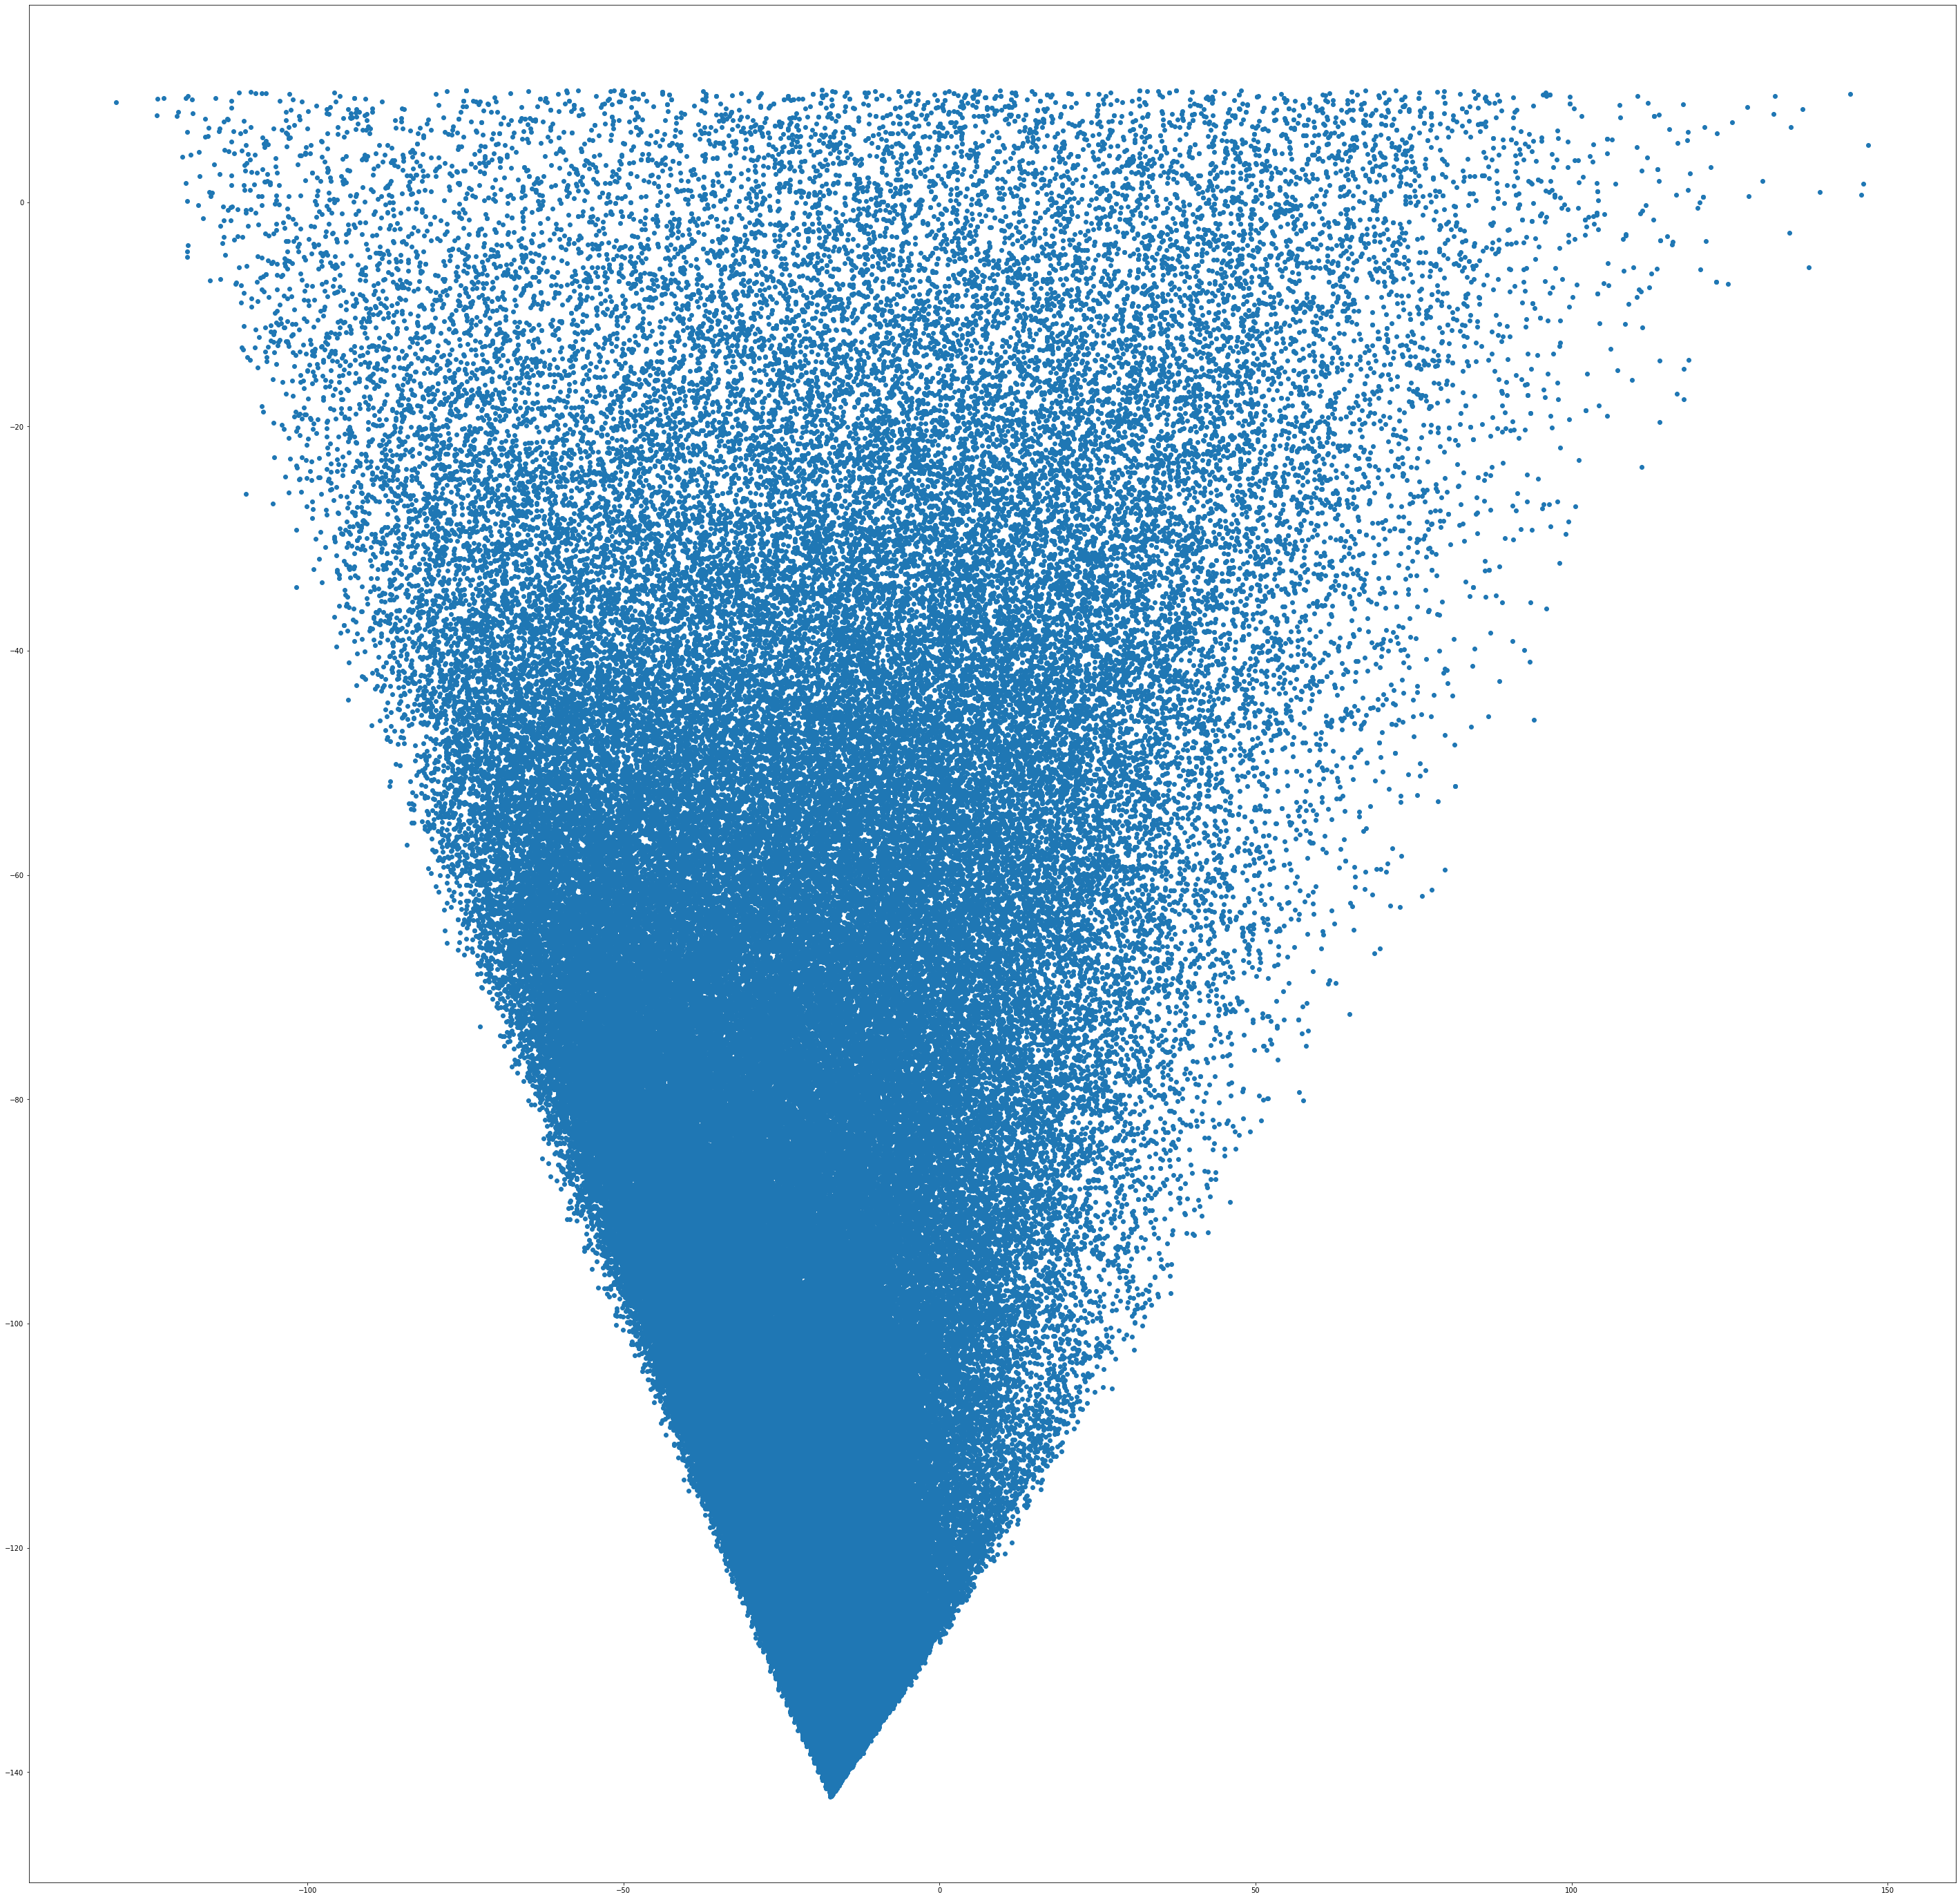

In [46]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 50)
fix, ax = plt.subplots()
pos = np.where(reduced_matrix[:,0] < 10)[0]
ax.scatter(reduced_matrix[pos,1], reduced_matrix[pos,0])
plt.show()

In [55]:
list_feature = []
list_human_study = []
for study in os.listdir('/raidixshare_log-g/bbrowser/api/studies'):
    study_dir = os.path.join('/raidixshare_log-g/bbrowser/api/studies', study)
    ## Check only study of human
    if get_study_species(study_dir) != 'human':
        continue
    h5_data = h5py.File(os.path.join(study_dir, 'main', 'matrix.hdf5'), 'r')
    features = np.array(h5_data['/bioturing/features'])
    list_feature.append(features)
    list_human_study.append(study)

    

In [64]:
a = []

for gene in list_feature[0]:
    if type(gene) == type('str'):
        a.append(gene)
    else:
        a.append(gene.decode())

p = set(a)
for features in range(len(list_feature)):
    #if features < 56:
    #    continue
    #if (not features in [7,8,9, 23,25, 31, 32, 33, 39, 41, 53, 55, 56, 72]):
    #    continue
    #if features in [41, 55]:
    #    continue
    if list_human_study[features] in :
        continue
    a = []
    for gene in list_feature[features]:
        if type(gene) == type('str'):
            a.append(gene)
        else:
            a.append(gene.decode())
    p = p & set(a)
    print(features, len(p))
    if (len(p) == 0):
        print(a)
        break
print(len(p))
print(p)


0 19885
1 14969
2 14414
3 13221
4 12989
5 12634
6 12552
7 10977
8 10351
9 9825
10 9703
11 9692
12 9684
13 9679
14 9672
15 9122
16 9122
17 8899
18 8883
19 8881
20 8863
21 8848
22 8616
23 8593
24 8579
25 8557
26 8529
27 8393
28 8393
29 8393
30 8360
31 8356
32 8337
33 8335
34 7002
35 6950
36 6929
37 6836
38 6836
39 6163
40 6141
41 6096
42 6096
43 4048
44 4048
45 4048
46 4048
47 3984
48 3578
49 3578
50 3573
51 3573
52 3566
53 3546
54 3546
55 3512
56 3512
57 3508
58 3483
59 3481
60 3480
61 3480
62 3480
63 3479
64 3479
65 3479
66 3479
67 3471
68 3451
69 3451
70 2932
71 2931
72 2931
73 2912
74 2912
75 2910
76 2910
77 2910
78 2883
79 2883
80 2882
81 2882
82 2880
83 2880
84 2880
85 2880
86 2880
87 2880
88 2880
89 2880
90 2880
91 2880
92 2880
93 2880
94 2877
95 2877
96 2503
97 2503
98 2493
99 2492
100 2492
102 2483
103 2483
104 2483
105 2480
106 2480
107 2480
108 2480
109 2480
110 2476
111 2475
112 2475
113 2475
114 2475
115 2472
116 2472
117 2406
118 2406
119 2406
120 2406
121 2405
122 2405
123

In [68]:
gene_across_study = list(p)
import json
with open('/raidixshare_log-g/bbrowser/tung/cellSearch/data/gene_across_study_human.json', 'w') as fout:
    json.dump(gene_across_study, fout, indent=4)

In [35]:
print(p)

{b'ENSG00000126767', b'ENSG00000130741', b'ENSG00000124588', b'ENSG00000155868', b'ENSG00000155876', b'ENSG00000186642', b'ENSG00000124570', b'ENSG00000160271', b'ENSG00000102119', b'ENSG00000107789', b'ENSG00000135916', b'ENSG00000138463', b'ENSG00000136720', b'ENSG00000165632', b'ENSG00000185475', b'ENSG00000050405', b'ENSG00000168438', b'ENSG00000137103', b'ENSG00000179144', b'ENSG00000241058', b'ENSG00000157600', b'ENSG00000068354', b'ENSG00000174903', b'ENSG00000183155', b'ENSG00000133256', b'ENSG00000115216', b'ENSG00000205413', b'ENSG00000104341', b'ENSG00000248487', b'ENSG00000163686', b'ENSG00000113273', b'ENSG00000166337', b'ENSG00000138061', b'ENSG00000173193', b'ENSG00000137760', b'ENSG00000158710', b'ENSG00000185946', b'ENSG00000163138', b'ENSG00000178913', b'ENSG00000173531', b'ENSG00000124574', b'ENSG00000160917', b'ENSG00000144566', b'ENSG00000162736', b'ENSG00000102054', b'ENSG00000136933', b'ENSG00000116984', b'ENSG00000163444', b'ENSG00000115970', b'ENSG00000113719',

In [50]:
a = csc_matrix(matrix_all)

['BTC000185', 'BTC000220', 'BTC000012', 'BTC000007', 'BTC000064', 'BTC000008', 'BTC000011', 'BTC000017', 'BTC000222', 'BTC000221', 'BTC000020', 'BTC000277', 'BTC000065', 'BTC000025', 'BTC000114', 'BTC000241', 'BTC000015', 'BTC000021', 'BTC000180', 'BTC000036', 'BTC000024', 'BTC000038', 'BTC000087', 'BTC000049', 'BTC000040', 'BTC000019', 'BTC000133', 'BTC000129', 'BTC000097', 'BTC000123', 'BTC000194', 'BTC000192', 'BTC000016', 'BTC000066', 'BTC000293', 'BTC000002', 'BTC000151', 'BTC000154', 'BTC000152', 'BTC000029', 'BTC000150'] [12, 46, 12, 15, 11, 12, 71, 13, 28, 57, 83, 17, 14, 28, 34, 15, 59, 43, 13, 61, 46, 22, 41, 54, 22, 46, 14, 13, 19, 15, 12, 13, 67, 12, 10, 16, 16, 11, 10, 15, 11]


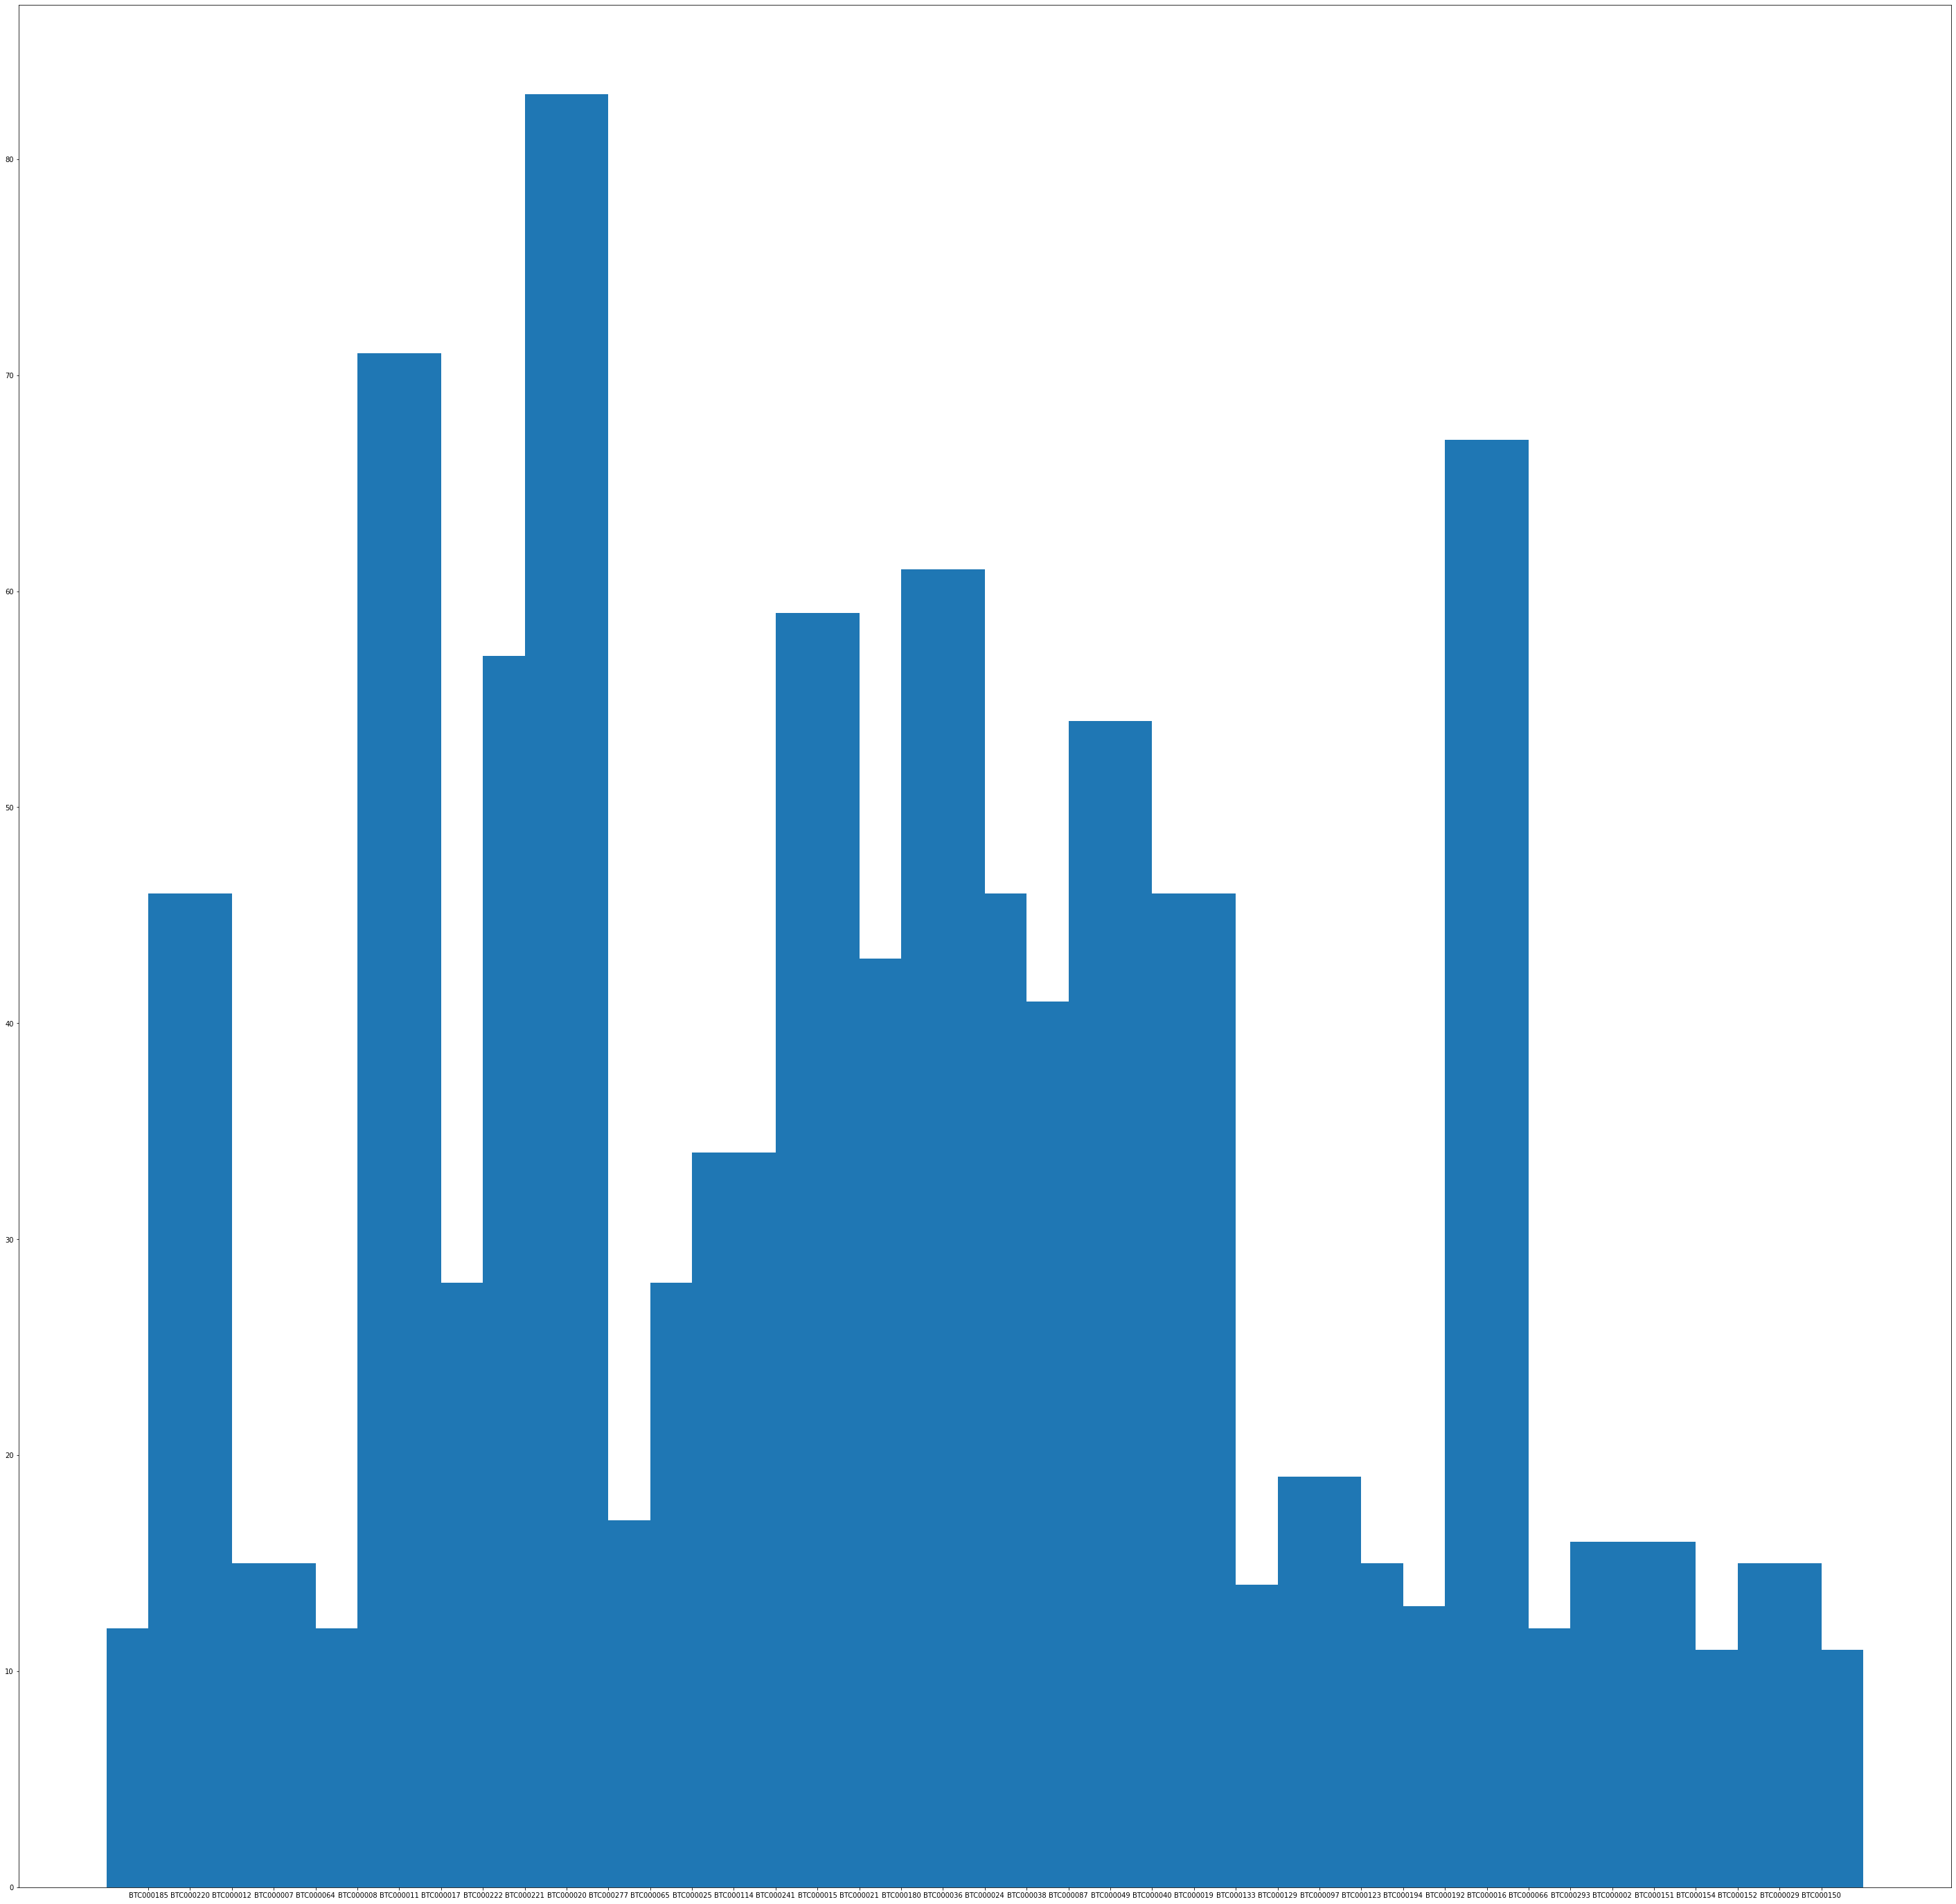

In [79]:
import glob
list_btc = glob.glob('/raidixshare_log-g/bbrowser/tung/Cell_type_data/*')
name_btc = []
number_btc = []
for btc_dir in list_btc:
    if len(os.listdir(btc_dir)) >= 10:
        number_btc.append(len(os.listdir(btc_dir)))
        name_btc.append(btc_dir.split('/')[-1])
import matplotlib.pyplot as plt
fix, ax = plt.subplots()
print(name_btc, number_btc)
ax.bar(name_btc, number_btc, 2)
plt.show()
    

In [77]:
import json
PATH_CELL_ONTOLOGY = '/raidixshare_log-g/bbrowser/tung/cell_ontology/data/cell'
PATH_CELL_TYPE_DATA = '/raidixshare_log-g/bbrowser/tung/Cell_type_data/'
root = 'BTC000000'

def DFS(parent, map_cell_type):
    cell_type, data = set(), set()
    info_dir = os.path.join(PATH_CELL_ONTOLOGY, parent, 'info.json')
    with open(info_dir, 'r') as fin:
        info = json.load(fin)
    if "child" not in info:
        info["child"] = []
    for child in info["child"]:
        child_ct, child_data = DFS(child, map_cell_type)
        cell_type = cell_type | child_ct
        data = data | child_data
    if os.path.exists(os.path.join(PATH_CELL_TYPE_DATA, parent)):
        data = data | set([parent+'_'+x for x in os.listdir(os.path.join(PATH_CELL_TYPE_DATA, parent))])
    cell_type = cell_type | set([parent])
    map_cell_type[parent] = (list(cell_type), list(data))
    return cell_type, data
    
map_cell_type = {}
DFS(root, map_cell_type)
print(json.dumps(map_cell_type, indent=4))

    
        
    
    
    
    


{
    "BTC000062": [
        [
            "BTC000062"
        ],
        [
            "BTC000062_GSE126836_SN.hdf5"
        ]
    ],
    "BTC000104": [
        [
            "BTC000104"
        ],
        [
            "BTC000104_GSE150430.hdf5",
            "BTC000104_GSE72056.hdf5",
            "BTC000104_GSE115978.hdf5",
            "BTC000104_GSE123814_BCC.hdf5",
            "BTC000104_GSE125449.hdf5"
        ]
    ],
    "BTC000219": [
        [
            "BTC000219"
        ],
        [
            "BTC000219_SCP498.hdf5"
        ]
    ],
    "BTC000190": [
        [
            "BTC000190"
        ],
        []
    ],
    "BTC000191": [
        [
            "BTC000191"
        ],
        []
    ],
    "BTC000189": [
        [
            "BTC000191",
            "BTC000189",
            "BTC000190"
        ],
        []
    ],
    "BTC000226": [
        [
            "BTC000226"
        ],
        [
            "BTC000226_Travaglini2020_10X.hdf5",
            "BTC000226_Tra

In [80]:
PATH_CELL_TYPE_DATA = '/raidixshare_log-g/bbrowser/tung/Cell_type_data/'
for btc in os.listdir(PATH_CELL_TYPE_DATA):
    list_study = os.listdir(os.path.join(PATH_CELL_TYPE_DATA, btc))
    os.mkdir(os.path.join(PATH_CELL_TYPE_DATA, btc, 'data'))
    for study in list_study:
        os.rename(os.path.join(PATH_CELL_TYPE_DATA, btc, study), os.path.join(PATH_CELL_TYPE_DATA, btc,'data', study))
        

In [84]:
PATH_CELL_TYPE_DATA = '/raidixshare_log-g/bbrowser/tung/Cell_type_data/'
for btc in os.listdir(PATH_CELL_TYPE_DATA):
    array = os.listdir(os.path.join(PATH_CELL_TYPE_DATA, btc,'data'))
    import random
    random.shuffle(array)
    with open(os.path.join(PATH_CELL_TYPE_DATA, btc,'config.json'), 'w') as  fout:
        position = int(len(array) * 2 / 3)
        if len(array) <= 2:
            position = len(array)
        json.dump({
            "train" : array[0:position],
            "test": array[position:]
        }, fout, indent=4)


In [396]:
PATH_CELL_TYPE_DATA = '/raidixshare_log-g/bbrowser/tung/Cell_type_data/'
import random
import h5py


for btc in os.listdir(PATH_CELL_TYPE_DATA):
    array = os.listdir(os.path.join(PATH_CELL_TYPE_DATA, btc,'data'))
    import random
    random.shuffle(array)
    arr_number_cell = []
    train = []
    test = []
    tmp = []
    for study in array:
        path_study = os.path.join(PATH_CELL_TYPE_DATA, btc, 'data', study)
        h5f = h5py.File(path_study, 'r')
        number_cells = min(np.array(h5f['shape'])[1], 1000)
        if number_cells < 100:
            continue
        arr_number_cell.append(number_cells)
        tmp.append((study, number_cells))
    #tmp.sort(key=lambda x:-x[1])
    random.shuffle(tmp)
    array = np.array(tmp)
    print(array)
    
    total_cells = sum(arr_number_cell)
    number_train_cell = 0
    for index, study in enumerate(array):
        if number_train_cell + int(study[1]) > total_cells * 0.7:
            train = array[0:index,0]
            test = array[index:,0]
            break
        else:
            number_train_cell += int(study[1])
            
    with open(os.path.join(PATH_CELL_TYPE_DATA, btc,'config.json'), 'w') as  fout:
        json.dump({
            "train" : list(train),
            "test": list(test)
        }, fout, indent=4)
    


[['GSE150430.hdf5' '1000']
 ['GSE132164.hdf5' '1000']
 ['kotliarov2020.hdf5' '1000']
 ['GSE99254.hdf5' '531']
 ['GSE128223.hdf5' '1000']
 ['AN1801.hdf5' '1000']
 ['GSE144469_CD3.hdf5' '1000']
 ['GSE131907.hdf5' '1000']
 ['GSE114725.hdf5' '1000']
 ['Travaglini2020_SS2.hdf5' '131']
 ['Travaglini2020_10X.hdf5' '932']
 ['madissoon2020_spleen.hdf5' '1000']]
[['kotliarov2020.hdf5' '1000']
 ['SDY997_landscape.hdf5' '181']
 ['AN1801.hdf5' '1000']
 ['GSE132164.hdf5' '1000']
 ['GSE99254.hdf5' '665']
 ['GSE144469_CD3.hdf5' '1000']
 ['GSE140228_10X.hdf5' '1000']]
[['SDY997_landscape.hdf5' '220']
 ['kotliarov2020.hdf5' '967']
 ['Travaglini2020_10X.hdf5' '1000']
 ['GSE132164.hdf5' '1000']
 ['AN1801.hdf5' '1000']
 ['GSE145281_BT.hdf5' '1000']]
[['GSE150430.hdf5' '1000']
 ['GSE99254.hdf5' '1000']
 ['GSE144469_CD3.hdf5' '1000']
 ['AN1801.hdf5' '1000']
 ['madissoon2020_spleen.hdf5' '1000']
 ['GSE126030.hdf5' '1000']]
[['AN1801.hdf5' '1000']]
[['Sharma_14HCC.hdf5' '1000']
 ['GSE132465.hdf5' '1000']
 ['GS

[['Travaglini2020_10X.hdf5' '1000']
 ['deprez2019.hdf5' '1000']
 ['GSE134174_invitro.hdf5' '621']
 ['Travaglini2020_SS2.hdf5' '551']
 ['GSE134174_invivo.hdf5' '1000']
 ['GSE128169.hdf5' '1000']
 ['GSE130148.hdf5' '433']
 ['GSE128033.hdf5' '1000']
 ['GSE121611.hdf5' '1000']
 ['GSE131907.hdf5' '654']
 ['madissoon2020_lung.hdf5' '466']
 ['GSE136831.hdf5' '1000']
 ['chua2020.hdf5' '1000']
 ['GSE135893.hdf5' '1000']]
[['GSE135922_all.hdf5' '132']
 ['Travaglini2020_10X.hdf5' '335']
 ['GSE124310.hdf5' '175']
 ['stewart2019_mature.hdf5' '733']
 ['chua2020.hdf5' '1000']
 ['madissoon2020_esophagus.hdf5' '201']
 ['GSE131685.hdf5' '561']
 ['GSE123904_human.hdf5' '1000']
 ['smillie2019.imm.hdf5' '520']
 ['young2018.hdf5' '1000']
 ['kotliarov2020.hdf5' '343']
 ['GSE124395.hdf5' '1000']]
[['chua2020.hdf5' '1000']
 ['SCP498.hdf5' '1000']]
[['deprez2019.hdf5' '1000']
 ['smillie2019.epi.hdf5' '1000']
 ['chua2020.hdf5' '1000']]
[['GSE131907.hdf5' '1000']
 ['madissoon2020_esophagus.hdf5' '334']
 ['chua202

[['GSE109822.hdf5' '184']
 ['E-MTAB-7407.hdf5' '1000']
 ['E-MTAB-6149_all.hdf5' '1000']
 ['tabib2018.hdf5' '1000']
 ['GSE121380.hdf5' '204']
 ['GSE121611.hdf5' '613']
 ['GSE147424.hdf5' '1000']
 ['peng2019.hdf5' '1000']
 ['GSE130973.hdf5' '1000']
 ['GSE140819_Melanoma.hdf5' '679']
 ['GSE146771_smartseq.hdf5' '138']
 ['SDY997.hdf5' '138']
 ['stewart2019_fetal.hdf5' '1000']
 ['GSE140819_NSCLC.hdf5' '1000']
 ['GSE134809.hdf5' '536']
 ['smillie2019.fibroblast.hdf5' '1000']
 ['GSE131907.hdf5' '1000']
 ['SDY998.hdf5' '1000']
 ['GSE146026_SS2.hdf5' '105']
 ['madissoon2020_lung.hdf5' '1000']
 ['GSE135893.hdf5' '1000']
 ['GSE123904_human.hdf5' '263']
 ['GSE140819_Ovarian.hdf5' '1000']
 ['GSE128169_cite.hdf5' '470']
 ['deprez2019.hdf5' '376']
 ['GSE146026_10X.hdf5' '1000']
 ['GSE130148.hdf5' '204']
 ['GSE134355_fetal.hdf5' '1000']
 ['GSE134355_adult.hdf5' '1000']
 ['Sharma_14HCC.hdf5' '1000']
 ['GSE103322.hdf5' '1000']
 ['GSE128033.hdf5' '1000']
 ['GSE131778.hdf5' '1000']
 ['GSE127465_human.hdf5

[['GSE116222.hdf5' '321']
 ['smillie2019.imm.hdf5' '211']
 ['GSE146771_smartseq.hdf5' '953']
 ['GSE146771_10x.hdf5' '1000']
 ['GSE140228_10X.hdf5' '186']
 ['GSE136831.hdf5' '1000']
 ['E-MTAB-7407.hdf5' '1000']
 ['GSE136103_human.hdf5' '1000']
 ['madissoon2020_spleen.hdf5' '566']
 ['GSE144469_CD45.hdf5' '372']
 ['james2020.hdf5' '830']
 ['stewart2019_fetal.hdf5' '177']]
[['roider2019.hdf5' '1000']
 ['GSE125449.hdf5' '1000']
 ['GSE146026_10X.hdf5' '758']
 ['GSE131907.hdf5' '1000']
 ['GSE146026_SS2.hdf5' '1000']
 ['GSE103322.hdf5' '1000']
 ['GSE115795.hdf5' '1000']
 ['GSE127465_human.hdf5' '1000']
 ['GSE150430.hdf5' '1000']
 ['GSE109761_hu.hdf5' '262']]
[['GSE134355_fetal.hdf5' '1000']
 ['madissoon2020_lung.hdf5' '839']
 ['SCP1038_human_colon.hdf5' '1000']]
[['GSE140819_glioma.hdf5' '1000']
 ['GSE104276.hdf5' '290']
 ['zhong2018.hdf5' '290']]
[['GSE104276.hdf5' '1000']
 ['GSE131778.hdf5' '211']
 ['GSE67835.hdf5' '131']
 ['SCP1038_human_colon.hdf5' '1000']
 ['GSE138852.hdf5' '809']
 ['GSE1

[['stewart2019_fetal.hdf5' '121']
 ['stewart2019_mature.hdf5' '811']
 ['GSE131882.hdf5' '1000']
 ['SDY997.hdf5' '1000']
 ['young2018.hdf5' '1000']]
[['GSE131882.hdf5' '1000']]
[['GSE131882.hdf5' '596']]
[['GSE136831.hdf5' '567']
 ['SCP1038_human_colon.hdf5' '840']
 ['GSE135893.hdf5' '233']
 ['GSE134355_adult.hdf5' '1000']]
[]
[['GSE132164.hdf5' '1000']
 ['kotliarov2020.hdf5' '1000']]
[['GSE148837_cite.hdf5' '1000']
 ['GSE132164.hdf5' '1000']
 ['GSE144469_CD3.hdf5' '1000']
 ['GSE99254.hdf5' '1000']
 ['GSE148837.hdf5' '1000']]
[['GSE132164.hdf5' '1000']
 ['GSE99254.hdf5' '433']]
[['GSE133549_human_reference.hdf5' '1000']
 ['GSE133549_human_hamony.hdf5' '1000']]
[['GSE134144.hdf5' '1000']]
[['GSE134144.hdf5' '295']]
[['GSE134144.hdf5' '396']]
[['GSE134144.hdf5' '1000']]
[['GSE134144.hdf5' '906']]
[['GSE134174_invivo.hdf5' '633']
 ['GSE135893.hdf5' '1000']
 ['tabib2018.hdf5' '178']
 ['GSE147424.hdf5' '583']
 ['GSE134174_invitro.hdf5' '1000']]
[['GSE134809.hdf5' '1000']
 ['james2020.hdf5' '

In [487]:
import glob

import random
import pickle

import sys
sys.path.append('../python')
from env import *
from scipy import sparse
import os
import numpy as np
from scipy.spatial import distance
from anndata import AnnData
import scanpy as sc
from CS_utils import *
from CS_data_processing import *
from collections import Counter


def transform_features_to_go(list_features, map_index2goindex):
    a = np.array([go_index for gene_index in list_features for go_index in map_index2goindex[gene_index]])
    ##print('Number of count go is', len(a))
    return Counter(a)

def feature2vec(list_features, indexgo2size, map_index2goindex):
    go_value = transform_features_to_go(list_features, map_index2goindex)
    vec = np.zeros(18764)
    keys = np.array([i for i in go_value])
    values = np.array([go_value[go] / indexgo2size[str(go)] for go in keys])
    vec[keys] = values
    return vec

def get_features_only(study_dir, feature_dir):
    path_save = os.path.join(feature_dir, study_dir.split('/')[-1] + '.pkl')
    if os.path.exists(path_save):
        return
    h5_data = h5py.File(os.path.join(study_dir, 'main', 'matrix.hdf5'), 'r')
    features = np.array(h5_data['/features'])
    indices = np.array(h5_data['/indices'])
    indptr = h5_data['/indptr']
    shape = h5_data['/shape']
    data = h5_data['/data']
    
    with open(PATH_GO2SIZE, 'r') as fi:
        go2size = json.load(fi)
    with open(PATH_INDEXGO2SIZE, 'r') as fi:
        indexgo2size = json.load(fi)
    with open(PATH_GSE2INDEXGO, 'r') as fi:
        gse2indexgo = json.load(fi)
        
    num_go = 0
    ##print(shape[1])
    feature_matrix = []
    for i in range(shape[1]):
        ##print(i)
        list_features = indices[indptr[i]:indptr[i + 1]]
        feature_matrix.append(list_features)
    cell_based_cluster_label, cell_based_clusters = load_study_cell_type_cluster(study_dir)
    
    features = {"feature_matrix": feature_matrix,
                "cell_based_cluster_label": cell_based_cluster_label,
                "cell_based_clusters": cell_based_clusters,
                "features": features}
    ##print('Store features')
    pickle.dump(features, open(path_save, 'wb'))

def sample2trainable_data(sample, map_index2goindex):
    X_val = np.zeros((len(sample), 18764))
    Y_val = []
    with open(PATH_INDEXGO2SIZE, 'r') as fi:
        indexgo2size = json.load(fi)
    for index, v in enumerate(sample):
        go_value = feature2vec(v[0], indexgo2size, map_index2goindex)
        X_val[index, :] = go_value
        Y_val.append(v[1])
    return X_val, Y_val

def create_sample(features_dir, number_per_class, static, min_study_class):
#     features = {"features": feature_matrix,
#                 "cell_based_cluster_label": cell_based_cluster_label,
#                 "cell_based_clusters": cell_based_clusters
#                 "features": features}
    with open(features_dir, 'rb') as fin:
        features = pickle.load(fin)
    feature_matrix = features['feature_matrix']
    cell_based_cluster_label = features['cell_based_cluster_label']
    cell_based_clusters = features['cell_based_clusters']
    features_study = features['features']
    cell_based_cluster_label = list(map(lambda x: x.split('_')[-1].split('[')[-1].split(']')[0],
                                   cell_based_cluster_label))
    groups = [np.where(np.array(cell_based_clusters).transpose() == i)[0] 
              for i in range(len(cell_based_cluster_label))]
    sample = []
    for i, arr in enumerate(groups):
        if (i == 0 and cell_based_cluster_label[i] != 'Unassigned'):
            print('Please check metadata of', features_dir)
        if cell_based_cluster_label[i] == 'Unassigned':
            continue
        if (cell_based_cluster_label[i] not in static) or static[cell_based_cluster_label[i]] < min_study_class:
            #print(static[cell_based_cluster_label[i]])
            continue
        for num in range(int(number_per_class / static[cell_based_cluster_label[i]])):
            random_arr = random.choices(arr, k=100)
            features = set()
            for index in random_arr:
                features = features | set(feature_matrix[index])
            sample.append((np.array(list(features)), cell_based_cluster_label[i]))
            #print(i, num)
    
    map_index2goindex = []
    with open(PATH_GSE2INDEXGO, 'r') as fi:
        gse2indexgo = json.load(fi)
        
    for index, value in enumerate(features_study):
        if type(value) != type('str'):
            value = value.decode()
        #else:    
        #    print(value)
            
        if value in gse2indexgo:
            map_index2goindex.append(gse2indexgo[value])
        else:
            map_index2goindex.append([])            
    return sample2trainable_data(sample, map_index2goindex)


def store_matrix_gene_ontology(X, Y, path):
    ##print(path)
    with open(path, 'wb') as fout:
        pickle.dump({"X": X, "Y": Y}, fout)
        
def get_matrix_gene_ontology(path):
    with open(path, 'rb') as fin:
        data = pickle.load(fin)
    return data["X"], data["Y"]
def static_class(list_study):
    static = []
    for study in list_study:
        with open(study, 'rb') as fin:
            features = pickle.load(fin)
        
        cell_based_cluster_label = features['cell_based_cluster_label']
        cell_based_cluster_label = list(map(lambda x: x.split('_')[-1].split('[')[-1].split(']')[0],
                                        cell_based_cluster_label))
        print(study, cell_based_cluster_label)
        static.extend(cell_based_cluster_label)
    return Counter(static)


def create_full_sample(list_study, static, sample_per_class, min_study_have_class):
    first_get_data = True
    X = None
    Y = []
    for study in list_study:
        file_name = study.split('/')[-1]
        path_go_matrix = '/mnt/hdd2/tung/cellSearch/GO_matrix/' + file_name
        X_val, Y_val = 0, 0
        if os.path.exists(path_go_matrix):
            X_val, Y_val = get_matrix_gene_ontology(path_go_matrix)
        else:
            X_val, Y_val = create_sample(study, sample_per_class, static, min_study_have_class)
            store_matrix_gene_ontology(X_val, Y_val, path_go_matrix)
        if first_get_data:
            first_get_data = False
            X = X_val
        else:
            X = np.concatenate((X, X_val), axis=0)
        Y.extend(Y_val)
    return X ,Y

In [488]:
import glob
### DELETE ALL INDEX DATA 
import shutil

for path_btc in glob.glob('/raidixshare_log-g/bbrowser/tung/Cell_type_data/*'):
    list_study = os.listdir(os.path.join(path_btc, 'data'))
    for study in list_study:
        
        ## Some outlier study
        if study in ['GSE140228_smartseq2', 'GSE63269']:
            continue
        study_name = '.'.join(study.split('.')[0:-1])
        if os.path.exists(os.path.join(path_btc, 'data_index')):
            shutil.rmtree(os.path.join(path_btc, 'data_index'))


In [489]:
NUMBER_PER_DATA = 1000

with open('/raidixshare_log-g/bbrowser/tung/cellSearch/data/gene_across_study_human.json', 'r') as fin:
    features_in_across_study = json.load(fin)
print(features_in_across_study)
features_in_across_study_np = np.array(features_in_across_study)
#features_in_across_study = np.array(features_in_across_study)
with open(PATH_GO2SIZE, 'r') as fi:
    go2size = json.load(fi)
with open(PATH_INDEXGO2SIZE, 'r') as fi:
    indexgo2size = json.load(fi)
with open(PATH_GSE2INDEXGO, 'r') as fi:
    gse2indexgo = json.load(fi)
map_index2goindex = []
with open(PATH_GSE2INDEXGO, 'r') as fi:
    gse2indexgo = json.load(fi)
for index, value in enumerate(features_in_across_study):
    if type(value) != type('str'):
        value = value.decode()
    else:
        print(value)
    if value in gse2indexgo:
        map_index2goindex.append(gse2indexgo[value])
    else:
        map_index2goindex.append([])            

def index_data(list_dir_index):
    for path_btc in list_dir_index:
        list_study = os.listdir(os.path.join(path_btc, 'data'))
        for study in list_study:

            ## Some outlier study
            if study in ['GSE140228_smartseq2', 'GSE63269']:
                continue

            study_name = '.'.join(study.split('.')[0:-1])
            if not os.path.exists(os.path.join(path_btc, 'data_index')):
                os.mkdir(os.path.join(path_btc, 'data_index'))
            if os.path.exists(os.path.join(path_btc, 'data_index', study_name + '.pkl')):
                if 'BTC000049' in path_btc and 'smillie2019.fibroblast.hdf5' == study:
                    print(study)
                continue

            h5_data = h5py.File(os.path.join(path_btc,'data', study), 'r')
            feature_study = np.array(h5_data['/features'])
            indices = np.array(h5_data['/indices'])
            indptr = h5_data['/indptr']
            shape = h5_data['/shape']
            data = h5_data['/data']
            matrix = csc_matrix((data, indices, indptr), shape=shape)
            ## Forcus on gene have in all study
            
            
            feature_study = np.array([ x if type(x) == type('str') else x.decode() for x in feature_study])
            for index, feature in enumerate(feature_study):
                if feature_study[index] not in gse2indexgo:
                    gse2indexgo[feature_study[index]] = []
                #if len(gse2indexgo[feature_study[index]]) > 15:
                #    gse2indexgo[feature_study[index]] = []

            '''
            features_in_across = np.zeros(len(features_in_across_study))
            for index, gene in enumerate(features):
                if type(gene) != type('str'):
                    gene = gene.decode()
                if gene in features_in_across_study:
                    features_in_across[features_in_across_study.index(gene)] = index
            '''
            #matrix = matrix[np.array(features_in_across), :]
            #indices = matrix.indices
            #indptr = matrix.indptr
            sample = []

            for num in range(min(NUMBER_PER_DATA, len(indptr) - 1)):
                random_arr = random.choices(range(len(indptr) - 1), k=10)
                features = set()
                for index in random_arr:
                    features = features | set(indices[indptr[index]:indptr[index+1]])
                #print(num)
                sample.append(list(features))
            X_val = np.zeros((len(sample), 18764))
            Y_val = []
            for index, v in enumerate(sample):
                #go_value = feature2vec(v, indexgo2size, map_index2goindex)
                go_value = feature2vec(feature_study[v], indexgo2size, gse2indexgo)
                X_val[index, :] = go_value
                #tmp = np.zeros(len(features_in_across_study))
                #tmp[v] = 1
                #X_val[index,18764:] = tmp
                Y_val.append(-1)
            store_matrix_gene_ontology(X_val, Y_val, os.path.join(path_btc, 'data_index', study_name + '.pkl'))


['ENSG00000155876', 'ENSG00000124588', 'ENSG00000160271', 'ENSG00000124570', 'ENSG00000107789', 'ENSG00000135916', 'ENSG00000050405', 'ENSG00000168438', 'ENSG00000137103', 'ENSG00000183155', 'ENSG00000115216', 'ENSG00000163686', 'ENSG00000185946', 'ENSG00000173193', 'ENSG00000178913', 'ENSG00000136933', 'ENSG00000144566', 'ENSG00000162736', 'ENSG00000116984', 'ENSG00000115970', 'ENSG00000113719', 'ENSG00000180104', 'ENSG00000135655', 'ENSG00000198589', 'ENSG00000143742', 'ENSG00000157978', 'ENSG00000143376', 'ENSG00000116138', 'ENSG00000138279', 'ENSG00000081087', 'ENSG00000138641', 'ENSG00000096384', 'ENSG00000136810', 'ENSG00000106355', 'ENSG00000143797', 'ENSG00000173226', 'ENSG00000136888', 'ENSG00000198492', 'ENSG00000107949', 'ENSG00000138101', 'ENSG00000186591', 'ENSG00000254999', 'ENSG00000180573', 'ENSG00000225921', 'ENSG00000177383', 'ENSG00000170266', 'ENSG00000086061', 'ENSG00000085511', 'ENSG00000173611', 'ENSG00000117614', 'ENSG00000113387', 'ENSG00000112249', 'ENSG000001

ENSG00000155876
ENSG00000124588
ENSG00000160271
ENSG00000124570
ENSG00000107789
ENSG00000135916
ENSG00000050405
ENSG00000168438
ENSG00000137103
ENSG00000183155
ENSG00000115216
ENSG00000163686
ENSG00000185946
ENSG00000173193
ENSG00000178913
ENSG00000136933
ENSG00000144566
ENSG00000162736
ENSG00000116984
ENSG00000115970
ENSG00000113719
ENSG00000180104
ENSG00000135655
ENSG00000198589
ENSG00000143742
ENSG00000157978
ENSG00000143376
ENSG00000116138
ENSG00000138279
ENSG00000081087
ENSG00000138641
ENSG00000096384
ENSG00000136810
ENSG00000106355
ENSG00000143797
ENSG00000173226
ENSG00000136888
ENSG00000198492
ENSG00000107949
ENSG00000138101
ENSG00000186591
ENSG00000254999
ENSG00000180573
ENSG00000225921
ENSG00000177383
ENSG00000170266
ENSG00000086061
ENSG00000085511
ENSG00000173611
ENSG00000117614
ENSG00000113387
ENSG00000112249
ENSG00000167797
ENSG00000119899
ENSG00000144635
ENSG00000119402
ENSG00000131558
ENSG00000149577
ENSG00000163166
ENSG00000044459
ENSG00000149089
ENSG00000196504
ENSG0000

ENSG00000119335
ENSG00000152061
ENSG00000159692
ENSG00000165209
ENSG00000152404
ENSG00000062194
ENSG00000168894
ENSG00000127334
ENSG00000112406
ENSG00000117868
ENSG00000109381
ENSG00000167904
ENSG00000090989
ENSG00000137275
ENSG00000138190
ENSG00000109445
ENSG00000142186
ENSG00000106415
ENSG00000144136
ENSG00000204130
ENSG00000170088
ENSG00000176978
ENSG00000169919
ENSG00000119760
ENSG00000272047
ENSG00000143106
ENSG00000198700
ENSG00000162613
ENSG00000164880
ENSG00000085832
ENSG00000163875
ENSG00000170584
ENSG00000173163
ENSG00000122565
ENSG00000143486
ENSG00000090273
ENSG00000171604
ENSG00000135677
ENSG00000004478
ENSG00000123349
ENSG00000131504
ENSG00000165280
ENSG00000105939
ENSG00000197081
ENSG00000132906
ENSG00000089159
ENSG00000114353
ENSG00000025800
ENSG00000197580
ENSG00000122694
ENSG00000021355
ENSG00000188994
ENSG00000115464
ENSG00000112079
ENSG00000168374
ENSG00000170145
ENSG00000182552
ENSG00000106628
ENSG00000076641
ENSG00000196220
ENSG00000115211
ENSG00000077380
ENSG0000

In [ ]:


processes = []
for i in range(len(list_btc)):
    p = multiprocessing.Process(target=index_data, args=(list_btc[i],))
    processes.append(p)
    p.start()

for process in processes:
    process.join()
        
    


In [490]:
import time
import multiprocessing

list_btc = []
arr = []
for index, btc_dir in enumerate(glob.glob('/raidixshare_log-g/bbrowser/tung/Cell_type_data/*')):
    arr.append(btc_dir)
    if index % 8 == 0:
        list_btc.append(arr)
        arr = []
if len(arr) != 0:
    list_btc.append(arr)

In [493]:
index_data(list_btc[2])

KeyboardInterrupt: 

Selected  15750 feaures
Counter({'/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000074/data_index/GSE123139.pkl': 1333, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000074/data_index/GSE116256.pkl': 1333, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000074/data_index/GSE124310.pkl': 1333, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/chua2020.pkl': 444, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/GSE123904_human.pkl': 444, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/madissoon2020_esophagus.pkl': 444, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/GSE131685.pkl': 444, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/stewart2019_mature.pkl': 444, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/GSE135922_all.pkl': 444, '/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000065/data_index/GSE124310.pkl': 444, '/raidixshare_log-g/bb

###########################################
BTC000229
Score : 0.9276233408464813
Test : 0.5545768480056054
220 0.20981507823613088 3179 6803 Counter({1: 1713, 0: 496, 3: 427, 2: 348, 4: 195}) Counter({4: 1771, 2: 1601, 3: 1540, 0: 1538, 1: 353})
8538 0.25 1654 1525 Counter({1: 1235, 2: 208, 4: 186, 0: 19, 3: 6}) Counter({1: 478, 0: 477, 3: 421, 2: 140, 4: 9})
8000 0.5 101 1553 Counter({4: 40, 1: 31, 2: 18, 0: 12}) Counter({1: 1204, 2: 190, 4: 146, 0: 7, 3: 6})
823 0.15000000000000002 46 55 Counter({1: 29, 0: 11, 2: 4, 4: 2}) Counter({4: 38, 2: 14, 1: 2, 0: 1})
14232 0.16666666666666666 81 1472 Counter({2: 46, 1: 32, 4: 3}) Counter({1: 1172, 2: 144, 4: 143, 0: 7, 3: 6})
9471 0.125 84 1388 Counter({4: 58, 1: 26}) Counter({1: 1146, 2: 144, 4: 85, 0: 7, 3: 6})
2633 0.011904761904761904 63 1325 Counter({1: 31, 4: 16, 2: 8, 0: 4, 3: 4}) Counter({1: 1115, 2: 136, 4: 69, 0: 3, 3: 2})
5410 0.045454545454545456 41 1284 Counter({1: 41}) Counter({1: 1074, 2: 136, 4: 69, 0: 3, 3: 2})
4417 0.1071428

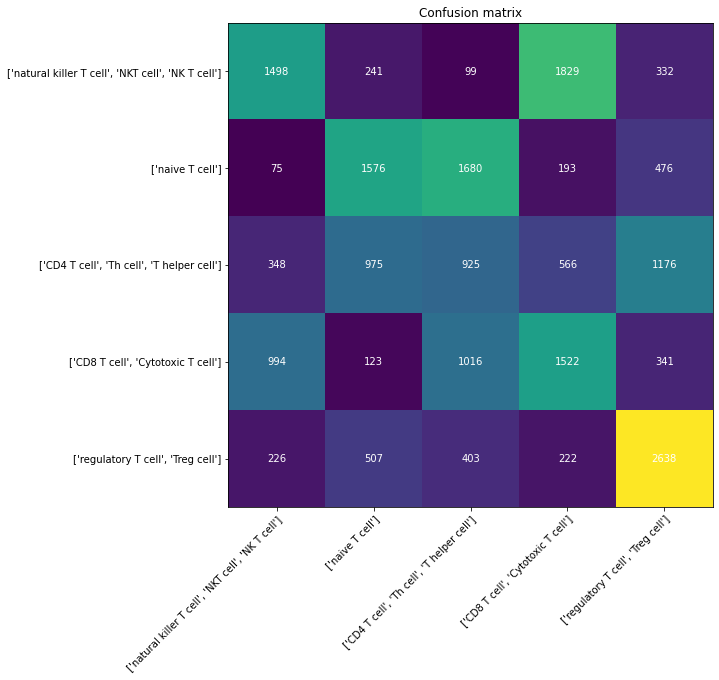

In [519]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import json
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
PATH_CELL_ONTOLOGY = '/raidixshare_log-g/bbrowser/tung/cell_ontology/data/cell'
PATH_CELL_TYPE_DATA = '/raidixshare_log-g/bbrowser/tung/Cell_type_data/'
root = 'BTC000000'


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



map_btc2name = {}
for cell_type in os.listdir(PATH_CELL_ONTOLOGY):
    if '.' in cell_type:
        continue
    with open(os.path.join(PATH_CELL_ONTOLOGY, cell_type, 'info.json'), 'r') as fin:
        data = json.load(fin)
    map_btc2name[cell_type] = data["name"]

def get_name_btc(list_btc):
    return [map_btc2name[i] for i in list_btc]
    


class NodeRandomForest:
    _number_train = 20000
    _number_test =  20000
    
    def __init__(self):
        return

    def train(self, node_id, node_data, child_data, list_dir_node):
        if 'BTC000229' != node_id:
            return
        
        all_data = {}
        for child in child_data:
            if len(child_data[child]["train"]) + len(child_data[child]["test"]) <= 3:
                continue
            all_data[child] = child_data[child]
        
        if len(node_data["train"]) != 0:
            all_data[node_id] = node_data
        
        list_dir_node[node_id] = all_data
        
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        study_id_train = []
        study_id_test = []
        
        size_matrix = []
        if not len(all_data) >= 2:
            return

        for node in all_data:
            number_study = len(all_data[node]["train"])
            sample_one_study = int(self._number_train / (number_study * len(all_data)))
            for study_dir in all_data[node]["train"]:
                with open(study_dir, 'rb') as fin:
                    #print(study_dir)
                    data = pickle.load(fin)
                    #print([name for name in data])
                    matrix = data['X']
                    sampling = random.choices(range(len(matrix)), k=sample_one_study)
                    X_train.append(matrix[np.array(sampling), :])
                    Y_train.extend([node] * len(sampling))
                    study_id_train.extend([study_dir] * len(sampling))
                    #study_id_train.extend([study_dir.split('/')[-1]] * len(sampling))

            number_study = len(all_data[node]["test"])
            sample_one_study = int(self._number_test / (number_study * len(all_data)))
            for study_dir in all_data[node]["test"]:
                with open(study_dir, 'rb') as fin:
                    data = pickle.load(fin)
                    #print([name for name in data])
                    matrix = data['X']
                    size_matrix.append((len(matrix), node))
                    sampling = random.choices(range(len(matrix)), k=sample_one_study)
                    X_test.append(matrix[np.array(sampling), :])
                    Y_test.extend([node] * len(sampling))
                    study_id_test.extend([study_dir] * len(sampling))
        
        X_train = np.concatenate((X_train), axis=0)
        #X_train = X_train[:, selected_col]
        
        col_sum = sum(X_train != 0) / X_train.shape[0]
        pos = np.where(col_sum > 3.0 / (len(all_data) * 10) )[0]
        print("Selected ", len(pos), 'feaures')
        X_train = X_train[:,pos]
        
        
        X_test = np.concatenate((X_test), axis=0)
        #X_test = X_test[:,selected_col]
        #X_test = X_test[:, selected_col]
        X_test = X_test[:,pos]
        print(Counter(study_id_train))
        

        le = preprocessing.LabelEncoder()                                                                                                                                         
        le.fit(Y_train)
        Y_train = le.transform(Y_train)
        Y_test = le.transform(Y_test)
        
        le_study = preprocessing.LabelEncoder()
        le_study.fit(study_id_train)
        study_id_train = le_study.transform(study_id_train)
        
        
        '''
        clf = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(X_train.shape[1])),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10)
        ])
        clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        
        clf.fit(X_train, Y_train, epochs=10)
        
        probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
        predictions = probability_model.predict(test_images)
        np.argmax(predictions)
        '''
        
        clf = RandomForestClassifier(n_estimators= 90, max_depth=40,
                                    max_leaf_nodes= max(Y_train + 1) * 20,
                                    random_state=0, n_jobs = 30)
        clf = clf.fit(X_train, Y_train)
        
        train_score = clf.score(X_train, Y_train)
        test_score = clf.score(X_test, Y_test)
        print("###########################################")
        print(node_id)
        print("Score :", train_score)
        print("Test :", test_score)
        
        
        clf = RandomForest(1, max_depth=10)
        clf.fit(X_train, Y_train, study_id_train)
        
        train_score = clf.score(X_train, Y_train)
        test_score = clf.score(X_test, Y_test)
        print("###########################################")
        print(node_id)
        print("Score :", train_score)
        print("Test :", test_score)
        print(size_matrix)
        confusion = confusion_matrix(Y_test, clf.predict(X_test))
        
        
        with open(os.path.join(PATH_CELL_TYPE_DATA, node_id, 'result.pkl'), 'wb') as fout:
            pickle.dump({
              "train_score": train_score,
              "test_score": test_score,
              "confusion_matrix": confusion,
              "label": le.classes_
            }, fout)
        self.plot_confusion(node_id)
        with open(os.path.join(PATH_CELL_TYPE_DATA, node_id, 'model.pkl'), 'wb') as fout:
            pickle.dump({
                "model": clf,
                "le": le
            }, fout)
            
    def remove_result(self, node_id):
        if not os.path.exists(os.path.join(PATH_CELL_TYPE_DATA, node_id, 'result.pkl')):
            return
        os.remove(os.path.join(PATH_CELL_TYPE_DATA, node_id, 'result.pkl'))
        
        
    def plot_confusion(self, node_id):
        
        if not os.path.exists(os.path.join(PATH_CELL_TYPE_DATA, node_id, 'result.pkl')):
            return
        with open(os.path.join(PATH_CELL_TYPE_DATA, node_id, 'result.pkl'), 'rb') as fin:
            data = pickle.load(fin)
            
        print(node_id)
        print("Train score ", data["train_score"])
        print("Test score", data["test_score"])

        plt.rcParams["figure.figsize"] = (10, 10)
        fig, ax = plt.subplots()

        cax = ax.imshow(data["confusion_matrix"], interpolation='nearest')
        #fig.colorbar(cax)
        ax.set_xticks(np.arange(len(data["label"])))
        ax.set_yticks(np.arange(len(data["label"])))

        ax.set_xticklabels(get_name_btc(data["label"]))
        ax.set_yticklabels(get_name_btc(data["label"]))
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        for i in range(len(data["label"])):
            for j in range(len(data["label"])):
                text = ax.text(j, i, data["confusion_matrix"][i, j],
                              ha="center", va="center", color="w")
                
        ax.set_title("Confusion matrix")
        fig.tight_layout()

        plt.show()


class GraphRandomForest:
    def __init__(self):
        return

    def check_is_trained(self, node):
        if os.path.exists(os.path.join(PATH_CELL_TYPE_DATA, node, 'result.pkl')):
            return True
        return False

    def train_one_node(self, node, list_child_data, list_dir_node):
        if not os.path.exists(os.path.join(PATH_CELL_TYPE_DATA, node)):
            return
        with open(os.path.join(PATH_CELL_TYPE_DATA, node, 'config.json'), 'r') as fin:
            data = json.load(fin)
        parent_train = [os.path.join(PATH_CELL_TYPE_DATA, node, 'data_index',x.replace('.hdf5', '.pkl')) for x in data['train']]
        parent_test = [os.path.join(PATH_CELL_TYPE_DATA, node, 'data_index',x.replace('.hdf5', '.pkl')) for x in data['test']]
        node_random_forest = NodeRandomForest()
        node_random_forest.train(node, 
                                {"train": parent_train, "test": parent_test},
                                list_child_data,
                                list_dir_node)
            

    def train_DFS(self, parent, list_dir_node):
        data_train, data_test = set(), set()
        info_dir = os.path.join(PATH_CELL_ONTOLOGY, parent, 'info.json')
        with open(info_dir, 'r') as fin:
            info_graph = json.load(fin)    
        if "child" not in info_graph:
            info_graph["child"] = []
        
        list_child_trainable = {}
        for child in info_graph["child"]:
            child_train, child_test = self.train_DFS(child, list_dir_node)
            
            ## REMOVE THIS TO RUN DATA FROM CHILD
            
            #data_train = data_train | child_train
            #data_test = data_test | child_test

            if len(child_train) >= 2 and len(child_test) >= 1:
                list_child_trainable[child] = {"train" : list(child_train), "test": list(child_test)}
        
        if len(list_child_trainable) != 0:
            if not self.check_is_trained(parent):
                self.train_one_node(parent, list_child_trainable, list_dir_node)
        
                
        if os.path.exists(os.path.join(PATH_CELL_TYPE_DATA, parent)):
            with open(os.path.join(PATH_CELL_TYPE_DATA, parent, 'config.json'), 'r') as fin:
                data = json.load(fin)
            parent_train = [os.path.join(PATH_CELL_TYPE_DATA, parent, 'data_index',x.replace('.hdf5', '.pkl')) for x in data['train']]
            parent_test = [os.path.join(PATH_CELL_TYPE_DATA, parent, 'data_index',x.replace('.hdf5', '.pkl')) for x in data['test']]
            data_train  = data_train | set(parent_train)
            data_test = data_test | set(parent_test)

        return data_train, data_test
        

graph = GraphRandomForest()
list_dir_node = {}
ans = graph.train_DFS(root, list_dir_node)

In [516]:
list_dir_node

{}

BTC000229
Train score  0.651740545955422
Test score 0.3807617236374556


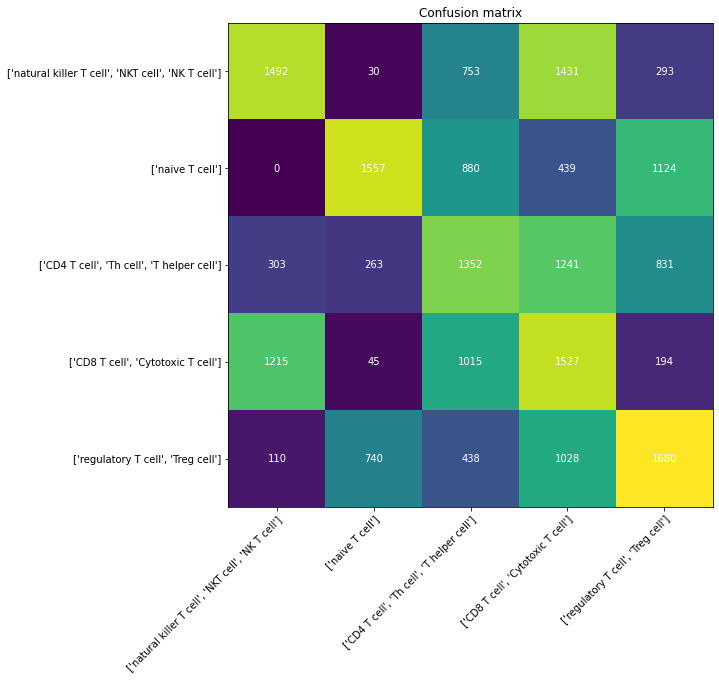

In [518]:
node = NodeRandomForest()
for btc in os.listdir(PATH_CELL_TYPE_DATA):
    node.plot_confusion(btc)
    node.remove_result(btc)

In [409]:
hihi

NameError: name 'hihi' is not defined

In [400]:

selected_col = [0, 4, 10, 11, 12, 13, 18, 21, 24, 25, 29, 34, 37, 38, 39, 42, 44, 46, 50, 54, 55, 56, 57, 63, 71, 79, 80, 93, 104, 106, 117, 119, 120, 128, 131, 136, 139, 141, 143, 145, 148, 149, 158, 159, 160, 167, 168, 172, 173, 174, 181, 182, 183, 184, 186, 187, 188, 192, 195, 200, 204, 206, 214, 215, 221, 223, 226, 227, 242, 243, 244, 245, 249, 252, 260, 270, 271, 272, 273, 274, 277, 278, 282, 284, 287, 291, 294, 299, 301, 302, 306, 308, 310, 321, 326, 327, 328, 329, 334, 347, 352, 358, 362, 365, 374, 376, 378, 380, 382, 384, 385, 386, 388, 391, 392, 400, 401, 403, 406, 408, 416, 421, 426, 427, 428, 430, 431, 432, 434, 436, 439, 441, 446, 447, 448, 452, 453, 454, 456, 463, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 484, 485, 490, 492, 493, 494, 497, 500, 501, 502, 506, 509, 510, 513, 518, 520, 521, 523, 524, 525, 526, 527, 531, 532, 533, 541, 548, 550, 551, 554, 557, 559, 563, 564, 565, 568, 569, 571, 575, 581, 583, 584, 586, 588, 590, 591, 593, 594, 597, 599, 600, 601, 602, 603, 611, 612, 613, 618, 619, 623, 627, 628, 632, 634, 635, 640, 643, 645, 646, 647, 650, 651, 652, 653, 654, 655, 656, 657, 658, 662, 665, 668, 675, 681, 683, 687, 692, 694, 696, 699, 704, 707, 708, 717, 718, 721, 723, 726, 731, 732, 734, 735, 736, 739, 740, 741, 745, 746, 748, 749, 754, 756, 758, 764, 768, 773, 774, 780, 784, 788, 790, 799, 800, 801, 802, 810, 813, 814, 817, 820, 824, 825, 826, 827, 828, 829, 831, 832, 837, 838, 844, 845, 848, 850, 851, 852, 855, 862, 863, 868, 874, 876, 878, 879, 883, 885, 886, 887, 892, 893, 895, 898, 899, 901, 906, 915, 918, 919, 921, 922, 923, 924, 925, 927, 928, 932, 935, 944, 947, 950, 951, 952, 953, 958, 959, 962, 963, 964, 967, 970, 973, 974, 976, 980, 987, 989, 990, 993, 994, 995, 998, 999, 1001, 1002, 1004, 1008, 1011, 1015, 1016, 1017, 1019, 1020, 1021, 1022, 1026, 1029, 1035, 1036, 1037, 1039, 1044, 1046, 1047, 1049, 1050, 1053, 1054, 1055, 1062, 1071, 1073, 1074, 1077, 1087, 1089, 1091, 1095, 1096, 1104, 1105, 1106, 1107, 1109, 1110, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1121, 1124, 1127, 1131, 1139, 1142, 1143, 1147, 1149, 1151, 1152, 1157, 1159, 1160, 1161, 1169, 1173, 1180, 1182, 1185, 1188, 1190, 1192, 1194, 1195, 1196, 1197, 1198, 1199, 1201, 1202, 1210, 1214, 1215, 1224, 1225, 1226, 1228, 1232, 1235, 1236, 1237, 1239, 1240, 1242, 1245, 1246, 1247, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1259, 1260, 1261, 1269, 1276, 1277, 1278, 1280, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1299, 1300, 1301, 1303, 1305, 1306, 1307, 1308, 1309, 1310, 1312, 1313, 1315, 1316, 1317, 1320, 1322, 1323, 1325, 1337, 1338, 1343, 1345, 1346, 1347, 1353, 1355, 1356, 1357, 1360, 1361, 1368, 1372, 1375, 1378, 1380, 1382, 1384, 1389, 1390, 1391, 1392, 1396, 1398, 1400, 1414, 1415, 1416, 1417, 1429, 1431, 1437, 1438, 1439, 1441, 1442, 1443, 1444, 1446, 1451, 1457, 1458, 1462, 1463, 1468, 1470, 1471, 1474, 1480, 1481, 1486, 1487, 1490, 1492, 1493, 1497, 1499, 1500, 1501, 1502, 1504, 1505, 1507, 1513, 1523, 1526, 1527, 1530, 1534, 1537, 1539, 1544, 1545, 1547, 1549, 1550, 1551, 1552, 1558, 1559, 1560, 1561, 1562, 1564, 1565, 1567, 1568, 1572, 1578, 1580, 1584, 1588, 1597, 1605, 1610, 1619, 1624, 1625, 1627, 1628, 1629, 1635, 1636, 1638, 1640, 1641, 1642, 1643, 1646, 1647, 1650, 1651, 1652, 1654, 1656, 1660, 1662, 1669, 1671, 1673, 1676, 1678, 1679, 1681, 1683, 1688, 1689, 1690, 1691, 1694, 1697, 1698, 1699, 1706, 1709, 1711, 1714, 1718, 1719, 1720, 1727, 1728, 1731, 1732, 1734, 1739, 1742, 1745, 1748, 1749, 1750, 1753, 1756, 1758, 1759, 1762, 1763, 1764, 1767, 1775, 1781, 1785, 1786, 1787, 1798, 1800, 1803, 1804, 1812, 1814, 1815, 1817, 1818, 1819, 1821, 1822, 1825, 1827, 1828, 1830, 1831, 1832, 1834, 1837, 1838, 1839, 1842, 1843, 1848, 1849, 1851, 1852, 1855, 1856, 1857, 1860, 1861, 1862, 1863, 1866, 1867, 1868, 1869, 1870, 1876, 1877, 1878, 1881, 1884, 1887, 1895, 1896, 1900, 1904, 1909, 1910, 1911, 1913, 1915, 1918, 1920, 1923, 1924, 1927, 1930, 1931, 1935, 1936, 1937, 1939, 1940, 1941, 1944, 1947, 1951, 1952, 1956, 1963, 1965, 1967, 1968, 1971, 1980, 1981, 1982, 1985, 1986, 1993, 1994, 1996, 2004, 2006, 2009, 2010, 2011, 2015, 2016, 2024, 2026, 2028, 2032, 2033, 2035, 2037, 2039, 2041, 2042, 2044, 2050, 2056, 2058, 2059, 2061, 2062, 2063, 2065, 2068, 2070, 2071, 2072, 2074, 2083, 2085, 2086, 2088, 2092, 2095, 2099, 2101, 2102, 2103, 2104, 2106, 2108, 2113, 2114, 2115, 2116, 2120, 2125, 2127, 2132, 2133, 2135, 2136, 2137, 2142, 2146, 2148, 2149, 2150, 2151, 2153, 2156, 2157, 2159, 2160, 2167, 2168, 2169, 2175, 2176, 2181, 2185, 2186, 2189, 2197, 2198, 2200, 2202, 2206, 2208, 2209, 2216, 2217, 2223, 2224, 2225, 2227, 2228, 2229, 2230, 2231, 2233, 2234, 2239, 2240, 2241, 2245, 2251, 2252, 2253, 2256, 2257, 2259, 2260, 2261, 2262, 2265, 2268, 2271, 2272, 2273, 2274, 2275, 2278, 2281, 2285, 2286, 2288, 2289, 2290, 2292, 2295, 2296, 2298, 2303, 2304, 2306, 2307, 2308, 2311, 2313, 2315, 2319, 2320, 2327, 2330, 2332, 2333, 2335, 2336, 2342, 2343, 2344, 2345, 2349, 2350, 2351, 2353, 2355, 2356, 2360, 2363, 2364, 2365, 2368, 2369, 2370, 2371, 2373, 2377, 2379, 2382, 2384, 2385, 2387, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2403, 2404, 2406, 2409, 2410, 2419, 2421, 2422, 2423, 2426, 2427, 2428, 2429, 2437, 2438, 2443, 2444, 2446, 2447, 2448, 2450, 2452, 2455, 2457, 2458, 2459, 2462, 2463, 2470, 2478, 2480, 2482, 2483, 2484, 2486, 2487, 2490, 2492, 2493, 2495, 2500, 2501, 2510, 2513, 2514, 2516, 2518, 2519, 2521, 2524, 2525, 2527, 2528, 2534, 2540, 2542, 2545, 2547, 2549, 2553, 2554, 2558, 2561, 2562, 2565, 2567, 2569, 2571, 2576, 2581, 2582, 2587, 2588, 2591, 2592, 2593, 2598, 2599, 2600, 2604, 2605, 2607, 2611, 2612, 2613, 2615, 2616, 2619, 2620, 2624, 2626, 2628, 2629, 2630, 2631, 2633, 2634, 2639, 2644, 2645, 2646, 2647, 2650, 2654, 2655, 2659, 2661, 2662, 2664, 2666, 2668, 2669, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2681, 2682, 2684, 2686, 2687, 2689, 2690, 2692, 2693, 2696, 2707, 2708, 2709, 2711, 2712, 2713, 2714, 2715, 2716, 2719, 2720, 2722, 2726, 2727, 2729, 2730, 2733, 2734, 2735, 2737, 2742, 2744, 2745, 2746, 2747, 2749, 2750, 2751, 2752, 2755, 2761, 2762, 2766, 2771, 2772, 2773, 2774, 2775, 2776, 2778, 2779, 2781, 2786, 2787, 2790, 2792, 2793, 2794, 2795, 2796, 2797, 2800, 2803, 2804, 2805, 2806, 2807, 2809, 2810, 2811, 2812, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2823, 2825, 2827, 2828, 2833, 2834, 2835, 2836, 2838, 2841, 2844, 2848, 2850, 2858, 2860, 2861, 2862, 2864, 2865, 2869, 2870, 2872, 2873, 2875, 2876, 2877, 2878, 2881, 2882, 2886, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2902, 2903, 2904, 2913, 2915, 2918, 2919, 2921, 2923, 2924, 2926, 2928, 2929, 2932, 2936, 2941, 2942, 2944, 2946, 2947, 2948, 2951, 2954, 2956, 2957, 2958, 2961, 2962, 2964, 2965, 2967, 2968, 2973, 2980, 2981, 2984, 2985, 2987, 2988, 2989, 2993, 2995, 3000, 3002, 3004, 3007, 3010, 3011, 3014, 3015, 3017, 3025, 3026, 3028, 3031, 3032, 3037, 3040, 3041, 3043, 3061, 3064, 3066, 3067, 3071, 3073, 3075, 3076, 3077, 3080, 3081, 3082, 3083, 3085, 3087, 3091, 3093, 3094, 3095, 3096, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3113, 3114, 3116, 3117, 3118, 3120, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3131, 3132, 3136, 3138, 3140, 3143, 3144, 3145, 3147, 3149, 3152, 3154, 3155, 3157, 3158, 3159, 3163, 3164, 3165, 3167, 3168, 3169, 3176, 3178, 3184, 3186, 3187, 3188, 3192, 3193, 3196, 3199, 3201, 3203, 3208, 3214, 3215, 3216, 3218, 3230, 3232, 3237, 3240, 3242, 3244, 3245, 3250, 3251, 3252, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3263, 3265, 3267, 3270, 3273, 3274, 3277, 3281, 3283, 3284, 3289, 3290, 3291, 3292, 3296, 3301, 3302, 3304, 3305, 3307, 3311, 3314, 3319, 3322, 3323, 3324, 3326, 3328, 3329, 3330, 3331, 3334, 3335, 3337, 3342, 3346, 3349, 3351, 3352, 3353, 3354, 3356, 3358, 3359, 3361, 3362, 3367, 3368, 3370, 3372, 3373, 3374, 3388, 3389, 3390, 3391, 3392, 3394, 3401, 3402, 3404, 3405, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3418, 3419, 3425, 3428, 3430, 3432, 3435, 3441, 3443, 3444, 3445, 3446, 3447, 3449, 3452, 3456, 3459, 3465, 3466, 3468, 3469, 3473, 3476, 3477, 3478, 3480, 3481, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3494, 3496, 3497, 3498, 3503, 3504, 3508, 3511, 3514, 3515, 3516, 3518, 3520, 3521, 3523, 3526, 3527, 3530, 3531, 3533, 3535, 3537, 3538, 3539, 3541, 3542, 3544, 3545, 3548, 3549, 3550, 3552, 3556, 3559, 3560, 3564, 3566, 3576, 3577, 3578, 3580, 3581, 3582, 3585, 3586, 3593, 3598, 3600, 3604, 3605, 3607, 3608, 3609, 3611, 3614, 3615, 3616, 3617, 3622, 3624, 3626, 3631, 3632, 3635, 3636, 3638, 3639, 3642, 3643, 3645, 3648, 3649, 3650, 3651, 3654, 3655, 3659, 3660, 3663, 3664, 3666, 3668, 3669, 3670, 3673, 3674, 3678, 3679, 3682, 3686, 3688, 3689, 3691, 3696, 3697, 3698, 3699, 3701, 3702, 3705, 3706, 3707, 3708, 3713, 3714, 3715, 3717, 3718, 3721, 3722, 3723, 3724, 3729, 3730, 3733, 3734, 3735, 3737, 3740, 3741, 3742, 3747, 3753, 3754, 3760, 3763, 3764, 3767, 3769, 3773, 3778, 3781, 3782, 3788, 3796, 3800, 3803, 3804, 3806, 3808, 3809, 3810, 3811, 3812, 3814, 3818, 3819, 3820, 3825, 3827, 3828, 3829, 3830, 3831, 3833, 3834, 3840, 3841, 3843, 3848, 3849, 3852, 3853, 3855, 3858, 3859, 3861, 3863, 3864, 3868, 3869, 3872, 3874, 3875, 3877, 3879, 3880, 3881, 3882, 3883, 3886, 3887, 3890, 3891, 3892, 3893, 3896, 3897, 3898, 3899, 3900, 3903, 3909, 3910, 3911, 3912, 3913, 3925, 3926, 3927, 3928, 3929, 3930, 3935, 3937, 3938, 3939, 3941, 3949, 3950, 3951, 3955, 3957, 3958, 3960, 3962, 3963, 3964, 3965, 3969, 3970, 3972, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3983, 3984, 3985, 3986, 3988, 3989, 3990, 3992, 3993, 3994, 3997, 4000, 4001, 4004, 4006, 4007, 4008, 4011, 4012, 4013, 4016, 4018, 4019, 4022, 4023, 4024, 4025, 4027, 4028, 4029, 4030, 4032, 4037, 4048, 4050, 4053, 4054, 4062, 4063, 4068, 4069, 4070, 4071, 4072, 4075, 4076, 4077, 4078, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4093, 4094, 4097, 4098, 4101, 4114, 4116, 4117, 4118, 4119, 4120, 4122, 4124, 4129, 4130, 4131, 4132, 4134, 4138, 4142, 4143, 4144, 4145, 4148, 4150, 4151, 4152, 4154, 4158, 4159, 4161, 4163, 4164, 4165, 4166, 4168, 4172, 4174, 4179, 4180, 4182, 4183, 4185, 4186, 4191, 4193, 4195, 4196, 4202, 4203, 4205, 4207, 4208, 4209, 4210, 4211, 4212, 4216, 4217, 4218, 4222, 4223, 4225, 4227, 4228, 4229, 4231, 4232, 4233, 4234, 4235, 4236, 4240, 4242, 4245, 4247, 4250, 4251, 4252, 4255, 4259, 4260, 4264, 4268, 4271, 4273, 4274, 4276, 4278, 4279, 4280, 4281, 4282, 4285, 4287, 4289, 4291, 4293, 4294, 4295, 4297, 4298, 4299, 4300, 4301, 4303, 4305, 4308, 4309, 4310, 4311, 4316, 4318, 4320, 4323, 4324, 4327, 4328, 4330, 4332, 4338, 4340, 4342, 4345, 4346, 4347, 4348, 4349, 4352, 4355, 4356, 4361, 4362, 4363, 4366, 4368, 4369, 4374, 4377, 4378, 4381, 4382, 4383, 4386, 4390, 4391, 4392, 4394, 4400, 4402, 4405, 4407, 4408, 4410, 4411, 4412, 4413, 4415, 4416, 4417, 4418, 4422, 4424, 4426, 4428, 4429, 4430, 4432, 4433, 4434, 4435, 4440, 4442, 4445, 4449, 4451, 4453, 4454, 4459, 4461, 4464, 4467, 4470, 4471, 4476, 4477, 4480, 4481, 4482, 4483, 4485, 4487, 4489, 4491, 4494, 4497, 4498, 4499, 4501, 4504, 4506, 4507, 4511, 4512, 4513, 4515, 4517, 4520, 4521, 4525, 4532, 4533, 4534, 4536, 4537, 4539, 4541, 4544, 4545, 4546, 4548, 4553, 4555, 4556, 4559, 4561, 4564, 4567, 4568, 4571, 4573, 4574, 4575, 4577, 4580, 4585, 4587, 4588, 4592, 4594, 4600, 4601, 4602, 4603, 4604, 4606, 4607, 4611, 4612, 4613, 4614, 4615, 4616, 4618, 4621, 4625, 4626, 4627, 4629, 4630, 4631, 4632, 4633, 4635, 4636, 4638, 4641, 4642, 4644, 4647, 4648, 4649, 4650, 4654, 4655, 4660, 4662, 4663, 4666, 4667, 4668, 4672, 4675, 4680, 4681, 4684, 4688, 4689, 4690, 4691, 4692, 4693, 4698, 4699, 4702, 4703, 4708, 4710, 4713, 4714, 4715, 4717, 4720, 4722, 4723, 4724, 4728, 4733, 4734, 4735, 4736, 4739, 4742, 4746, 4748, 4750, 4751, 4752, 4753, 4756, 4757, 4760, 4761, 4762, 4766, 4771, 4773, 4778, 4781, 4782, 4784, 4786, 4788, 4789, 4792, 4794, 4796, 4800, 4804, 4805, 4809, 4810, 4812, 4813, 4815, 4816, 4822, 4823, 4826, 4827, 4828, 4833, 4834, 4837, 4840, 4841, 4842, 4844, 4846, 4849, 4851, 4852, 4853, 4856, 4858, 4861, 4867, 4870, 4871, 4872, 4873, 4874, 4876, 4877, 4878, 4879, 4880, 4882, 4883, 4884, 4885, 4886, 4887, 4889, 4890, 4891, 4892, 4893, 4895, 4896, 4900, 4902, 4904, 4905, 4909, 4910, 4911, 4914, 4915, 4921, 4922, 4923, 4925, 4926, 4930, 4932, 4938, 4941, 4942, 4943, 4944, 4948, 4949, 4952, 4953, 4954, 4955, 4957, 4958, 4961, 4962, 4963, 4966, 4967, 4968, 4972, 4974, 4977, 4979, 4980, 4982, 4983, 4984, 4986, 4988, 4991, 4992, 4993, 4998, 4999, 5001, 5004, 5007, 5012, 5014, 5015, 5017, 5019, 5021, 5022, 5025, 5026, 5027, 5028, 5029, 5030, 5032, 5034, 5035, 5038, 5042, 5043, 5044, 5047, 5048, 5049, 5050, 5051, 5053, 5056, 5057, 5059, 5060, 5062, 5063, 5068, 5070, 5071, 5072, 5073, 5075, 5076, 5079, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5093, 5094, 5096, 5097, 5099, 5100, 5102, 5103, 5106, 5107, 5111, 5112, 5113, 5114, 5117, 5118, 5120, 5125, 5126, 5127, 5129, 5133, 5134, 5135, 5138, 5140, 5143, 5146, 5147, 5148, 5149, 5150, 5152, 5153, 5156, 5157, 5159, 5161, 5162, 5164, 5166, 5167, 5169, 5172, 5173, 5180, 5183, 5184, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5196, 5203, 5205, 5211, 5212, 5213, 5214, 5217, 5218, 5220, 5226, 5232, 5233, 5235, 5236, 5238, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5248, 5251, 5252, 5257, 5259, 5260, 5261, 5262, 5263, 5264, 5267, 5268, 5269, 5270, 5273, 5275, 5276, 5278, 5279, 5280, 5281, 5283, 5284, 5285, 5286, 5288, 5291, 5292, 5293, 5294, 5297, 5298, 5300, 5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5311, 5313, 5314, 5316, 5318, 5319, 5322, 5325, 5326, 5327, 5328, 5329, 5332, 5334, 5335, 5336, 5337, 5338, 5344, 5346, 5347, 5348, 5350, 5353, 5355, 5358, 5362, 5363, 5365, 5367, 5368, 5370, 5373, 5376, 5380, 5383, 5384, 5385, 5386, 5387, 5389, 5391, 5396, 5397, 5398, 5399, 5401, 5405, 5407, 5413, 5414, 5417, 5423, 5424, 5426, 5429, 5434, 5435, 5437, 5438, 5439, 5443, 5449, 5453, 5454, 5455, 5456, 5457, 5459, 5461, 5462, 5463, 5464, 5465, 5468, 5469, 5472, 5473, 5476, 5477, 5478, 5479, 5480, 5486, 5488, 5490, 5491, 5492, 5494, 5495, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5505, 5506, 5507, 5508, 5509, 5510, 5513, 5515, 5518, 5525, 5528, 5531, 5536, 5538, 5539, 5541, 5544, 5551, 5552, 5553, 5555, 5558, 5560, 5562, 5565, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5578, 5579, 5580, 5581, 5582, 5583, 5588, 5589, 5590, 5592, 5594, 5595, 5597, 5599, 5602, 5605, 5611, 5612, 5613, 5614, 5615, 5616, 5618, 5622, 5626, 5628, 5629, 5630, 5632, 5635, 5636, 5638, 5642, 5643, 5644, 5646, 5648, 5649, 5655, 5656, 5659, 5661, 5662, 5664, 5665, 5668, 5669, 5676, 5677, 5678, 5680, 5682, 5683, 5684, 5685, 5686, 5690, 5691, 5693, 5694, 5697, 5699, 5702, 5703, 5704, 5707, 5712, 5713, 5714, 5715, 5719, 5720, 5722, 5723, 5724, 5725, 5727, 5730, 5732, 5736, 5738, 5740, 5745, 5746, 5747, 5749, 5750, 5751, 5752, 5753, 5754, 5757, 5760, 5762, 5763, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5778, 5779, 5781, 5784, 5785, 5788, 5790, 5791, 5793, 5796, 5801, 5802, 5804, 5805, 5806, 5810, 5811, 5813, 5818, 5819, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5830, 5832, 5833, 5836, 5837, 5838, 5841, 5844, 5846, 5848, 5851, 5852, 5854, 5855, 5856, 5857, 5859, 5860, 5861, 5863, 5864, 5871, 5872, 5874, 5879, 5883, 5884, 5886, 5888, 5895, 5896, 5897, 5899, 5900, 5906, 5910, 5914, 5917, 5918, 5919, 5920, 5922, 5924, 5926, 5927, 5928, 5930, 5931, 5933, 5934, 5939, 5940, 5942, 5944, 5947, 5949, 5951, 5952, 5954, 5955, 5958, 5959, 5960, 5961, 5962, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5982, 5987, 5991, 5992, 5993, 5995, 5996, 5997, 5999, 6002, 6003, 6006, 6008, 6011, 6016, 6018, 6019, 6021, 6025, 6026, 6027, 6028, 6029, 6031, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6041, 6042, 6044, 6049, 6050, 6051, 6058, 6060, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6087, 6090, 6093, 6094, 6096, 6099, 6100, 6101, 6105, 6106, 6108, 6109, 6111, 6112, 6113, 6114, 6115, 6122, 6123, 6124, 6132, 6133, 6134, 6138, 6142, 6143, 6144, 6145, 6152, 6155, 6156, 6157, 6158, 6160, 6161, 6164, 6165, 6171, 6172, 6176, 6178, 6180, 6184, 6186, 6189, 6190, 6191, 6195, 6196, 6200, 6201, 6204, 6206, 6207, 6213, 6218, 6220, 6221, 6224, 6225, 6226, 6227, 6231, 6232, 6233, 6234, 6236, 6237, 6238, 6239, 6240, 6241, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6252, 6255, 6256, 6257, 6259, 6260, 6261, 6264, 6268, 6271, 6272, 6274, 6275, 6277, 6280, 6284, 6286, 6287, 6289, 6291, 6292, 6293, 6294, 6296, 6297, 6300, 6301, 6302, 6303, 6305, 6307, 6308, 6309, 6312, 6314, 6315, 6317, 6321, 6325, 6326, 6328, 6329, 6335, 6341, 6342, 6343, 6346, 6347, 6348, 6354, 6355, 6356, 6358, 6362, 6364, 6365, 6367, 6374, 6375, 6377, 6378, 6383, 6385, 6386, 6391, 6392, 6394, 6395, 6397, 6398, 6400, 6401, 6402, 6403, 6404, 6406, 6407, 6411, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424, 6425, 6426, 6429, 6430, 6431, 6432, 6433, 6435, 6437, 6440, 6441, 6444, 6446, 6450, 6451, 6452, 6454, 6455, 6457, 6458, 6463, 6465, 6466, 6467, 6469, 6470, 6471, 6472, 6473, 6478, 6479, 6480, 6483, 6484, 6486, 6487, 6488, 6489, 6490, 6492, 6495, 6496, 6498, 6499, 6500, 6502, 6506, 6507, 6508, 6509, 6510, 6511, 6515, 6516, 6517, 6518, 6519, 6520, 6521, 6522, 6523, 6524, 6525, 6528, 6529, 6530, 6534, 6538, 6539, 6540, 6542, 6543, 6548, 6549, 6550, 6552, 6553, 6556, 6560, 6561, 6562, 6563, 6564, 6570, 6571, 6572, 6575, 6576, 6577, 6579, 6581, 6582, 6583, 6586, 6587, 6589, 6591, 6593, 6594, 6595, 6596, 6597, 6598, 6599, 6600, 6601, 6602, 6605, 6609, 6610, 6611, 6614, 6615, 6616, 6618, 6619, 6620, 6622, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6637, 6640, 6641, 6643, 6645, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6657, 6659, 6660, 6661, 6663, 6665, 6669, 6670, 6671, 6673, 6675, 6677, 6678, 6679, 6682, 6683, 6685, 6687, 6692, 6693, 6695, 6696, 6697, 6698, 6700, 6701, 6702, 6706, 6708, 6709, 6710, 6712, 6715, 6718, 6720, 6721, 6724, 6726, 6728, 6729, 6730, 6731, 6732, 6733, 6734, 6737, 6738, 6739, 6741, 6742, 6744, 6745, 6749, 6750, 6753, 6755, 6756, 6757, 6760, 6764, 6765, 6767, 6770, 6772, 6774, 6775, 6777, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6793, 6794, 6796, 6797, 6798, 6799, 6800, 6802, 6803, 6804, 6806, 6807, 6808, 6809, 6810, 6813, 6814, 6817, 6818, 6820, 6821, 6822, 6823, 6825, 6827, 6828, 6829, 6830, 6832, 6833, 6834, 6835, 6837, 6838, 6841, 6842, 6844, 6846, 6848, 6849, 6851, 6852, 6853, 6862, 6863, 6866, 6871, 6872, 6874, 6875, 6876, 6879, 6882, 6885, 6886, 6887, 6888, 6891, 6892, 6899, 6900, 6901, 6902, 6905, 6906, 6909, 6910, 6912, 6913, 6915, 6917, 6921, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 6933, 6934, 6935, 6938, 6939, 6947, 6948, 6949, 6953, 6954, 6960, 6962, 6963, 6965, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6977, 6979, 6981, 6984, 6985, 6986, 6988, 6989, 6990, 6991, 6994, 6995, 6997, 7000, 7002, 7004, 7006, 7007, 7008, 7009, 7011, 7012, 7013, 7015, 7016, 7017, 7018, 7019, 7021, 7023, 7024, 7025, 7026, 7030, 7031, 7033, 7034, 7036, 7037, 7040, 7042, 7043, 7044, 7046, 7047, 7048, 7050, 7052, 7055, 7058, 7065, 7068, 7069, 7070, 7073, 7075, 7076, 7077, 7081, 7082, 7085, 7086, 7088, 7092, 7095, 7098, 7100, 7107, 7108, 7111, 7115, 7118, 7119, 7120, 7122, 7123, 7124, 7127, 7128, 7129, 7133, 7134, 7137, 7140, 7141, 7142, 7143, 7145, 7147, 7153, 7155, 7158, 7160, 7165, 7166, 7167, 7169, 7175, 7176, 7177, 7178, 7181, 7184, 7185, 7187, 7188, 7190, 7191, 7193, 7195, 7196, 7197, 7198, 7199, 7200, 7202, 7203, 7205, 7207, 7208, 7214, 7216, 7218, 7220, 7221, 7226, 7227, 7228, 7229, 7231, 7234, 7238, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7248, 7250, 7252, 7253, 7258, 7259, 7262, 7263, 7264, 7266, 7268, 7271, 7275, 7276, 7280, 7283, 7284, 7285, 7286, 7288, 7290, 7291, 7292, 7294, 7296, 7297, 7298, 7299, 7301, 7302, 7305, 7306, 7308, 7310, 7313, 7315, 7317, 7319, 7326, 7327, 7328, 7329, 7330, 7331, 7333, 7334, 7338, 7339, 7340, 7342, 7346, 7347, 7348, 7351, 7352, 7358, 7359, 7360, 7361, 7363, 7365, 7366, 7367, 7369, 7371, 7372, 7373, 7374, 7377, 7383, 7384, 7385, 7386, 7391, 7392, 7395, 7399, 7403, 7404, 7405, 7406, 7410, 7412, 7413, 7414, 7416, 7417, 7421, 7423, 7426, 7428, 7429, 7430, 7431, 7433, 7437, 7438, 7439, 7442, 7445, 7446, 7447, 7448, 7449, 7450, 7455, 7457, 7459, 7462, 7463, 7464, 7465, 7466, 7467, 7471, 7472, 7477, 7478, 7479, 7482, 7483, 7484, 7487, 7490, 7491, 7492, 7493, 7494, 7495, 7497, 7498, 7499, 7501, 7502, 7503, 7504, 7506, 7508, 7509, 7510, 7511, 7512, 7515, 7518, 7519, 7520, 7522, 7523, 7524, 7526, 7527, 7528, 7529, 7531, 7535, 7536, 7538, 7542, 7543, 7544, 7545, 7546, 7548, 7549, 7555, 7556, 7557, 7558, 7559, 7560, 7562, 7563, 7564, 7566, 7567, 7569, 7575, 7577, 7578, 7582, 7583, 7586, 7587, 7592, 7594, 7595, 7596, 7597, 7598, 7599, 7600, 7601, 7602, 7603, 7604, 7606, 7607, 7608, 7610, 7614, 7618, 7621, 7622, 7623, 7625, 7626, 7631, 7632, 7633, 7635, 7637, 7638, 7639, 7647, 7648, 7652, 7653, 7654, 7657, 7658, 7659, 7660, 7661, 7664, 7665, 7666, 7668, 7670, 7673, 7674, 7676, 7678, 7679, 7680, 7683, 7685, 7687, 7689, 7690, 7692, 7694, 7695, 7696, 7697, 7698, 7700, 7701, 7703, 7705, 7706, 7708, 7710, 7711, 7715, 7717, 7718, 7719, 7727, 7730, 7732, 7736, 7738, 7739, 7740, 7741, 7742, 7744, 7746, 7747, 7749, 7751, 7752, 7753, 7756, 7758, 7763, 7765, 7767, 7776, 7778, 7781, 7786, 7787, 7790, 7791, 7794, 7796, 7798, 7799, 7800, 7804, 7806, 7809, 7810, 7811, 7816, 7819, 7822, 7823, 7824, 7825, 7826, 7827, 7828, 7830, 7831, 7833, 7834, 7835, 7837, 7838, 7839, 7841, 7842, 7843, 7844, 7845, 7847, 7848, 7849, 7851, 7854, 7857, 7858, 7859, 7862, 7864, 7865, 7866, 7867, 7868, 7869, 7870, 7872, 7873, 7874, 7875, 7876, 7877, 7879, 7880, 7881, 7882, 7883, 7885, 7886, 7887, 7890, 7891, 7894, 7895, 7898, 7899, 7901, 7902, 7903, 7904, 7905, 7906, 7908, 7909, 7911, 7912, 7913, 7917, 7918, 7921, 7922, 7923, 7924, 7925, 7928, 7929, 7931, 7932, 7933, 7934, 7937, 7938, 7939, 7940, 7941, 7943, 7944, 7947, 7953, 7956, 7958, 7961, 7964, 7965, 7966, 7968, 7969, 7971, 7972, 7973, 7974, 7979, 7981, 7983, 7984, 7985, 7986, 7987, 7989, 7990, 7991, 7994, 7999, 8002, 8003, 8004, 8005, 8006, 8008, 8009, 8010, 8011, 8012, 8014, 8015, 8016, 8018, 8025, 8032, 8033, 8034, 8035, 8037, 8039, 8041, 8043, 8044, 8046, 8048, 8049, 8052, 8053, 8055, 8056, 8057, 8058, 8059, 8060, 8063, 8064, 8066, 8067, 8068, 8072, 8074, 8075, 8078, 8080, 8083, 8087, 8089, 8090, 8091, 8092, 8093, 8094, 8098, 8099, 8101, 8102, 8106, 8108, 8111, 8115, 8116, 8117, 8119, 8123, 8126, 8127, 8130, 8131, 8132, 8133, 8137, 8138, 8139, 8140, 8141, 8142, 8143, 8145, 8147, 8148, 8149, 8150, 8152, 8153, 8156, 8158, 8161, 8162, 8163, 8164, 8165, 8167, 8168, 8169, 8170, 8171, 8172, 8173, 8176, 8179, 8181, 8182, 8183, 8184, 8185, 8189, 8190, 8192, 8193, 8194, 8195, 8197, 8198, 8199, 8200, 8201, 8202, 8206, 8208, 8210, 8211, 8212, 8213, 8216, 8218, 8219, 8220, 8221, 8223, 8224, 8226, 8227, 8228, 8232, 8237, 8238, 8239, 8240, 8242, 8245, 8248, 8249, 8251, 8253, 8254, 8256, 8257, 8258, 8259, 8260, 8261, 8263, 8264, 8265, 8267, 8269, 8271, 8276, 8277, 8280, 8282, 8287, 8292, 8293, 8295, 8297, 8299, 8302, 8303, 8305, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8319, 8326, 8331, 8332, 8333, 8334, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8352, 8353, 8354, 8355, 8358, 8359, 8360, 8361, 8362, 8363, 8364, 8365, 8367, 8368, 8369, 8371, 8372, 8373, 8374, 8375, 8378, 8379, 8381, 8382, 8383, 8384, 8385, 8387, 8388, 8389, 8392, 8393, 8394, 8395, 8396, 8397, 8401, 8405, 8407, 8409, 8410, 8412, 8414, 8415, 8417, 8419, 8422, 8423, 8424, 8425, 8430, 8431, 8432, 8433, 8435, 8436, 8440, 8443, 8445, 8447, 8449, 8452, 8454, 8455, 8456, 8457, 8458, 8459, 8462, 8464, 8466, 8467, 8469, 8470, 8471, 8472, 8473, 8474, 8475, 8478, 8479, 8480, 8481, 8482, 8484, 8486, 8494, 8495, 8496, 8499, 8503, 8504, 8505, 8508, 8511, 8512, 8513, 8515, 8516, 8521, 8524, 8525, 8527, 8528, 8529, 8530, 8531, 8532, 8533, 8534, 8538, 8539, 8540, 8543, 8545, 8546, 8547, 8548, 8549, 8550, 8551, 8553, 8554, 8555, 8557, 8563, 8564, 8566, 8567, 8574, 8576, 8577, 8578, 8583, 8585, 8587, 8588, 8589, 8590, 8591, 8593, 8594, 8595, 8596, 8597, 8598, 8600, 8602, 8606, 8607, 8608, 8609, 8610, 8615, 8616, 8617, 8618, 8619, 8620, 8622, 8626, 8627, 8628, 8629, 8630, 8632, 8635, 8639, 8642, 8643, 8644, 8645, 8646, 8648, 8655, 8656, 8658, 8659, 8660, 8662, 8663, 8664, 8665, 8666, 8667, 8668, 8669, 8673, 8674, 8675, 8681, 8684, 8685, 8686, 8690, 8696, 8697, 8699, 8703, 8704, 8707, 8709, 8710, 8711, 8712, 8713, 8716, 8717, 8718, 8723, 8724, 8728, 8729, 8731, 8732, 8734, 8735, 8742, 8745, 8746, 8747, 8751, 8752, 8753, 8754, 8755, 8757, 8763, 8767, 8768, 8769, 8773, 8774, 8780, 8781, 8782, 8783, 8785, 8786, 8788, 8789, 8791, 8792, 8794, 8796, 8797, 8798, 8799, 8801, 8803, 8804, 8806, 8808, 8809, 8810, 8814, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8827, 8828, 8829, 8832, 8836, 8837, 8838, 8839, 8840, 8842, 8844, 8845, 8846, 8847, 8848, 8849, 8851, 8854, 8855, 8856, 8857, 8858, 8860, 8861, 8863, 8864, 8867, 8869, 8870, 8872, 8873, 8874, 8877, 8878, 8879, 8883, 8884, 8885, 8886, 8889, 8890, 8891, 8892, 8894, 8896, 8898, 8899, 8900, 8901, 8902, 8904, 8905, 8906, 8907, 8908, 8909, 8911, 8912, 8914, 8915, 8922, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931, 8932, 8933, 8934, 8935, 8936, 8938, 8941, 8943, 8944, 8945, 8947, 8949, 8950, 8951, 8954, 8955, 8956, 8957, 8961, 8962, 8963, 8964, 8966, 8970, 8971, 8974, 8975, 8977, 8979, 8980, 8982, 8986, 8988, 8991, 8992, 8994, 8996, 8997, 8998, 8999, 9000, 9001, 9003, 9004, 9005, 9006, 9007, 9008, 9010, 9011, 9015, 9016, 9017, 9018, 9019, 9020, 9023, 9027, 9028, 9030, 9034, 9038, 9039, 9041, 9042, 9043, 9050, 9052, 9054, 9056, 9057, 9058, 9060, 9061, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9073, 9074, 9076, 9078, 9079, 9080, 9084, 9086, 9088, 9089, 9090, 9093, 9094, 9097, 9098, 9099, 9100, 9101, 9102, 9103, 9105, 9107, 9110, 9111, 9112, 9114, 9118, 9121, 9122, 9123, 9124, 9125, 9126, 9127, 9128, 9129, 9132, 9133, 9136, 9137, 9138, 9142, 9146, 9147, 9149, 9150, 9151, 9152, 9154, 9156, 9157, 9158, 9159, 9162, 9163, 9167, 9168, 9169, 9174, 9175, 9177, 9178, 9180, 9181, 9182, 9183, 9184, 9186, 9187, 9188, 9191, 9192, 9193, 9194, 9196, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9208, 9211, 9212, 9214, 9217, 9220, 9221, 9224, 9225, 9226, 9227, 9229, 9231, 9232, 9233, 9236, 9240, 9241, 9243, 9244, 9245, 9246, 9254, 9256, 9257, 9260, 9261, 9262, 9263, 9264, 9265, 9266, 9267, 9268, 9271, 9272, 9273, 9274, 9275, 9276, 9277, 9278, 9280, 9282, 9283, 9284, 9285, 9287, 9289, 9293, 9294, 9295, 9299, 9300, 9301, 9303, 9304, 9308, 9309, 9310, 9311, 9313, 9319, 9320, 9321, 9323, 9326, 9327, 9328, 9330, 9331, 9337, 9338, 9340, 9341, 9344, 9345, 9346, 9348, 9349, 9350, 9352, 9355, 9358, 9359, 9360, 9361, 9363, 9364, 9365, 9367, 9371, 9373, 9375, 9376, 9377, 9379, 9387, 9389, 9394, 9395, 9397, 9398, 9402, 9405, 9406, 9408, 9409, 9410, 9411, 9414, 9415, 9417, 9422, 9424, 9429, 9430, 9431, 9432, 9437, 9439, 9441, 9443, 9444, 9447, 9448, 9449, 9450, 9451, 9452, 9454, 9455, 9456, 9457, 9461, 9462, 9463, 9464, 9465, 9467, 9468, 9469, 9470, 9471, 9472, 9473, 9474, 9475, 9477, 9479, 9481, 9484, 9485, 9486, 9489, 9491, 9492, 9494, 9495, 9496, 9497, 9498, 9499, 9500, 9501, 9502, 9505, 9506, 9510, 9512, 9513, 9514, 9515, 9516, 9518, 9519, 9521, 9522, 9524, 9525, 9526, 9529, 9536, 9540, 9541, 9542, 9543, 9544, 9545, 9548, 9550, 9551, 9553, 9559, 9563, 9567, 9569, 9570, 9571, 9572, 9575, 9579, 9580, 9582, 9584, 9585, 9586, 9588, 9589, 9590, 9591, 9592, 9593, 9595, 9596, 9597, 9600, 9601, 9602, 9603, 9604, 9605, 9607, 9608, 9609, 9611, 9612, 9614, 9615, 9616, 9617, 9618, 9619, 9621, 9626, 9628, 9630, 9636, 9639, 9640, 9641, 9642, 9644, 9649, 9652, 9655, 9656, 9657, 9658, 9662, 9663, 9664, 9665, 9666, 9667, 9668, 9670, 9672, 9676, 9677, 9679, 9680, 9682, 9683, 9685, 9687, 9689, 9690, 9691, 9693, 9694, 9695, 9696, 9697, 9699, 9700, 9702, 9703, 9704, 9705, 9706, 9708, 9709, 9711, 9713, 9714, 9717, 9719, 9722, 9723, 9724, 9725, 9726, 9728, 9731, 9732, 9736, 9737, 9738, 9739, 9741, 9742, 9744, 9745, 9749, 9751, 9753, 9756, 9757, 9759, 9760, 9762, 9763, 9764, 9766, 9770, 9771, 9774, 9775, 9776, 9777, 9778, 9779, 9782, 9783, 9785, 9787, 9788, 9790, 9791, 9792, 9793, 9794, 9796, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9808, 9810, 9811, 9812, 9813, 9814, 9816, 9817, 9818, 9822, 9824, 9825, 9826, 9827, 9829, 9830, 9831, 9832, 9834, 9835, 9836, 9839, 9840, 9841, 9842, 9844, 9846, 9850, 9851, 9852, 9853, 9854, 9856, 9857, 9858, 9863, 9865, 9866, 9867, 9868, 9870, 9873, 9874, 9877, 9878, 9879, 9880, 9882, 9883, 9887, 9890, 9891, 9894, 9895, 9896, 9899, 9903, 9904, 9905, 9906, 9907, 9910, 9912, 9913, 9915, 9918, 9919, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9929, 9930, 9931, 9932, 9935, 9936, 9938, 9939, 9944, 9947, 9949, 9951, 9952, 9953, 9959, 9960, 9961, 9966, 9967, 9968, 9969, 9974, 9975, 9978, 9980, 9981, 9982, 9985, 9987, 9988, 9989, 9990, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10001, 10002, 10004, 10005, 10007, 10011, 10012, 10013, 10014, 10015, 10016, 10018, 10019, 10020, 10021, 10022, 10027, 10029, 10030, 10032, 10033, 10036, 10038, 10039, 10040, 10041, 10043, 10044, 10045, 10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054, 10058, 10061, 10062, 10064, 10065, 10068, 10070, 10071, 10072, 10073, 10074, 10078, 10080, 10082, 10083, 10084, 10086, 10087, 10089, 10091, 10093, 10094, 10095, 10096, 10097, 10098, 10099, 10100, 10101, 10102, 10103, 10105, 10106, 10108, 10113, 10114, 10117, 10118, 10119, 10122, 10123, 10124, 10128, 10129, 10130, 10134, 10135, 10137, 10138, 10139, 10143, 10145, 10147, 10151, 10152, 10154, 10155, 10156, 10157, 10158, 10161, 10163, 10167, 10168, 10170, 10171, 10172, 10174, 10176, 10177, 10180, 10181, 10184, 10185, 10186, 10190, 10191, 10193, 10197, 10199, 10202, 10204, 10205, 10207, 10208, 10211, 10212, 10213, 10214, 10215, 10217, 10220, 10221, 10223, 10224, 10225, 10227, 10228, 10229, 10230, 10231, 10232, 10233, 10236, 10237, 10238, 10239, 10242, 10243, 10244, 10245, 10247, 10248, 10250, 10251, 10257, 10259, 10260, 10261, 10263, 10268, 10269, 10270, 10271, 10272, 10273, 10274, 10275, 10276, 10281, 10282, 10288, 10289, 10293, 10294, 10295, 10296, 10300, 10301, 10302, 10303, 10304, 10307, 10308, 10310, 10312, 10314, 10315, 10316, 10317, 10318, 10320, 10323, 10324, 10325, 10328, 10330, 10331, 10332, 10337, 10341, 10342, 10343, 10344, 10346, 10351, 10352, 10354, 10355, 10356, 10357, 10358, 10359, 10360, 10363, 10364, 10365, 10366, 10367, 10368, 10369, 10370, 10372, 10373, 10374, 10376, 10378, 10379, 10383, 10384, 10385, 10386, 10389, 10390, 10392, 10393, 10395, 10398, 10400, 10403, 10406, 10407, 10409, 10411, 10412, 10414, 10415, 10416, 10417, 10422, 10431, 10433, 10441, 10442, 10443, 10444, 10445, 10447, 10449, 10454, 10455, 10458, 10461, 10462, 10466, 10468, 10473, 10474, 10475, 10478, 10479, 10481, 10482, 10483, 10485, 10487, 10493, 10494, 10497, 10498, 10504, 10505, 10506, 10508, 10510, 10511, 10514, 10515, 10517, 10518, 10519, 10520, 10521, 10525, 10531, 10532, 10533, 10535, 10537, 10538, 10540, 10541, 10542, 10544, 10545, 10547, 10548, 10551, 10554, 10555, 10556, 10557, 10561, 10562, 10564, 10566, 10568, 10572, 10574, 10575, 10576, 10579, 10580, 10582, 10584, 10588, 10591, 10593, 10594, 10595, 10598, 10600, 10601, 10603, 10605, 10608, 10610, 10611, 10612, 10614, 10617, 10620, 10623, 10624, 10628, 10629, 10634, 10636, 10637, 10639, 10640, 10641, 10642, 10643, 10644, 10645, 10646, 10649, 10651, 10652, 10654, 10656, 10658, 10659, 10663, 10665, 10668, 10669, 10670, 10671, 10672, 10673, 10674, 10675, 10677, 10679, 10682, 10686, 10687, 10690, 10693, 10694, 10696, 10697, 10700, 10702, 10705, 10706, 10707, 10708, 10711, 10712, 10713, 10714, 10715, 10717, 10720, 10721, 10722, 10726, 10729, 10734, 10741, 10744, 10745, 10746, 10749, 10750, 10753, 10756, 10759, 10760, 10761, 10764, 10765, 10766, 10767, 10768, 10769, 10770, 10771, 10777, 10778, 10779, 10780, 10781, 10782, 10788, 10789, 10790, 10791, 10793, 10796, 10797, 10798, 10799, 10800, 10801, 10802, 10804, 10808, 10813, 10814, 10816, 10817, 10818, 10819, 10820, 10823, 10829, 10832, 10833, 10836, 10837, 10839, 10840, 10841, 10842, 10846, 10848, 10849, 10853, 10854, 10856, 10858, 10859, 10860, 10861, 10862, 10863, 10865, 10868, 10869, 10871, 10872, 10873, 10874, 10877, 10879, 10880, 10883, 10884, 10890, 10895, 10896, 10897, 10900, 10901, 10905, 10906, 10908, 10910, 10911, 10912, 10914, 10915, 10916, 10917, 10918, 10919, 10921, 10923, 10924, 10927, 10928, 10932, 10933, 10938, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10946, 10947, 10948, 10949, 10950, 10951, 10952, 10953, 10954, 10957, 10958, 10960, 10963, 10964, 10965, 10966, 10967, 10968, 10969, 10971, 10973, 10974, 10975, 10978, 10979, 10980, 10981, 10983, 10984, 10985, 10986, 10989, 10990, 10991, 10993, 10996, 10997, 10998, 11000, 11001, 11002, 11005, 11006, 11008, 11011, 11012, 11015, 11016, 11017, 11018, 11019, 11020, 11022, 11024, 11025, 11026, 11027, 11030, 11031, 11032, 11033, 11036, 11037, 11039, 11044, 11045, 11049, 11050, 11051, 11052, 11053, 11054, 11057, 11058, 11060, 11061, 11062, 11064, 11065, 11068, 11069, 11070, 11071, 11074, 11075, 11077, 11079, 11080, 11081, 11082, 11084, 11085, 11091, 11092, 11094, 11096, 11097, 11098, 11099, 11102, 11103, 11104, 11105, 11107, 11110, 11111, 11112, 11113, 11114, 11116, 11117, 11118, 11119, 11121, 11122, 11126, 11127, 11128, 11130, 11131, 11132, 11134, 11135, 11137, 11140, 11144, 11145, 11146, 11147, 11148, 11149, 11151, 11153, 11154, 11155, 11160, 11161, 11162, 11165, 11168, 11169, 11170, 11171, 11173, 11174, 11178, 11181, 11182, 11183, 11184, 11185, 11188, 11189, 11190, 11191, 11193, 11195, 11196, 11197, 11201, 11202, 11203, 11206, 11207, 11209, 11210, 11212, 11213, 11215, 11216, 11217, 11218, 11219, 11222, 11226, 11227, 11228, 11229, 11232, 11233, 11234, 11236, 11240, 11241, 11242, 11243, 11244, 11247, 11248, 11250, 11251, 11252, 11253, 11254, 11256, 11257, 11260, 11261, 11265, 11266, 11268, 11269, 11270, 11271, 11273, 11274, 11276, 11277, 11282, 11283, 11284, 11287, 11289, 11290, 11291, 11293, 11294, 11295, 11296, 11300, 11302, 11303, 11304, 11306, 11307, 11308, 11309, 11312, 11313, 11314, 11315, 11316, 11317, 11318, 11319, 11323, 11324, 11325, 11326, 11327, 11328, 11329, 11330, 11331, 11332, 11333, 11334, 11335, 11336, 11339, 11340, 11341, 11343, 11345, 11346, 11348, 11353, 11354, 11355, 11357, 11358, 11361, 11366, 11367, 11368, 11369, 11370, 11372, 11373, 11374, 11378, 11379, 11381, 11384, 11386, 11387, 11389, 11391, 11393, 11395, 11396, 11397, 11400, 11401, 11403, 11405, 11406, 11408, 11409, 11410, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11420, 11421, 11424, 11425, 11426, 11429, 11431, 11432, 11433, 11436, 11438, 11439, 11442, 11443, 11444, 11445, 11446, 11447, 11448, 11449, 11451, 11454, 11455, 11458, 11460, 11463, 11465, 11467, 11468, 11470, 11471, 11472, 11476, 11478, 11479, 11480, 11481, 11482, 11483, 11485, 11486, 11487, 11490, 11491, 11492, 11496, 11497, 11500, 11501, 11502, 11503, 11507, 11510, 11512, 11514, 11515, 11516, 11519, 11520, 11521, 11522, 11524, 11525, 11528, 11532, 11533, 11537, 11539, 11541, 11542, 11544, 11545, 11546, 11547, 11549, 11550, 11551, 11555, 11556, 11557, 11558, 11559, 11560, 11561, 11563, 11565, 11566, 11567, 11570, 11571, 11572, 11573, 11574, 11575, 11576, 11577, 11578, 11579, 11580, 11581, 11585, 11586, 11594, 11596, 11599, 11600, 11602, 11607, 11609, 11610, 11612, 11613, 11614, 11615, 11616, 11617, 11619, 11620, 11621, 11622, 11623, 11624, 11625, 11627, 11628, 11629, 11630, 11631, 11634, 11635, 11638, 11639, 11644, 11646, 11647, 11649, 11650, 11652, 11653, 11657, 11658, 11665, 11667, 11668, 11672, 11679, 11681, 11683, 11685, 11686, 11687, 11688, 11690, 11691, 11693, 11694, 11696, 11697, 11698, 11699, 11700, 11701, 11704, 11705, 11706, 11707, 11708, 11709, 11710, 11711, 11712, 11714, 11715, 11716, 11718, 11719, 11721, 11722, 11723, 11724, 11727, 11728, 11729, 11730, 11731, 11736, 11740, 11741, 11742, 11743, 11744, 11746, 11747, 11749, 11750, 11751, 11752, 11754, 11755, 11761, 11765, 11766, 11768, 11769, 11772, 11775, 11777, 11779, 11780, 11781, 11782, 11783, 11785, 11787, 11790, 11791, 11792, 11794, 11795, 11796, 11797, 11798, 11799, 11800, 11802, 11803, 11804, 11806, 11809, 11812, 11820, 11823, 11827, 11829, 11830, 11831, 11837, 11838, 11844, 11845, 11846, 11848, 11849, 11850, 11852, 11854, 11858, 11861, 11862, 11863, 11864, 11866, 11867, 11868, 11872, 11873, 11874, 11875, 11876, 11877, 11878, 11879, 11880, 11885, 11886, 11887, 11888, 11889, 11892, 11894, 11900, 11901, 11903, 11904, 11905, 11908, 11910, 11912, 11913, 11915, 11918, 11919, 11920, 11921, 11924, 11925, 11926, 11927, 11928, 11931, 11932, 11933, 11937, 11938, 11939, 11941, 11945, 11946, 11948, 11949, 11950, 11951, 11952, 11953, 11954, 11956, 11957, 11958, 11959, 11961, 11964, 11965, 11966, 11967, 11968, 11969, 11971, 11972, 11974, 11975, 11976, 11979, 11981, 11982, 11983, 11987, 11988, 11989, 11991, 11992, 11993, 11995, 11998, 11999, 12000, 12001, 12002, 12003, 12004, 12005, 12008, 12010, 12011, 12013, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12026, 12029, 12032, 12033, 12034, 12035, 12038, 12040, 12041, 12043, 12044, 12045, 12046, 12047, 12048, 12053, 12055, 12059, 12060, 12061, 12063, 12066, 12067, 12068, 12071, 12072, 12073, 12074, 12075, 12076, 12077, 12078, 12081, 12082, 12083, 12084, 12090, 12095, 12096, 12098, 12100, 12101, 12102, 12103, 12104, 12105, 12107, 12109, 12110, 12111, 12112, 12113, 12118, 12119, 12120, 12122, 12123, 12124, 12125, 12128, 12129, 12130, 12131, 12133, 12136, 12138, 12139, 12140, 12141, 12142, 12150, 12154, 12156, 12160, 12161, 12162, 12163, 12164, 12165, 12166, 12168, 12169, 12171, 12172, 12179, 12180, 12182, 12185, 12187, 12188, 12193, 12195, 12196, 12197, 12198, 12199, 12200, 12201, 12202, 12204, 12205, 12211, 12213, 12214, 12215, 12216, 12218, 12220, 12224, 12226, 12228, 12230, 12231, 12233, 12234, 12238, 12239, 12240, 12242, 12243, 12244, 12245, 12251, 12252, 12253, 12254, 12257, 12260, 12261, 12262, 12263, 12266, 12267, 12268, 12270, 12271, 12272, 12273, 12274, 12275, 12277, 12279, 12280, 12281, 12282, 12283, 12284, 12286, 12287, 12288, 12291, 12292, 12293, 12295, 12297, 12298, 12299, 12300, 12301, 12303, 12304, 12305, 12306, 12307, 12308, 12311, 12312, 12313, 12315, 12316, 12318, 12320, 12322, 12324, 12325, 12327, 12329, 12332, 12333, 12335, 12336, 12337, 12338, 12339, 12341, 12347, 12348, 12351, 12352, 12353, 12356, 12358, 12359, 12362, 12363, 12364, 12368, 12369, 12370, 12371, 12372, 12373, 12375, 12376, 12378, 12382, 12383, 12384, 12385, 12386, 12392, 12393, 12398, 12399, 12401, 12402, 12404, 12405, 12406, 12407, 12408, 12409, 12411, 12412, 12414, 12417, 12419, 12422, 12426, 12429, 12430, 12434, 12437, 12438, 12439, 12440, 12441, 12445, 12446, 12448, 12449, 12450, 12453, 12454, 12460, 12462, 12463, 12464, 12465, 12467, 12469, 12470, 12472, 12473, 12476, 12477, 12484, 12486, 12488, 12489, 12490, 12491, 12492, 12494, 12495, 12496, 12498, 12504, 12505, 12506, 12508, 12509, 12510, 12511, 12512, 12520, 12522, 12523, 12524, 12525, 12527, 12528, 12529, 12530, 12532, 12533, 12534, 12535, 12538, 12540, 12541, 12543, 12544, 12549, 12550, 12551, 12553, 12554, 12556, 12558, 12559, 12562, 12563, 12564, 12565, 12567, 12569, 12570, 12571, 12573, 12574, 12576, 12577, 12578, 12579, 12581, 12583, 12584, 12585, 12587, 12588, 12589, 12590, 12594, 12595, 12597, 12598, 12599, 12600, 12601, 12602, 12603, 12604, 12606, 12607, 12608, 12609, 12610, 12611, 12613, 12614, 12616, 12623, 12624, 12626, 12627, 12628, 12630, 12631, 12632, 12634, 12635, 12636, 12641, 12642, 12645, 12647, 12649, 12653, 12655, 12659, 12660, 12663, 12664, 12668, 12670, 12671, 12672, 12673, 12675, 12676, 12677, 12678, 12679, 12680, 12681, 12682, 12683, 12690, 12691, 12697, 12700, 12702, 12703, 12704, 12706, 12707, 12708, 12710, 12713, 12715, 12716, 12717, 12718, 12719, 12720, 12721, 12722, 12723, 12725, 12726, 12728, 12729, 12730, 12733, 12734, 12735, 12736, 12739, 12740, 12741, 12743, 12744, 12748, 12749, 12761, 12762, 12763, 12764, 12765, 12766, 12767, 12769, 12770, 12771, 12772, 12773, 12774, 12776, 12778, 12779, 12780, 12783, 12784, 12785, 12786, 12787, 12788, 12789, 12790, 12791, 12792, 12793, 12796, 12800, 12802, 12803, 12807, 12809, 12810, 12812, 12813, 12814, 12815, 12817, 12818, 12819, 12820, 12822, 12823, 12826, 12828, 12829, 12830, 12832, 12833, 12834, 12835, 12836, 12837, 12838, 12840, 12841, 12844, 12845, 12846, 12847, 12848, 12849, 12850, 12853, 12854, 12855, 12856, 12859, 12862, 12863, 12867, 12868, 12869, 12871, 12872, 12874, 12875, 12876, 12877, 12879, 12881, 12882, 12888, 12889, 12890, 12891, 12896, 12897, 12902, 12906, 12907, 12908, 12910, 12911, 12918, 12919, 12920, 12924, 12925, 12926, 12928, 12930, 12931, 12932, 12933, 12935, 12936, 12937, 12938, 12939, 12940, 12941, 12943, 12944, 12945, 12950, 12952, 12956, 12957, 12958, 12959, 12960, 12962, 12963, 12965, 12966, 12967, 12968, 12969, 12970, 12971, 12972, 12973, 12974, 12975, 12977, 12978, 12980, 12982, 12983, 12984, 12985, 12986, 12987, 12989, 12990, 12993, 12995, 12996, 12999, 13000, 13002, 13004, 13005, 13006, 13007, 13009, 13010, 13012, 13014, 13015, 13018, 13020, 13021, 13022, 13024, 13025, 13026, 13027, 13028, 13029, 13031, 13032, 13033, 13034, 13035, 13039, 13040, 13041, 13042, 13043, 13044, 13046, 13047, 13049, 13050, 13051, 13053, 13054, 13055, 13057, 13059, 13061, 13062, 13063, 13064, 13065, 13066, 13067, 13068, 13069, 13070, 13072, 13075, 13077, 13079, 13081, 13082, 13083, 13085, 13088, 13090, 13093, 13095, 13096, 13098, 13100, 13101, 13102, 13103, 13107, 13108, 13109, 13111, 13112, 13113, 13116, 13117, 13118, 13119, 13122, 13124, 13125, 13126, 13127, 13128, 13129, 13131, 13132, 13135, 13136, 13141, 13142, 13144, 13145, 13146, 13147, 13148, 13149, 13150, 13151, 13152, 13153, 13154, 13155, 13156, 13157, 13159, 13160, 13161, 13162, 13163, 13164, 13165, 13168, 13171, 13172, 13173, 13176, 13177, 13179, 13180, 13181, 13183, 13185, 13186, 13188, 13189, 13191, 13192, 13196, 13198, 13202, 13204, 13205, 13206, 13207, 13208, 13210, 13214, 13216, 13217, 13219, 13220, 13221, 13222, 13223, 13237, 13238, 13241, 13242, 13244, 13245, 13247, 13248, 13253, 13258, 13259, 13260, 13262, 13263, 13266, 13268, 13270, 13272, 13273, 13275, 13276, 13278, 13280, 13283, 13284, 13292, 13293, 13297, 13299, 13301, 13303, 13307, 13310, 13311, 13312, 13314, 13315, 13316, 13317, 13318, 13320, 13325, 13326, 13328, 13329, 13335, 13336, 13338, 13341, 13343, 13346, 13347, 13349, 13351, 13352, 13354, 13355, 13356, 13357, 13360, 13362, 13363, 13364, 13365, 13366, 13367, 13370, 13372, 13374, 13375, 13377, 13379, 13381, 13385, 13386, 13388, 13389, 13390, 13392, 13393, 13394, 13395, 13397, 13398, 13401, 13402, 13403, 13404, 13409, 13415, 13418, 13419, 13420, 13424, 13426, 13427, 13431, 13432, 13433, 13434, 13436, 13437, 13438, 13441, 13442, 13443, 13444, 13445, 13447, 13451, 13453, 13455, 13459, 13462, 13464, 13465, 13466, 13467, 13470, 13471, 13472, 13473, 13474, 13476, 13477, 13478, 13480, 13481, 13482, 13488, 13489, 13490, 13491, 13494, 13495, 13496, 13498, 13499, 13500, 13501, 13502, 13503, 13505, 13506, 13507, 13508, 13509, 13510, 13511, 13512, 13514, 13515, 13516, 13518, 13521, 13524, 13526, 13527, 13528, 13529, 13532, 13533, 13534, 13536, 13540, 13541, 13542, 13543, 13544, 13548, 13549, 13550, 13552, 13553, 13555, 13558, 13560, 13561, 13562, 13564, 13567, 13568, 13569, 13571, 13572, 13573, 13574, 13575, 13576, 13577, 13581, 13582, 13583, 13584, 13587, 13589, 13590, 13591, 13592, 13593, 13597, 13598, 13599, 13602, 13605, 13606, 13608, 13610, 13611, 13614, 13615, 13617, 13618, 13619, 13622, 13623, 13624, 13625, 13626, 13629, 13630, 13631, 13632, 13633, 13634, 13635, 13637, 13638, 13639, 13641, 13642, 13644, 13646, 13648, 13652, 13653, 13654, 13655, 13656, 13657, 13658, 13661, 13662, 13664, 13665, 13667, 13669, 13670, 13671, 13672, 13673, 13674, 13675, 13677, 13678, 13679, 13682, 13683, 13685, 13686, 13688, 13689, 13690, 13692, 13697, 13699, 13703, 13705, 13706, 13707, 13708, 13709, 13711, 13713, 13714, 13715, 13716, 13721, 13723, 13724, 13727, 13728, 13731, 13736, 13742, 13743, 13747, 13748, 13749, 13751, 13755, 13756, 13757, 13758, 13760, 13761, 13762, 13763, 13765, 13766, 13769, 13772, 13775, 13776, 13777, 13778, 13779, 13780, 13782, 13783, 13784, 13785, 13786, 13788, 13790, 13792, 13793, 13795, 13797, 13798, 13799, 13800, 13801, 13802, 13803, 13804, 13805, 13807, 13809, 13810, 13813, 13814, 13817, 13818, 13819, 13821, 13822, 13823, 13824, 13826, 13827, 13828, 13829, 13831, 13832, 13838, 13839, 13840, 13841, 13845, 13847, 13848, 13850, 13853, 13855, 13859, 13860, 13862, 13863, 13864, 13866, 13869, 13874, 13876, 13877, 13878, 13879, 13880, 13881, 13882, 13884, 13885, 13889, 13890, 13891, 13892, 13893, 13896, 13897, 13900, 13902, 13903, 13904, 13905, 13907, 13908, 13910, 13912, 13913, 13914, 13916, 13917, 13921, 13923, 13924, 13925, 13927, 13928, 13929, 13930, 13931, 13934, 13938, 13939, 13940, 13941, 13943, 13946, 13948, 13949, 13950, 13951, 13952, 13953, 13954, 13957, 13958, 13959, 13964, 13965, 13968, 13969, 13970, 13971, 13972, 13973, 13974, 13977, 13978, 13979, 13981, 13982, 13984, 13986, 13987, 13988, 13989, 13991, 13993, 13994, 13996, 13997, 13998, 13999, 14000, 14003, 14004, 14005, 14009, 14012, 14015, 14016, 14018, 14019, 14020, 14021, 14022, 14023, 14024, 14025, 14026, 14027, 14028, 14029, 14030, 14033, 14034, 14036, 14037, 14039, 14040, 14041, 14045, 14046, 14047, 14050, 14053, 14054, 14055, 14056, 14057, 14058, 14059, 14061, 14063, 14064, 14067, 14068, 14069, 14072, 14073, 14075, 14076, 14078, 14079, 14080, 14081, 14082, 14084, 14085, 14086, 14087, 14088, 14089, 14090, 14094, 14095, 14097, 14098, 14099, 14100, 14102, 14104, 14106, 14108, 14109, 14110, 14111, 14112, 14115, 14116, 14119, 14120, 14126, 14127, 14128, 14129, 14131, 14132, 14133, 14135, 14138, 14139, 14140, 14141, 14142, 14143, 14145, 14146, 14147, 14149, 14151, 14153, 14154, 14155, 14156, 14157, 14158, 14159, 14160, 14161, 14166, 14167, 14168, 14169, 14170, 14172, 14173, 14174, 14177, 14183, 14186, 14187, 14188, 14189, 14191, 14194, 14195, 14196, 14198, 14200, 14202, 14203, 14204, 14205, 14206, 14207, 14209, 14210, 14212, 14214, 14215, 14217, 14218, 14221, 14222, 14223, 14224, 14229, 14231, 14232, 14233, 14240, 14241, 14243, 14245, 14247, 14248, 14249, 14250, 14251, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264, 14265, 14267, 14269, 14272, 14273, 14275, 14276, 14278, 14279, 14280, 14282, 14283, 14284, 14285, 14287, 14290, 14291, 14292, 14294, 14295, 14296, 14297, 14298, 14300, 14302, 14303, 14305, 14306, 14308, 14310, 14313, 14314, 14315, 14316, 14317, 14318, 14320, 14321, 14322, 14324, 14329, 14332, 14334, 14336, 14337, 14338, 14339, 14343, 14344, 14346, 14347, 14351, 14354, 14357, 14358, 14359, 14361, 14362, 14364, 14365, 14366, 14368, 14370, 14371, 14373, 14374, 14375, 14376, 14378, 14380, 14382, 14383, 14384, 14386, 14387, 14391, 14392, 14393, 14395, 14400, 14403, 14404, 14406, 14407, 14409, 14411, 14412, 14414, 14415, 14417, 14418, 14420, 14422, 14424, 14425, 14428, 14429, 14430, 14431, 14432, 14433, 14434, 14435, 14436, 14437, 14438, 14440, 14441, 14442, 14443, 14444, 14445, 14446, 14448, 14450, 14452, 14453, 14454, 14455, 14456, 14458, 14460, 14461, 14462, 14466, 14467, 14468, 14470, 14471, 14472, 14475, 14478, 14480, 14481, 14482, 14484, 14485, 14486, 14487, 14489, 14490, 14491, 14492, 14494, 14498, 14499, 14500, 14501, 14502, 14504, 14505, 14506, 14507, 14508, 14510, 14511, 14512, 14513, 14514, 14516, 14517, 14520, 14521, 14525, 14527, 14528, 14531, 14532, 14533, 14534, 14535, 14536, 14538, 14539, 14540, 14541, 14542, 14544, 14546, 14547, 14548, 14549, 14553, 14554, 14555, 14556, 14557, 14558, 14559, 14560, 14561, 14562, 14563, 14568, 14571, 14572, 14573, 14574, 14575, 14578, 14579, 14580, 14581, 14583, 14587, 14589, 14590, 14593, 14594, 14595, 14596, 14598, 14599, 14600, 14601, 14603, 14607, 14608, 14609, 14610, 14612, 14613, 14615, 14617, 14619, 14620, 14621, 14622, 14623, 14624, 14625, 14626, 14628, 14629, 14633, 14636, 14638, 14640, 14641, 14643, 14645, 14646, 14647, 14648, 14649, 14652, 14654, 14655, 14656, 14657, 14658, 14659, 14660, 14661, 14663, 14665, 14666, 14667, 14668, 14669, 14670, 14671, 14673, 14675, 14676, 14677, 14678, 14679, 14680, 14681, 14682, 14685, 14686, 14687, 14689, 14691, 14692, 14694, 14695, 14696, 14697, 14699, 14701, 14703, 14704, 14705, 14707, 14708, 14709, 14710, 14711, 14712, 14713, 14714, 14715, 14716, 14717, 14718, 14719, 14721, 14722, 14723, 14724, 14725, 14726, 14727, 14728, 14730, 14732, 14733, 14735, 14736, 14737, 14739, 14741, 14742, 14743, 14744, 14747, 14748, 14749, 14750, 14751, 14754, 14755, 14757, 14759, 14760, 14761, 14762, 14764, 14765, 14766, 14767, 14768, 14769, 14770, 14772, 14773, 14774, 14775, 14776, 14777, 14778, 14779, 14782, 14784, 14785, 14787, 14789, 14790, 14792, 14794, 14795, 14797, 14798, 14799, 14803, 14804, 14805, 14806, 14808, 14809, 14811, 14812, 14813, 14815, 14816, 14817, 14818, 14820, 14821, 14823, 14825, 14827, 14828, 14830, 14831, 14833, 14834, 14835, 14836, 14838, 14839, 14841, 14842, 14845, 14851, 14853, 14854, 14859, 14861, 14862, 14868, 14869, 14870, 14872, 14873, 14875, 14876, 14877, 14878, 14879, 14880, 14882, 14883, 14884, 14886, 14887, 14889, 14890, 14891, 14892, 14893, 14894, 14895, 14896, 14900, 14901, 14902, 14905, 14906, 14907, 14908, 14909, 14910, 14911, 14912, 14914, 14915, 14916, 14917, 14919, 14920, 14921, 14922, 14923, 14926, 14927, 14928, 14929, 14930, 14931, 14932, 14934, 14936, 14937, 14938, 14941, 14942, 14944, 14945, 14946, 14947, 14953, 14955, 14956, 14958, 14961, 14963, 14964, 14966, 14968, 14969, 14971, 14974, 14975, 14977, 14978, 14979, 14981, 14982, 14983, 14984, 14986, 14987, 14988, 14989, 14991, 14992, 14993, 14995, 14997, 14998, 14999, 15000, 15003, 15004, 15006, 15007, 15008, 15010, 15011, 15012, 15017, 15022, 15024, 15025, 15026, 15027, 15030, 15031, 15033, 15034, 15036, 15037, 15038, 15039, 15040, 15041, 15042, 15043, 15050, 15051, 15052, 15053, 15054, 15055, 15058, 15059, 15060, 15061, 15062, 15065, 15066, 15069, 15071, 15072, 15073, 15075, 15076, 15077, 15078, 15080, 15085, 15087, 15088, 15089, 15090, 15091, 15092, 15094, 15096, 15097, 15100, 15101, 15102, 15103, 15107, 15109, 15110, 15111, 15112, 15113, 15115, 15116, 15117, 15118, 15119, 15121, 15122, 15123, 15124, 15125, 15127, 15131, 15132, 15133, 15134, 15135, 15137, 15138, 15139, 15142, 15143, 15144, 15145, 15147, 15149, 15150, 15151, 15154, 15155, 15156, 15157, 15158, 15159, 15160, 15161, 15162, 15163, 15164, 15166, 15167, 15168, 15169, 15170, 15172, 15173, 15174, 15175, 15176, 15177, 15178, 15179, 15181, 15183, 15184, 15188, 15189, 15190, 15191, 15192, 15195, 15196, 15198, 15199, 15201, 15202, 15203, 15204, 15205, 15206, 15208, 15209, 15211, 15212, 15213, 15214, 15216, 15217, 15223, 15224, 15226, 15229, 15230, 15232, 15233, 15235, 15236, 15237, 15241, 15242, 15244, 15245, 15246, 15247, 15248, 15249, 15250, 15252, 15254, 15255, 15256, 15258, 15259, 15260, 15261, 15264, 15269, 15272, 15273, 15274, 15275, 15278, 15279, 15281, 15282, 15284, 15285, 15286, 15287, 15290, 15291, 15292, 15293, 15295, 15296, 15299, 15300, 15301, 15302, 15303, 15304, 15305, 15308, 15309, 15311, 15312, 15313, 15318, 15319, 15320, 15323, 15327, 15330, 15332, 15333, 15334, 15335, 15336, 15337, 15338, 15339, 15340, 15341, 15343, 15345, 15346, 15347, 15348, 15349, 15351, 15353, 15354, 15355, 15356, 15357, 15359, 15360, 15361, 15362, 15364, 15365, 15370, 15371, 15379, 15380, 15381, 15382, 15383, 15384, 15386, 15387, 15388, 15389, 15395, 15396, 15398, 15399, 15400, 15402, 15403, 15405, 15406, 15408, 15410, 15412, 15413, 15416, 15418, 15419, 15420, 15421, 15422, 15425, 15426, 15430, 15431, 15433, 15434, 15435, 15436, 15437, 15439, 15440, 15443, 15444, 15446, 15449, 15450, 15451, 15453, 15454, 15456, 15458, 15460, 15463, 15465, 15466, 15467, 15469, 15470, 15471, 15474, 15475, 15481, 15485, 15487, 15488, 15490, 15492, 15493, 15496, 15497, 15498, 15499, 15501, 15504, 15511, 15512, 15514, 15515, 15516, 15517, 15519, 15520, 15525, 15527, 15528, 15529, 15531, 15533, 15534, 15535, 15536, 15537, 15538, 15539, 15541, 15542, 15543, 15544, 15546, 15547, 15548, 15549, 15550, 15552, 15554, 15555, 15556, 15559, 15561, 15563, 15565, 15566, 15567, 15568, 15570, 15571, 15572, 15573, 15574, 15576, 15577, 15578, 15579, 15580, 15581, 15582, 15583, 15584, 15585, 15587, 15590, 15592, 15593, 15594, 15595, 15599, 15602, 15603, 15604, 15605, 15607, 15608, 15610, 15612, 15616, 15618, 15619, 15620, 15624, 15627, 15628, 15630, 15632, 15633, 15634, 15635, 15636, 15637, 15638, 15640, 15641, 15642, 15646, 15650, 15651, 15652, 15653, 15655, 15656, 15657, 15658, 15659, 15661, 15663, 15664, 15665, 15666, 15667, 15669, 15670, 15671, 15672, 15673, 15674, 15675, 15678, 15679, 15680, 15681, 15684, 15685, 15686, 15687, 15688, 15691, 15692, 15693, 15694, 15696, 15698, 15699, 15700, 15701, 15702, 15704, 15705, 15706, 15711, 15714, 15716, 15718, 15720, 15721, 15722, 15723, 15724, 15725, 15727, 15728, 15729, 15731, 15732, 15736, 15737, 15738, 15739, 15741, 15742, 15744, 15745, 15746, 15747, 15748, 15749, 15750, 15751, 15753, 15755, 15757, 15758, 15760, 15761, 15762, 15764, 15765, 15766, 15768, 15770, 15774, 15775, 15777, 15778, 15779, 15780, 15781, 15782, 15783, 15784, 15786, 15789, 15790, 15792, 15793, 15794, 15795, 15796, 15797, 15799, 15800, 15801, 15802, 15804, 15806, 15808, 15809, 15811, 15815, 15816, 15817, 15820, 15823, 15824, 15825, 15826, 15827, 15828, 15829, 15831, 15833, 15834, 15837, 15840, 15843, 15844, 15845, 15846, 15847, 15848, 15851, 15852, 15853, 15856, 15861, 15862, 15864, 15865, 15866, 15868, 15869, 15870, 15871, 15874, 15876, 15878, 15880, 15882, 15884, 15887, 15891, 15892, 15894, 15896, 15897, 15900, 15901, 15902, 15904, 15906, 15907, 15910, 15911, 15913, 15915, 15916, 15917, 15918, 15919, 15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15941, 15942, 15944, 15945, 15946, 15947, 15948, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15960, 15961, 15962, 15963, 15964, 15967, 15968, 15969, 15970, 15971, 15973, 15974, 15975, 15976, 15977, 15979, 15980, 15981, 15983, 15986, 15987, 15988, 15992, 15995, 15997, 15999, 16001, 16002, 16003, 16005, 16006, 16007, 16008, 16009, 16010, 16013, 16014, 16015, 16016, 16017, 16019, 16020, 16024, 16025, 16026, 16027, 16029, 16030, 16035, 16036, 16037, 16038, 16040, 16042, 16043, 16044, 16045, 16047, 16048, 16049, 16051, 16056, 16057, 16059, 16060, 16061, 16062, 16063, 16064, 16065, 16069, 16070, 16072, 16074, 16076, 16077, 16078, 16079, 16080, 16081, 16083, 16084, 16086, 16087, 16088, 16089, 16091, 16092, 16093, 16096, 16097, 16099, 16100, 16101, 16102, 16104, 16105, 16106, 16108, 16109, 16110, 16111, 16112, 16113, 16115, 16117, 16118, 16119, 16120, 16123, 16124, 16125, 16126, 16128, 16130, 16131, 16133, 16134, 16137, 16138, 16139, 16141, 16143, 16144, 16146, 16149, 16150, 16151, 16153, 16156, 16157, 16161, 16163, 16165, 16166, 16167, 16168, 16172, 16173, 16174, 16175, 16176, 16178, 16179, 16180, 16181, 16182, 16187, 16188, 16189, 16190, 16193, 16195, 16197, 16198, 16199, 16200, 16203, 16205, 16206, 16207, 16208, 16212, 16214, 16218, 16219, 16220, 16221, 16222, 16225, 16227, 16231, 16233, 16234, 16235, 16236, 16237, 16238, 16239, 16240, 16241, 16242, 16244, 16245, 16246, 16247, 16248, 16253, 16254, 16255, 16258, 16260, 16261, 16262, 16265, 16266, 16268, 16269, 16270, 16271, 16274, 16277, 16278, 16281, 16284, 16288, 16289, 16290, 16291, 16292, 16293, 16295, 16296, 16297, 16298, 16299, 16305, 16307, 16308, 16310, 16312, 16314, 16315, 16317, 16318, 16319, 16322, 16324, 16325, 16327, 16329, 16330, 16331, 16332, 16333, 16334, 16335, 16336, 16337, 16338, 16340, 16341, 16342, 16343, 16344, 16345, 16346, 16349, 16351, 16352, 16353, 16354, 16355, 16356, 16357, 16360, 16362, 16363, 16364, 16365, 16366, 16367, 16368, 16369, 16372, 16373, 16374, 16376, 16377, 16378, 16379, 16380, 16381, 16383, 16385, 16386, 16387, 16389, 16390, 16394, 16395, 16398, 16401, 16402, 16406, 16407, 16408, 16411, 16412, 16413, 16416, 16417, 16419, 16423, 16425, 16427, 16428, 16429, 16432, 16433, 16434, 16435, 16436, 16437, 16439, 16440, 16441, 16442, 16443, 16444, 16445, 16446, 16447, 16448, 16449, 16450, 16451, 16452, 16456, 16460, 16461, 16462, 16467, 16468, 16469, 16471, 16472, 16474, 16476, 16477, 16481, 16482, 16485, 16486, 16487, 16488, 16489, 16490, 16494, 16496, 16497, 16498, 16499, 16500, 16503, 16504, 16506, 16510, 16512, 16513, 16514, 16520, 16521, 16522, 16523, 16524, 16525, 16528, 16530, 16536, 16537, 16538, 16544, 16545, 16548, 16549, 16550, 16552, 16553, 16554, 16555, 16556, 16558, 16559, 16560, 16562, 16563, 16566, 16568, 16570, 16572, 16573, 16575, 16578, 16579, 16583, 16584, 16585, 16586, 16587, 16589, 16590, 16592, 16594, 16596, 16597, 16600, 16601, 16602, 16603, 16604, 16605, 16606, 16607, 16608, 16610, 16611, 16612, 16614, 16615, 16616, 16619, 16621, 16622, 16623, 16625, 16626, 16627, 16628, 16629, 16631, 16633, 16634, 16635, 16636, 16637, 16640, 16641, 16643, 16644, 16645, 16646, 16647, 16648, 16651, 16652, 16653, 16654, 16655, 16656, 16659, 16660, 16662, 16663, 16664, 16665, 16666, 16667, 16668, 16669, 16670, 16671, 16674, 16675, 16677, 16680, 16681, 16682, 16684, 16687, 16688, 16689, 16691, 16694, 16697, 16698, 16701, 16702, 16703, 16704, 16706, 16707, 16708, 16709, 16711, 16712, 16713, 16714, 16715, 16716, 16718, 16719, 16721, 16722, 16723, 16724, 16726, 16727, 16729, 16733, 16734, 16735, 16740, 16741, 16742, 16743, 16744, 16745, 16746, 16747, 16749, 16750, 16751, 16753, 16754, 16756, 16758, 16759, 16760, 16761, 16762, 16763, 16765, 16766, 16768, 16769, 16771, 16772, 16775, 16776, 16778, 16782, 16785, 16786, 16787, 16788, 16791, 16793, 16794, 16797, 16798, 16799, 16801, 16802, 16803, 16804, 16806, 16807, 16808, 16809, 16810, 16812, 16813, 16814, 16817, 16818, 16820, 16822, 16824, 16825, 16826, 16829, 16830, 16831, 16834, 16835, 16836, 16839, 16841, 16842, 16843, 16848, 16851, 16852, 16853, 16854, 16855, 16856, 16857, 16859, 16860, 16861, 16862, 16863, 16866, 16867, 16872, 16873, 16876, 16877, 16878, 16879, 16880, 16882, 16883, 16886, 16887, 16889, 16890, 16891, 16892, 16893, 16896, 16898, 16900, 16901, 16903, 16906, 16910, 16911, 16914, 16915, 16917, 16919, 16920, 16921, 16922, 16924, 16925, 16926, 16928, 16929, 16930, 16931, 16933, 16934, 16935, 16938, 16939, 16942, 16943, 16946, 16947, 16950, 16952, 16953, 16955, 16958, 16959, 16960, 16961, 16963, 16964, 16967, 16968, 16970, 16971, 16973, 16974, 16976, 16977, 16978, 16979, 16980, 16981, 16982, 16983, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16997, 16998, 17000, 17001, 17003, 17004, 17005, 17008, 17013, 17014, 17015, 17017, 17019, 17020, 17023, 17025, 17026, 17027, 17030, 17032, 17033, 17035, 17036, 17037, 17038, 17039, 17040, 17042, 17045, 17052, 17053, 17054, 17055, 17056, 17057, 17059, 17060, 17061, 17063, 17064, 17065, 17067, 17068, 17069, 17070, 17072, 17073, 17074, 17075, 17081, 17084, 17085, 17086, 17088, 17090, 17091, 17092, 17093, 17095, 17097, 17099, 17100, 17102, 17105, 17107, 17108, 17109, 17113, 17114, 17115, 17116, 17117, 17118, 17120, 17121, 17122, 17123, 17126, 17127, 17128, 17129, 17130, 17135, 17136, 17138, 17140, 17142, 17143, 17146, 17147, 17148, 17149, 17150, 17151, 17152, 17153, 17154, 17155, 17156, 17158, 17159, 17160, 17162, 17163, 17164, 17167, 17168, 17169, 17170, 17171, 17172, 17174, 17175, 17176, 17177, 17178, 17181, 17182, 17183, 17184, 17187, 17189, 17190, 17193, 17195, 17196, 17197, 17199, 17200, 17202, 17203, 17205, 17206, 17207, 17208, 17210, 17211, 17212, 17214, 17215, 17216, 17217, 17218, 17219, 17220, 17221, 17222, 17224, 17227, 17228, 17229, 17230, 17231, 17234, 17236, 17238, 17241, 17243, 17246, 17247, 17248, 17250, 17252, 17254, 17256, 17257, 17258, 17261, 17263, 17264, 17265, 17266, 17267, 17268, 17270, 17272, 17273, 17275, 17276, 17278, 17284, 17285, 17287, 17290, 17291, 17292, 17293, 17294, 17295, 17297, 17298, 17299, 17300, 17301, 17302, 17303, 17304, 17305, 17306, 17307, 17308, 17309, 17310, 17312, 17314, 17315, 17316, 17317, 17318, 17320, 17322, 17323, 17324, 17325, 17327, 17331, 17332, 17334, 17335, 17336, 17337, 17341, 17342, 17343, 17344, 17345, 17346, 17348, 17350, 17351, 17352, 17354, 17356, 17357, 17359, 17360, 17361, 17362, 17363, 17364, 17365, 17366, 17367, 17368, 17369, 17372, 17373, 17376, 17377, 17378, 17379, 17380, 17384, 17385, 17390, 17391, 17392, 17393, 17394, 17397, 17400, 17401, 17402, 17403, 17404, 17406, 17407, 17408, 17411, 17412, 17414, 17417, 17419, 17422, 17426, 17427, 17428, 17429, 17430, 17431, 17432, 17433, 17435, 17436, 17438, 17441, 17442, 17443, 17444, 17445, 17446, 17447, 17449, 17450, 17451, 17454, 17456, 17457, 17458, 17460, 17462, 17463, 17464, 17466, 17469, 17471, 17473, 17476, 17477, 17478, 17479, 17481, 17482, 17484, 17485, 17486, 17487, 17488, 17489, 17490, 17493, 17494, 17495, 17496, 17498, 17499, 17501, 17502, 17504, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17516, 17517, 17520, 17524, 17525, 17526, 17527, 17528, 17531, 17532, 17534, 17535, 17536, 17537, 17538, 17539, 17540, 17541, 17543, 17544, 17546, 17547, 17548, 17549, 17550, 17552, 17553, 17554, 17556, 17557, 17558, 17559, 17561, 17562, 17563, 17565, 17566, 17568, 17569, 17570, 17571, 17572, 17574, 17575, 17576, 17577, 17578, 17579, 17580, 17581, 17582, 17583, 17586, 17588, 17589, 17591, 17592, 17595, 17596, 17597, 17599, 17600, 17603, 17605, 17608, 17609, 17610, 17611, 17612, 17614, 17615, 17616, 17618, 17619, 17621, 17624, 17625, 17626, 17628, 17629, 17630, 17631, 17632, 17633, 17634, 17635, 17637, 17639, 17640, 17641, 17642, 17643, 17644, 17645, 17648, 17650, 17651, 17655, 17656, 17659, 17661, 17663, 17668, 17669, 17670, 17671, 17672, 17673, 17674, 17678, 17680, 17683, 17684, 17685, 17686, 17688, 17690, 17691, 17695, 17696, 17697, 17698, 17699, 17700, 17701, 17702, 17703, 17704, 17705, 17707, 17710, 17712, 17714, 17717, 17718, 17719, 17722, 17723, 17724, 17726, 17727, 17728, 17729, 17730, 17731, 17738, 17739, 17741, 17742, 17745, 17746, 17748, 17750, 17751, 17752, 17753, 17754, 17755, 17757, 17759, 17763, 17764, 17765, 17766, 17767, 17768, 17772, 17774, 17775, 17776, 17778, 17781, 17782, 17785, 17786, 17787, 17788, 17789, 17790, 17791, 17792, 17793, 17795, 17796, 17797, 17798, 17803, 17804, 17805, 17806, 17808, 17809, 17813, 17814, 17817, 17818, 17819, 17820, 17822, 17823, 17824, 17827, 17831, 17834, 17835, 17837, 17838, 17839, 17842, 17844, 17846, 17848, 17849, 17850, 17851, 17852, 17853, 17854, 17855, 17857, 17858, 17859, 17861, 17863, 17864, 17866, 17867, 17868, 17870, 17871, 17872, 17874, 17875, 17877, 17878, 17879, 17880, 17882, 17883, 17886, 17888, 17893, 17896, 17897, 17898, 17899, 17901, 17902, 17903, 17905, 17906, 17908, 17910, 17911, 17913, 17914, 17915, 17917, 17918, 17920, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929, 17930, 17931, 17932, 17933, 17934, 17936, 17937, 17938, 17940, 17941, 17942, 17943, 17944, 17945, 17946, 17947, 17948, 17950, 17951, 17952, 17953, 17954, 17955, 17956, 17958, 17960, 17961, 17963, 17967, 17968, 17971, 17972, 17973, 17974, 17977, 17978, 17980, 17981, 17982, 17983, 17984, 17985, 17986, 17990, 17991, 17992, 17995, 17996, 17997, 18000, 18001, 18002, 18003, 18006, 18007, 18008, 18009, 18010, 18011, 18012, 18013, 18014, 18016, 18017, 18018, 18019, 18020, 18022, 18023, 18024, 18025, 18026, 18027, 18028, 18029, 18030, 18031, 18032, 18033, 18034, 18035, 18038, 18039, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18049, 18050, 18052, 18054, 18055, 18059, 18063, 18064, 18065, 18068, 18069, 18070, 18071, 18072, 18076, 18077, 18078, 18079, 18080, 18082, 18083, 18084, 18085, 18086, 18088, 18090, 18091, 18092, 18095, 18096, 18098, 18099, 18101, 18102, 18103, 18105, 18107, 18108, 18109, 18111, 18112, 18113, 18117, 18118, 18119, 18120, 18126, 18127, 18128, 18129, 18132, 18133, 18137, 18138, 18140, 18142, 18143, 18144, 18145, 18147, 18149, 18150, 18151, 18154, 18155, 18156, 18157, 18158, 18160, 18164, 18165, 18166, 18167, 18168, 18169, 18170, 18171, 18172, 18173, 18174, 18176, 18177, 18179, 18180, 18181, 18183, 18185, 18186, 18187, 18189, 18190, 18192, 18194, 18195, 18197, 18198, 18199, 18201, 18203, 18204, 18206, 18222, 18225, 18226, 18229, 18230, 18231, 18232, 18233, 18234, 18235, 18236, 18238, 18239, 18240, 18241, 18243, 18245, 18247, 18248, 18249, 18250, 18252, 18253, 18255, 18256, 18258, 18259, 18260, 18261, 18263, 18265, 18266, 18268, 18270, 18271, 18273, 18277, 18279, 18280, 18281, 18282, 18283, 18285, 18288, 18289, 18291, 18292, 18297, 18301, 18303, 18306, 18307, 18308, 18309, 18312, 18314, 18315, 18316, 18318, 18319, 18320, 18322, 18323, 18324, 18325, 18326, 18327, 18328, 18329, 18330, 18332, 18336, 18337, 18338, 18339, 18340, 18341, 18342, 18344, 18348, 18349, 18350, 18351, 18353, 18354, 18356, 18357, 18358, 18359, 18360, 18362, 18363, 18364, 18365, 18366, 18368, 18369, 18370, 18372, 18374, 18376, 18377, 18379, 18381, 18382, 18384, 18385, 18388, 18389, 18390, 18391, 18392, 18393, 18394, 18397, 18398, 18399, 18402, 18406, 18407, 18409, 18410, 18412, 18413, 18414, 18415, 18416, 18419, 18421, 18424, 18427, 18429, 18430, 18432, 18433, 18435, 18436, 18437, 18438, 18439, 18440, 18441, 18442, 18443, 18444, 18445, 18446, 18448, 18449, 18450, 18453, 18454, 18455, 18456, 18458, 18459, 18460, 18461, 18464, 18466, 18467, 18469, 18472, 18474, 18475, 18478, 18480, 18481, 18482, 18483, 18484, 18486, 18487, 18488, 18489, 18491, 18492, 18493, 18494, 18495, 18496, 18497, 18500, 18501, 18502, 18504, 18505, 18506, 18508, 18509, 18510, 18511, 18512, 18513, 18514, 18519, 18521, 18524, 18525, 18526, 18528, 18529, 18531, 18532, 18534, 18539, 18540, 18542, 18544, 18547, 18548, 18549, 18550, 18552, 18554, 18555, 18557, 18558, 18559, 18561, 18565, 18566, 18567, 18568, 18569, 18577, 18580, 18581, 18584, 18585, 18586, 18588, 18589, 18590, 18591, 18592, 18593, 18594, 18595, 18596, 18597, 18598, 18599, 18600, 18601, 18602, 18603, 18605, 18606, 18607, 18608, 18610, 18612, 18613, 18615, 18616, 18617, 18618, 18619, 18620, 18621, 18623, 18624, 18625, 18627, 18629, 18630, 18633, 18634, 18636, 18637, 18638, 18642, 18643, 18647, 18649, 18650, 18651, 18652, 18653, 18655, 18656, 18657, 18659, 18661, 18662, 18663, 18664, 18665, 18666, 18668, 18670, 18671, 18673, 18676, 18679, 18680, 18682, 18683, 18685, 18687, 18688, 18689, 18690, 18691, 18692, 18693, 18694, 18695, 18696, 18697, 18698, 18699, 18700, 18701, 18702, 18703, 18704, 18705, 18709, 18710, 18713, 18714, 18715, 18717, 18718, 18719, 18720, 18721, 18724, 18728, 18731, 18733, 18735, 18736, 18737, 18738, 18739, 18740, 18741, 18742, 18744, 18746, 18747, 18748, 18750, 18751, 18752, 18753, 18756, 18759, 18760, 18761, 18762, 18763]


In [140]:
import matplotlib.pyplot as plt
import networkx as nx
from env import *
import json
import csv


def get_id(link):
    return link.split('/')[-1].replace('_', ':')

def parese_go_tree():
    with open(PATH_GO_TREE, 'r') as fi:
        tree_structer = json.load(fi)
    name_go = {}
    link = {}

    not_leaf = set()
    
    for go in tree_structer:
        u = go['id']
        if 'name' in go:
            name_go[u] = go['name']
        else:
            name_go[u] = u
        link[u] = {}
        if 'child' not in go:
            continue
        if u not in link:
            link[u] = {}
        for v in go['child']:
            not_leaf.add(v)
            link[u][v] = 'is_a'
    
    go2index = get_go2index()
    index_leaf = []
    for go in go2index:
        if go not in not_leaf:
            index_leaf.append(go2index[go])
    print(index_leaf)
            

    return link, name_go, not_leaf

#parese_go_tree()

def draw_graph(cell_data):
    def get_name(id, name_go):
        if id not in name_go:
            return id
        return name_go[id].split('/')[-1] + id

    link, name_go, not_leaf = parese_go_tree()
    index2go = get_index2go()
    list_go = set()
    for index, value in enumerate(cell_data):
        if value >= 0.5:
            go = index2go[index]
            list_go.add(go)
    go2index = get_go2index()
    graph = [['source', 'target', 'type', 'id', 'lable', 'interval', 'weight']]
    pos = 0
    list_have_edge = set()
    for go in list_go:
        for v in list_go:
            if go in link and v in link[go]:
                pos += 1
                print(go, v, cell_data)
                list_have_edge.add(go)
                list_have_edge.add(v)
                graph.append([go2index[go], go2index[v], 'is_a', pos, 'is_a', '', cell_data[go2index[go]] + cell_data[go2index[v]]])
                              
    node = [['id', 'lable', 'interval']]
    print(go2index)
    for id_go in name_go:
        if id_go not in go2index:
            continue
        if id_go not in list_have_edge:
            continue
        node.append([go2index[id_go], get_name(id_go, name_go), ''])


    with open('edges_data.csv', 'w') as fi:
        writer = csv.writer(fi)
        writer.writerows(graph)           

    with open('nodes_data.csv', 'w') as fi:
        writer = csv.writer(fi)
        writer.writerows(node)            

In [142]:
data = get_matrix_gene_ontology('/raidixshare_log-g/bbrowser/tung/Cell_type_data/BTC000020/data_index/GSE135710_human.pkl')
print(data)


(array([[0.        , 0.38242894, 0.52657602, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.374677  , 0.52163164, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.39336116, 0.54017305, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.3974359 , 0.5500618 , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.37109919, 0.5092707 , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.41313854, 0.54882571, ..., 1.        , 1.        ,
        1.        ]]), [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [143]:
draw_graph(data[0][0,:])

[0, 4, 10, 11, 12, 13, 18, 21, 24, 25, 29, 34, 37, 38, 39, 42, 44, 46, 50, 54, 55, 56, 57, 63, 71, 79, 80, 93, 104, 106, 117, 119, 120, 128, 131, 136, 139, 141, 143, 145, 148, 149, 158, 159, 160, 167, 168, 172, 173, 174, 181, 182, 183, 184, 186, 187, 188, 192, 195, 200, 204, 206, 214, 215, 221, 223, 226, 227, 242, 243, 244, 245, 249, 252, 260, 270, 271, 272, 273, 274, 277, 278, 282, 284, 287, 291, 294, 299, 301, 302, 306, 308, 310, 321, 326, 327, 328, 329, 334, 347, 352, 358, 362, 365, 374, 376, 378, 380, 382, 384, 385, 386, 388, 391, 392, 400, 401, 403, 406, 408, 416, 421, 426, 427, 428, 430, 431, 432, 434, 436, 439, 441, 446, 447, 448, 452, 453, 454, 456, 463, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 484, 485, 490, 492, 493, 494, 497, 500, 501, 502, 506, 509, 510, 513, 518, 520, 521, 523, 524, 525, 526, 527, 531, 532, 533, 541, 548, 550, 551, 554, 557, 559, 563, 564, 565, 568, 569, 571, 575, 581, 583, 584, 586, 588, 590, 591, 593, 594, 597, 599,

GO:0006260 GO:0034645 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070059 GO:0097193 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070059 GO:0034976 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000132 GO:0051294 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000132 GO:0040001 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045120 GO:0005634 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031234 GO:0019897 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060766 GO:0060765 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060766 GO:0033144 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002753 GO:0035556 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071930 GO:0000083 [0.         0.38242894 0.52657602 ... 

GO:1900148 GO:1903976 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031954 GO:0031952 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004842 GO:0019787 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070072 GO:0070070 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003921 GO:0016879 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903826 GO:1990822 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903826 GO:0015809 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0050815 GO:0045309 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006473 GO:0043543 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043990 GO:0035404 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043990 GO:1990164 [0.         0.38242894 0.52657602 ... 

GO:1990983 GO:0006400 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018011 GO:0006480 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010823 GO:0010821 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070878 GO:0003723 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904354 GO:1904353 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904354 GO:0032205 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903463 GO:0033262 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903463 GO:0007346 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032776 GO:0006306 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000184 GO:2000182 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000184 GO:0046886 [0.         0.38242894 0.52657602 ... 

GO:0035363 GO:0016604 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033234 GO:0033233 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090266 GO:0030071 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090266 GO:0007088 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008120 GO:0035251 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005677 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016314 GO:0034594 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010288 GO:0010038 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2001178 GO:0031334 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006887 GO:0016192 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043878 GO:0016620 [0.         0.38242894 0.52657602 ... 

GO:0070143 GO:0006419 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070143 GO:0070127 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904851 GO:1904951 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904851 GO:1904816 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033313 GO:0000075 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072539 GO:0042093 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016772 GO:0016740 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0050038 GO:0016616 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045830 GO:0045191 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015937 GO:0009152 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015937 GO:0015936 [0.         0.38242894 0.52657602 ... 

GO:0007072 GO:0045893 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1900275 GO:0010519 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0022900 GO:0055114 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0022900 GO:0006091 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072716 GO:1901652 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072716 GO:0046677 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072697 GO:1990778 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903611 GO:0032780 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043004 GO:0051220 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033081 GO:0045580 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0099635 GO:0099626 [0.         0.38242894 0.52657602 ... 

GO:0030890 GO:0030888 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016590 GO:0031010 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033979 GO:0016074 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000733 GO:0006259 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000733 GO:0032392 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044803 GO:0061024 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005460 GO:0015165 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035780 GO:0009101 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042799 GO:0018024 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051306 GO:0051304 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000727 GO:0000724 [0.         0.38242894 0.52657602 ... 

GO:0072709 GO:0071322 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070828 GO:0006325 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016830 GO:0016829 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990529 GO:0031501 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905537 GO:0031334 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006739 GO:0008152 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017187 GO:0018200 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048075 GO:0048087 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008160 GO:0072542 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008768 GO:0016462 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006635 GO:0009062 [0.         0.38242894 0.52657602 ... 

GO:0006623 GO:0006605 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018342 GO:0006464 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034393 GO:0034391 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1901097 GO:1901096 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1901097 GO:0016242 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019218 GO:0019216 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045145 GO:0035312 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045145 GO:0008297 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2001241 GO:2001238 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045054 GO:0006887 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070739 GO:0016881 [0.         0.38242894 0.52657602 ... 

GO:0010642 GO:0010640 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019780 GO:0008641 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031936 GO:0045893 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031936 GO:0031935 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031936 GO:0045815 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060359 GO:0010035 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060359 GO:1901698 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004427 GO:0016462 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032589 GO:0031256 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051495 GO:0051493 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051495 GO:0010638 [0.         0.38242894 0.52657602 ... 

GO:0031056 GO:1902275 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070762 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904637 GO:0071407 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043434 GO:0009725 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043434 GO:1901652 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008142 GO:0032934 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043558 GO:0006446 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043558 GO:0043555 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001939 GO:0045120 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0022618 GO:0034622 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035515 GO:0032451 [0.         0.38242894 0.52657602 ... 

GO:0016447 GO:0016445 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035087 GO:0070922 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030951 GO:0000226 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905323 GO:0022618 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004905 GO:0004904 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097136 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031501 GO:1990234 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002720 GO:0002718 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0036470 GO:0008047 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046203 GO:0008216 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046203 GO:0006598 [0.         0.38242894 0.52657602 ... 

GO:0001931 GO:0120025 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016246 GO:0035194 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045945 GO:0045893 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045945 GO:0006359 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0075521 GO:0075606 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046786 GO:0016032 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990450 GO:0043130 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032042 GO:0006259 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046745 GO:0016032 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072319 GO:0051261 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004515 GO:0070566 [0.         0.38242894 0.52657602 ... 

GO:1903917 GO:0035307 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903917 GO:0051130 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070481 GO:0000956 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000422 GO:0006914 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904016 GO:0010033 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032581 GO:0007031 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071752 GO:0071750 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071752 GO:0071751 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016222 GO:1990204 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000401 GO:0002685 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070816 GO:0006468 [0.         0.38242894 0.52657602 ... 

GO:0070990 GO:0043021 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031054 GO:0034470 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035455 GO:0034097 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0075713 GO:0019043 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030155 GO:0050794 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030834 GO:0008064 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905676 GO:0002821 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048025 GO:0033119 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048025 GO:0048024 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030426 GO:0030427 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990442 GO:0071500 [0.         0.38242894 0.52657602 ... 

GO:1901838 GO:1901836 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0106016 GO:0106014 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0106016 GO:1903036 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090646 GO:0000963 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090646 GO:0008033 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008894 GO:0016462 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035733 GO:0072537 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002949 GO:0006400 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010940 GO:0010939 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005749 GO:0098800 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070560 GO:0051649 [0.         0.38242894 0.52657602 ... 

GO:0031105 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003677 GO:0003676 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035621 GO:0035627 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042823 GO:0019438 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016784 GO:0016783 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031334 GO:0043254 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031334 GO:0051130 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0061623 GO:0019388 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017048 GO:0017016 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008650 GO:0062105 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903408 GO:1901018 [0.         0.38242894 0.52657602 ... 

GO:0006977 GO:0071158 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006977 GO:0072431 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006977 GO:0030330 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044207 GO:1990904 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030681 GO:0030677 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006610 GO:0006606 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0055129 GO:0006561 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034201 GO:0070542 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0106014 GO:1903034 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0106014 GO:0050727 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0061624 GO:0019682 [0.         0.38242894 0.52657602 ... 

GO:1904877 GO:0051351 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904877 GO:0051106 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031929 GO:0035556 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007051 GO:0000226 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903810 GO:0089709 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097169 GO:0061702 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032574 GO:0003724 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007084 GO:0031468 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001223 GO:0001221 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031982 GO:0043227 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018153 GO:0018205 [0.         0.38242894 0.52657602 ... 

GO:0071375 GO:1901653 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904562 GO:0046488 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000626 GO:1902369 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035098 GO:0031519 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035098 GO:0035097 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000144 GO:0045893 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000144 GO:2000142 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006550 GO:0006549 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006550 GO:0009083 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070069 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033489 GO:0006695 [0.         0.38242894 0.52657602 ... 

GO:0032369 GO:0051051 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903902 GO:0048524 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017185 GO:0018126 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017185 GO:0018205 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031591 GO:0006400 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0061727 GO:0006089 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030162 GO:0051246 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006432 GO:0006418 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034097 GO:0010033 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006288 GO:0051103 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008174 GO:0008173 [0.         0.38242894 0.52657602 ... 

GO:0097753 GO:0061024 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006278 GO:0071897 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0036218 GO:0047429 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019782 GO:0008641 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048536 GO:0048534 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051294 GO:0051293 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048194 GO:0006900 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003886 GO:0008757 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003886 GO:0009008 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019083 GO:0016032 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060528 GO:0060742 [0.         0.38242894 0.52657602 ... 

GO:0016418 GO:0016407 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035752 GO:0035751 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0062072 GO:0035064 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019859 GO:0006206 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071163 GO:0065004 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071207 GO:0036002 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000421 GO:0005774 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001846 GO:0005515 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042791 GO:0009303 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042791 GO:0006383 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031431 GO:0032991 [0.         0.38242894 0.52657602 ... 

GO:0008175 GO:0008173 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071532 GO:0019904 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071376 GO:0071375 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001833 GO:0008283 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048040 GO:0016831 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006225 GO:0009220 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015031 GO:0045184 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070200 GO:0070198 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000406 GO:2000403 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000406 GO:2000404 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002091 GO:0048261 [0.         0.38242894 0.52657602 ... 

GO:0036444 GO:1990542 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0036444 GO:0006851 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045620 GO:0045619 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003691 GO:0003690 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003691 GO:0042162 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090068 GO:0045787 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044249 GO:0009058 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044249 GO:0044237 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003247 GO:0003241 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003247 GO:0048588 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903007 GO:0051345 [0.         0.38242894 0.52657602 ... 

GO:0065003 GO:0043933 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004849 GO:0019206 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017111 GO:0016462 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005086 GO:0005085 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033179 GO:0033177 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070016 GO:0019904 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042307 GO:0042306 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042307 GO:1900182 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042307 GO:0090316 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042307 GO:0046824 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042307 GO:1904591 [0.         0.38242894 0.52657602 ... 

GO:0036245 GO:0071310 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043928 GO:0000291 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046578 GO:0051056 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018293 GO:0006464 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090288 GO:0090287 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0106047 GO:0006595 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010390 GO:0016574 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010390 GO:0006513 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031339 GO:0051051 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010142 GO:0045337 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010819 GO:1901623 [0.         0.38242894 0.52657602 ... 

GO:1902533 GO:0009967 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002032 GO:0032091 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903203 GO:1901214 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033176 GO:0016469 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904959 GO:0010155 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904959 GO:0032412 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008156 GO:0006275 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008290 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000104 GO:0090329 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000104 GO:0008156 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051563 GO:0032469 [0.         0.38242894 0.52657602 ... 

GO:0042835 GO:0003723 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045900 GO:0017148 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045900 GO:0006448 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006975 GO:0006974 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006975 GO:0006468 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045047 GO:0006605 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090624 GO:0016891 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990414 GO:0000724 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070274 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034236 GO:0051018 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034236 GO:0019901 [0.         0.38242894 0.52657602 ... 

GO:0006606 GO:0051170 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006606 GO:0006886 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006606 GO:0034504 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006606 GO:0072594 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016890 GO:0004520 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033004 GO:0002695 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033004 GO:0033003 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0061649 GO:0140036 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0061649 GO:0042393 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042407 GO:0007007 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034465 GO:0010033 [0.         0.38242894 0.52657602 ... 

GO:0043186 GO:0036464 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071786 GO:0007029 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035735 GO:0042073 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046688 GO:0010038 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0036123 GO:0018027 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006435 GO:0006418 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006055 GO:0009226 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005739 GO:0043231 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1902817 GO:1903828 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008995 GO:0004540 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031519 GO:0032991 [0.         0.38242894 0.52657602 ... 

GO:1900101 GO:1905897 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000209 GO:0042981 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006631 GO:0044255 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008775 GO:0008410 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903394 GO:0034501 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016261 GO:0016259 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2001171 GO:2001169 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051350 GO:0043086 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015367 GO:0015140 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0061739 GO:0006501 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051292 GO:0034622 [0.         0.38242894 0.52657602 ... 

GO:0052666 GO:0016427 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046709 GO:0009154 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1900121 GO:0032091 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046722 GO:0035879 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044615 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032266 GO:1901981 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008384 GO:0004674 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016094 GO:0008299 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904404 GO:0010033 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030294 GO:0030292 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048668 GO:0048588 [0.         0.38242894 0.52657602 ... 

GO:0071164 GO:0008173 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0050992 GO:0008654 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903812 GO:1902475 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903812 GO:0015825 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1900022 GO:0043549 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071389 GO:0051385 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904570 GO:0045900 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071732 GO:0071731 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071732 GO:1902170 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071732 GO:0034614 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005771 GO:0005770 [0.         0.38242894 0.52657602 ... 

GO:0046912 GO:0016746 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071568 GO:0019787 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046321 GO:0046320 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016189 GO:0048284 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048713 GO:0045685 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008427 GO:0004860 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008427 GO:0010858 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048209 GO:0060341 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030849 GO:0005694 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097199 GO:0097153 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904140 GO:1903976 [0.         0.38242894 0.52657602 ... 

GO:0070541 GO:0010038 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007039 GO:0044257 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072425 GO:1902750 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072425 GO:0072422 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042559 GO:0042558 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042559 GO:0019438 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1901653 GO:1901652 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0055118 GO:0045822 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0055118 GO:0045988 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006402 GO:0006401 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006402 GO:0016071 [0.         0.38242894 0.52657602 ... 

GO:0006261 GO:0006260 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035458 GO:0035456 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035097 GO:0034708 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034315 GO:0051125 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035984 GO:0071236 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035984 GO:0071407 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046185 GO:0006081 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090400 GO:0090398 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1902889 GO:0035372 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031940 GO:0031938 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031940 GO:0031937 [0.         0.38242894 0.52657602 ... 

GO:0017004 GO:0034622 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097200 GO:0097153 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043181 GO:0051651 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005536 GO:0048029 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007050 GO:0045786 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060152 GO:0007017 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0140042 GO:0034389 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0140042 GO:0070925 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015980 GO:0055114 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015980 GO:0006091 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0052856 GO:0016854 [0.         0.38242894 0.52657602 ... 

GO:0031151 GO:0018024 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072332 GO:0072331 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072332 GO:0097193 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070213 GO:0006471 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0110053 GO:0032956 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0110053 GO:1902903 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904045 GO:1904044 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904045 GO:0071389 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905242 GO:0014070 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905242 GO:0043200 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0015035 GO:0015036 [0.         0.38242894 0.52657602 ... 

GO:0099173 GO:0016043 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045345 GO:0010557 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903586 GO:1903003 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903586 GO:0031058 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904764 GO:0032984 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0062208 GO:0009967 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007315 GO:0022607 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007315 GO:0007028 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005375 GO:0046915 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032613 GO:0001816 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1901307 GO:0031328 [0.         0.38242894 0.52657602 ... 

GO:0045116 GO:0032446 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002368 GO:0019724 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002368 GO:0002367 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045333 GO:0015980 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905765 GO:1904354 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033867 GO:0004674 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034752 GO:0034751 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0065002 GO:0071806 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0065002 GO:0006886 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000323 GO:0033144 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042987 GO:0042982 [0.         0.38242894 0.52657602 ... 

GO:0097125 GO:0000307 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051204 GO:0006886 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051204 GO:0006839 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051204 GO:0090151 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008649 GO:0008173 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008649 GO:0008757 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904021 GO:0002091 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017050 GO:0016301 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008540 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003910 GO:0003909 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070159 GO:0006435 [0.         0.38242894 0.52657602 ... 

GO:0000738 GO:0090305 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043843 GO:0016301 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0047326 GO:0051765 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044020 GO:0008469 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005879 GO:0005881 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0039650 GO:0019050 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002193 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0003177 GO:1905314 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043813 GO:0106018 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043813 GO:0034595 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004633 GO:0016831 [0.         0.38242894 0.52657602 ... 

GO:0005477 GO:0050833 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043008 GO:0005515 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045947 GO:0017148 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045947 GO:0006446 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010042 GO:0010038 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000993 GO:0001099 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000993 GO:0043175 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070202 GO:1903827 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070202 GO:0070201 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097167 GO:0007623 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097167 GO:0006417 [0.         0.38242894 0.52657602 ... 

GO:0033184 GO:0031058 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000408 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070530 GO:0031593 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000781 GO:0045739 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000781 GO:2000779 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019046 GO:0016032 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033206 GO:0061640 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030140 GO:0005798 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030140 GO:0030136 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030140 GO:0030133 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042978 GO:0008047 [0.         0.38242894 0.52657602 ... 

GO:0044105 GO:0016616 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0099115 GO:0000781 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905524 GO:0031397 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018216 GO:0006479 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001832 GO:0048589 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008179 GO:0019899 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070126 GO:0006415 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000321 GO:0045624 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904925 GO:1903599 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019210 GO:0019207 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005869 GO:0005875 [0.         0.38242894 0.52657602 ... 

GO:0019858 GO:0006206 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070458 GO:0051410 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070458 GO:1990748 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046479 GO:0006687 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046479 GO:0019377 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046479 GO:0030149 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990583 GO:0016004 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042776 GO:0046907 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042776 GO:0015986 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042776 GO:1990542 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042776 GO:0006119 [0.         0.38242894 0.52657602 ... 

GO:0050218 GO:0016878 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070184 GO:0070127 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070184 GO:0006437 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000417 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006433 GO:0006418 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070868 GO:0070828 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031441 GO:0031440 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0017025 GO:0140296 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016308 GO:0016307 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030174 GO:0090329 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0050613 GO:0016628 [0.         0.38242894 0.52657602 ... 

GO:1990707 GO:0005720 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990707 GO:0000784 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990707 GO:0099115 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019322 GO:0019321 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070841 GO:0022607 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071418 GO:0014075 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070577 GO:0042393 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0009083 GO:0009081 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0009083 GO:0009063 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000974 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990441 GO:0097201 [0.         0.38242894 0.52657602 ... 

GO:0045329 GO:0009437 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046969 GO:0017136 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048259 GO:0030100 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006370 GO:0006397 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006370 GO:0009452 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000105 GO:0090329 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000105 GO:0045740 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0036351 GO:0033522 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019043 GO:0016032 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000012 GO:0006281 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051973 GO:0051972 [0.         0.38242894 0.52657602 ... 

GO:0032076 GO:0032074 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002188 GO:0002183 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0007113 GO:0000278 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000164 GO:0008287 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072560 GO:0002071 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001113 GO:0001112 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097061 GO:0099173 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097061 GO:0106027 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030576 GO:0030575 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033613 GO:0140297 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051270 GO:0050794 [0.         0.38242894 0.52657602 ... 

GO:0031125 GO:0006364 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070876 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060334 GO:0001959 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0060334 GO:0060330 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034593 GO:0052866 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002924 GO:0002923 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035657 GO:0034708 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071803 GO:0071801 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071803 GO:0031334 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071803 GO:1902117 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033274 GO:0014070 [0.         0.38242894 0.52657602 ... 

GO:0045647 GO:0045646 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045647 GO:0045638 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044275 GO:0044262 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0044275 GO:0016052 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0048034 GO:0006783 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043320 GO:0043299 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1901753 GO:0019370 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071796 GO:0031593 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090399 GO:0007569 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034453 GO:0000226 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904886 GO:0032984 [0.         0.38242894 0.52657602 ... 

GO:1904526 GO:0043393 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035267 GO:0043189 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090209 GO:0031324 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005969 GO:1990234 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043318 GO:0050868 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051539 GO:0051536 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004528 GO:0004527 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045626 GO:0045623 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005078 GO:0019900 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005078 GO:0035591 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034773 GO:0018023 [0.         0.38242894 0.52657602 ... 

GO:0070183 GO:0006436 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070183 GO:0070127 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000479 GO:0071900 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045663 GO:0045661 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1902554 GO:1902911 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904674 GO:1902459 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1904674 GO:1904672 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0098810 GO:0051649 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1905198 GO:0022607 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990356 GO:0032991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042501 GO:0018105 [0.         0.38242894 0.52657602 ... 

GO:1903926 GO:0071407 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000758 GO:1901985 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000298 GO:0016462 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072757 GO:1901563 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072757 GO:0071407 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071407 GO:0014070 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071407 GO:0071310 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010070 GO:0008356 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070761 GO:1990904 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051425 GO:0019904 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0046898 GO:0097305 [0.         0.38242894 0.52657602 ... 

GO:0090309 GO:0031453 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0010950 GO:0010952 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072710 GO:0010033 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072710 GO:1901698 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045740 GO:0031328 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045740 GO:0010557 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045740 GO:0006275 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030731 GO:0008757 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043933 GO:0016043 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071481 GO:0010165 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0071481 GO:0071479 [0.         0.38242894 0.52657602 ... 

GO:0001578 GO:0000226 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016557 GO:0044091 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002679 GO:0045730 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032760 GO:0032680 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034611 GO:0004540 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008298 GO:0006403 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034497 GO:0034613 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090307 GO:0007052 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090307 GO:0051225 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000398 GO:0006397 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0090324 GO:0002082 [0.         0.38242894 0.52657602 ... 

GO:0006788 GO:0042168 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006788 GO:0055114 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032268 GO:0051246 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032268 GO:0031323 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0000964 GO:0000963 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0051880 GO:0003677 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016423 GO:0008175 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0016423 GO:0008757 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032438 GO:0048753 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0098971 GO:0099637 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0098971 GO:0098937 [0.         0.38242894 0.52657602 ... 

GO:0000188 GO:0043407 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002732 GO:0002720 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018276 GO:0018205 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0009032 GO:0016763 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045039 GO:0007007 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0045039 GO:0051204 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004719 GO:0051998 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004719 GO:0008757 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031544 GO:0031543 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1990498 GO:0005876 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0042275 GO:0006301 [0.         0.38242894 0.52657602 ... 

GO:0045773 GO:0030307 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004420 GO:0016616 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001222 GO:0001221 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0019243 GO:0061727 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0110025 GO:0006259 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033365 GO:0034613 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0001727 GO:0016301 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0033625 GO:0031334 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000009 GO:2000008 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000009 GO:1903828 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070182 GO:0019899 [0.         0.38242894 0.52657602 ... 

GO:0043996 GO:0010485 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0030586 GO:0016723 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034058 GO:0006906 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006228 GO:0009220 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006228 GO:0046051 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0043967 GO:0016573 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006449 GO:0006417 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006449 GO:0043244 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0070037 GO:0008649 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031061 GO:0031060 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:1903774 GO:1903902 [0.         0.38242894 0.52657602 ... 

GO:0051026 GO:0022607 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005680 GO:0031461 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0005680 GO:0000152 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002726 GO:0002720 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0002726 GO:0002711 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0034143 GO:0034121 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0031668 GO:0009991 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0018344 GO:0018342 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0097100 GO:0003690 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0008448 GO:0019213 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0032494 GO:0010243 [0.         0.38242894 0.52657602 ... 

GO:0004520 GO:0004536 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000145 GO:0051270 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004521 GO:0004519 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004521 GO:0004540 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:2000408 GO:0002692 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0004740 GO:0004672 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035331 GO:0035330 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0035331 GO:1902532 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072382 GO:0072385 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0072382 GO:0047496 [0.         0.38242894 0.52657602 ... 1.         1.         1.        ]
GO:0006532 GO:0006531 [0.         0.38242894 0.52657602 ... 

In [146]:
with open(PATH_GSE2INDEXGO, 'r') as fi:
    gse2indexgo = json.load(fi)

[1, 18, 15, 25, 21, 15, 16, 17, 17, 13, 21, 17, 10, 36, 16, 75, 28, 18, 3, 3, 4, 16, 19, 32, 12, 15, 24, 2, 18, 78, 16, 14, 21, 31, 31, 25, 14, 11, 10, 31, 32, 16, 32, 2, 17, 12, 17, 39, 27, 14, 22, 16, 5, 21, 15, 9, 21, 16, 52, 31, 54, 25, 46, 19, 38, 17, 19, 7, 24, 17, 41, 5, 5, 35, 18, 18, 44, 76, 41, 12, 22, 12, 2, 12, 40, 11, 5, 13, 37, 12, 19, 10, 28, 10, 63, 5, 11, 28, 22, 11, 78, 11, 11, 64, 6, 26, 21, 28, 12, 7, 16, 7, 14, 25, 18, 6, 97, 29, 6, 18, 9, 10, 20, 11, 9, 17, 14, 2, 34, 20, 21, 20, 22, 10, 10, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 10, 10, 41, 14, 17, 11, 10, 13, 18, 11, 19, 3, 19, 4, 30, 14, 13, 10, 84, 37, 39, 4, 23, 30, 62, 57, 13, 20, 29, 12, 12, 11, 18, 18, 52, 16, 16, 17, 18, 24, 59, 17, 15, 17, 10, 14, 13, 2, 14, 61, 39, 7, 44, 16, 31, 10, 20, 15, 21, 15, 9, 7, 20, 10, 37, 12, 15, 8, 64, 13, 14, 22, 35, 23, 33, 15, 19, 21, 14, 9, 43, 22, 50, 11, 11, 53, 22, 53, 38, 16, 2, 17, 13, 3, 19, 16, 21, 7, 15, 23, 14, 3, 12, 15, 14, 28, 20, 34, 30, 21, 51, 2, 2, 13, 

<function matplotlib.pyplot.show(close=None, block=None)>

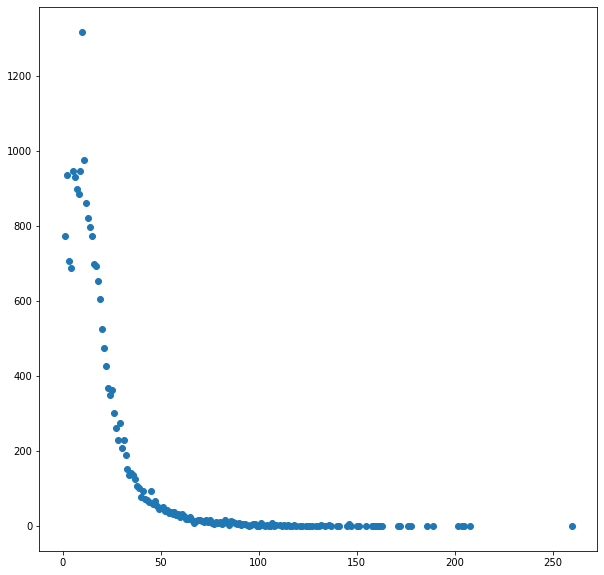

In [153]:
number = []
for x in gse2indexgo:
    number.append(len(gse2indexgo[x]))
print(number)
arr = Counter(number)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter([x for x in arr], [arr[x] for x in arr])
plt.show


In [509]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from multiprocessing import Pool
import multiprocessing
from random import sample
import time
import math 
np.seterr(divide='ignore', invalid='ignore')  # ignore Runtime Warning about divide


class TreeNode:
    def __init__(self, n_features, n_items, n_study_id, n_class):
        self.n_features = n_features
        self.left_child = None
        self.right_child = None
        self.split_feature = None
        self.split_value = None
        self.split_gini = 1
        self.n_study_id = n_study_id
        self.label = None
        self.min_split = 0.01
        self.n_class = n_class
        self.n_items = n_items

    def is_leaf(self):
        return self.label is not None

    """ use 2d array (matrix) to compute gini index. Numerical feature values only """
    def gini(self, f, y, target, study, study_target):
        trans = f.reshape(len(f), -1)  # transpose 1d np array
        a = np.concatenate((trans, target), axis=1)  # vertical concatenation
        arg_sort = a[:, 0].argsort()
        a = a[arg_sort]  # sort by column 0, feature values
        sort = a[:, 0]
        #print(a)
        split = (sort[0:-1] + sort[1:]) / 2  # compute possible split values
        sort_study = study_target[arg_sort]

        left, right = np.array([split]), np.array([split])
        classes, counts = np.unique(y, return_counts=True)
        classes_study, counts_study = np.unique(study, return_counts=True)
        n_classes = len(classes)
        n_studies = len(classes_study)
        
        # count occurrence of labels for each possible split value
        for i in range(n_classes):
            temp = a[:, -n_classes + i].cumsum()[:-1]
            left = np.vstack((left, temp))  # horizontal concatenation
            right = np.vstack((right, counts[i] - temp))
        
        
        left_study, right_study = np.array([split]), np.array([split])
        for i in range(n_studies):
            temp = study_target[:,i].cumsum()[:-1]
            left_study = np.vstack((left_study, temp))
            right_study = np.vstack((right_study, counts_study[i] - temp))
            
            

        sum_1 = left[1:, :].sum(axis=0)  # sum occurrence of labels
        sum_2 = right[1:, :].sum(axis=0)
        
        sum_1_study = left_study[1:, :].sum(axis=0)  # sum occurrence of labels
        sum_2_study = right_study[1:, :].sum(axis=0)
        
        n = len(split)
        gini_t1, gini_t2 = [1] * n, [1] * n
        gini_t1_study, gini_t2_study = [0] * n, [0] * n
        # calculate left and right gini
        for i in range(n_classes):
            gini_t1 -= (left[i + 1, :] / sum_1) ** 2 
            gini_t2 -= (right[i + 1, :] / sum_2) ** 2
        for i in range(n_studies):
            gini_t1_study -= (left_study[i + 1, :] / sum_1_study) ** 2 
            gini_t2_study -= (right_study[i + 1, :] / sum_2_study) ** 2
            
        s = sum(counts)
        s_study = sum(counts_study)
        g = gini_t1 * sum_1 / s + gini_t2 * sum_2 / s - (5.0 / len(set(study))) * ( gini_t1_study * sum_1_study / s_study + gini_t2_study * sum_2_study / s_study)
        pos_valid = np.where((sort[0:-1] - sort[1:]) != 0)[0]
        
        tmp = pos_valid[pos_valid <= n - self.n_items * self.min_split / self.n_class]
        tmp2 = tmp[tmp >= self.n_items * self.min_split / self.n_class]
        pos_valid = tmp2
        
        ##print(self.n_items, self.min_split, self.n_class)
        if len(pos_valid) == 0 or self.n_items * self.min_split / self.n_class > n:
            ##print("Cannot divide", len(pos_valid))
            return -math.inf, math.inf
        
        g_valid = list(g[pos_valid])
        min_g = min(g_valid)
        split_value = split[pos_valid[g_valid.index(min_g)]]
        #print(split_value, min_g)
        return split_value, min_g

    def split_feature_value(self, x, y, target, study, study_target):
        # compute gini index of every column
        n = x.shape[1]  # number of x columns
        #print(n)
        sub_features = sample(range(n), self.n_features)  # feature sub-space
        # list of (split_value, split_gini) tuples
        value_g = [self.gini(x[:, i], y, target, study, study_target) for i in sub_features]
        result = min(value_g, key=lambda t: t[1])  # (value, gini) tuple with min gini
        feature = sub_features[value_g.index(result)]  # feature with min gini
        return feature, result[0], result[1]  # split feature, value, gini

    # recursively grow the tree
    def attempt_split(self, x, y, target, study, study_target, max_depth):
        #print(max_depth)
        c = Counter(y)
        majority = c.most_common()[0]  # majority class and count
        label, count = majority[0], majority[1]
        if len(y) < 2 or len(c) == 1 or count/len(y) > 1 or max_depth == 0:  # stop criterion
            self.label = label  # set leaf
            #print("Done", y, c, count, len(y), max_depth)
            return
        # split feature, value, gini
        feature, value, split_gini = self.split_feature_value(x, y, target, study, study_target)
        # stop split when gini decrease smaller than some threshold
        #if self.split_gini - split_gini < 0.01:  # stop criterion
        #    self.label = label  # set leaf
        #    return
        #print(value, split_gini)
        #print(x[:, feature])
        index1 = x[:, feature] <= value
        index2 = x[:, feature] > value
        x1, y1, x2, y2, study1, study2 = x[index1], y[index1], x[index2], y[index2], study[index1], study[index2]
        target1, target2 = target[index1], target[index2]
        study_target1, study_target2 = study_target[index1], study_target[index2]
        if len(y2) == 0 or len(y1) == 0:  # stop split
            #print('WTF', len(y1), len(y2))
            self.label = label  # set leaf
            return
        # splitting procedure
        
        self.split_feature = feature
        self.split_value = value
        self.split_gini = split_gini
        print(feature, value, sum(index1), sum(index2), Counter(y1), Counter(y2))
        self.left_child, self.right_child = TreeNode(self.n_features, self.n_items, self.n_study_id, self.n_class), TreeNode(self.n_features, self.n_items, self.n_study_id, self.n_class)
        self.left_child.split_gini, self.right_child.split_gini = split_gini, split_gini
        self.left_child.attempt_split(x1, y1, target1, study1, study_target1, max_depth - 1)
        self.right_child.attempt_split(x2, y2, target2, study2, study_target2, max_depth - 1)

    # trace down the tree for each data instance, for prediction
    def sort(self, x):  # x is 1d array
        if self.label is not None:
            return self.label
        if x[self.split_feature] <= self.split_value:
            return self.left_child.sort(x)
        else:
            return self.right_child.sort(x)


class ClassifierTree:
    def __init__(self, n_features, n_items, n_study_id, n_class):
        self.root = TreeNode(n_features, n_items, n_study_id, n_class)

    def train(self, x, y, study, max_depth):
        # one hot encoded target is for gini index calculation
        # categories='auto' silence future warning
        encoder = OneHotEncoder(categories='auto')
        encoder_study = OneHotEncoder(categories='auto')
        
        labels = y.reshape(len(y), -1)  # transpose 1d np array
        labels_study = study.reshape(len(study), -1)  # transpose 1d np array
        
        
        target = encoder.fit_transform(labels).toarray()
        study_target = encoder.fit_transform(labels_study).toarray()
        
        self.root.attempt_split(x, y, target, study, study_target, max_depth)

    def classify(self, x):  # x is 2d array
        return [self.root.sort(x[i]) for i in range(x.shape[0])]


class RandomForest:
    def __init__(self, n_classifiers=30, max_depth=20):
        self.n_classifiers = n_classifiers
        self.classifiers = []
        self.x = None
        self.y = None
        self.study = None
        self.max_depth = max_depth
        self.n_core = 30

    def build_tree(self, tree, return_dict, i):
        n = len(self.y)  # n for bootstrap sampling size
        n = int(n * 0.5)
        x, y, study = resample(self.x, self.y, self.study, n_samples=n)  # bootstrap sampling
        tree.train(x, y, study, self.max_depth)
        return_dict[i] = tree
        return tree  # return tree for multiprocessing pool

    def fit(self, x, y, study):
        self.x, self.y, self.study = x, y, study
        n_select_features = int(np.sqrt(x.shape[1]))  # number of features
        for i in range(self.n_classifiers):
            tree = ClassifierTree(n_select_features, len(y), len(set(study)), len(set(y)))
            self.classifiers.append(tree)
        # multiprocessing pool
        
        manager = multiprocessing.Manager()
        return_dict = manager.dict()
        it = 0
        while it != self.n_classifiers:
            processes = []
            cur_it = it
            for i in range(cur_it, min(self.n_classifiers, cur_it + self.n_core)):
                p = multiprocessing.Process(target=self.build_tree, args=(self.classifiers[i],return_dict, i))
                processes.append(p)
                p.start()

            for process in processes:
                process.join()
                it += 1
            
        self.classifiers = return_dict
        
        '''
        for i in range(self.n_classifiers):
            self.build_tree(self.classifiers[i])
            print(self.classifiers[i].root.split_value)
        '''    

    def predict(self, x_test):  # ensemble
        pred = [self.classifiers[tree].classify(x_test) for tree in self.classifiers]
        pred = np.array(pred)
        result = [Counter(pred[:, i]).most_common()[0][0] for i in range(pred.shape[1])]
        return result
    
    def score(self, x_test, y_test):
        y_ans = self.predict(x_test)
        return sum((y_ans - y_test) == 0) / len(y_test)
        


def test():
    rf = RandomForest(n_classifiers=10)  # optimal 100 trees
    rf.fit(x_train, y_train, study)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    


In [466]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(y)
rd = RandomForest(1,max_depth=20)
rd.fit(X, y, y)
print(rd.score(X, y))

clf = RandomForestClassifier(n_estimators= 1, max_depth=20,
                                    max_leaf_nodes= max(y + 1) * 10,
                                    n_jobs = 30, bootstrap=True)
clf = clf.fit(X, y)
train_score = clf.score(X, y)
print(train_score)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9733333333333334
0.98


In [317]:
y = range(10)
resample(y, n_samples=5)

[1, 2, 0, 8, 9]

In [315]:
y

range(0, 10)